# Imports

In [ ]:
!pip install beautifulsoup4 --quiet
!pip install requests --quiet

In [ ]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

!python -m spacy download en_core_web_sm --quiet
import spacy
import re

!pip install playwright --quiet
!playwright install chromium
!playwright install

import asyncio
import nest_asyncio
from playwright.async_api import async_playwright
nest_asyncio.apply()

import ast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 21.7 MB/s eta 0:00:00
156.8 MiB [] 0% 0.0s156.8 MiB [] 0% 26.9s156.8 MiB [] 0% 17.8s156.8 MiB [] 0% 13.0s156.8 MiB [] 0% 8.7s156.8 MiB [] 1% 6.4s156.8 MiB [] 1% 5.8s156.8 MiB [] 1% 5.7s156.8 MiB [] 2% 5.1s156.8 MiB [] 2% 5.3s156.8 MiB [] 3% 5.1s156.8 MiB [] 3% 5.2s156.8 MiB [] 4% 4.6s156.8 MiB [] 4% 4.7s156.8 MiB [] 4% 5.0s156.8 MiB [] 4% 4.7s156.8 MiB [] 5% 4.8s156.8 MiB [] 5% 4.9s156.8 MiB [] 5% 4.8s156.8 MiB [] 6% 4.7s156.8 MiB [] 6% 4.5s156.8 MiB [] 7% 4.4s156.8 MiB [] 7% 4.3s156.8 MiB [] 8% 4.3s156.8 MiB [] 8% 4.2

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', quiet=True)

nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('universal_tagset', quiet=True)

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

import unicodedata
unicodedata.numeric(u'⅕')
unicodedata.name(u'⅕')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'VULGAR FRACTION ONE FIFTH'

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
import plotly.express as px

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Web scrappers


### Web scrapper for allrecipes.com

Get the links from recipes togheter with their origin country

In [ ]:
url = 'https://www.allrecipes.com/cuisine-a-z-6740455'
agent = {"User-Agent":"Mozilla/5.0"}
response = requests.get(url, headers=agent)
html_content = response.text

web_page = BeautifulSoup(html_content, 'html.parser')

In [ ]:
print(web_page)

<!DOCTYPE html>

<html class="comp glossaryTemplate html mntl-html no-js" data-ab="99,99,99,99,99,99,99,99,77,99,99,99,99,99,99,99,99,99,58,78,99,64,63" data-allrecipes-resource-version="2.53.0" data-mantle-resource-version="4.0.418" data-mm-ads-resource-version="1.2.71" data-mm-digital-issues-resource-version="1.18.4" data-mm-myrecipes-resource-version="1.3.0" data-mm-recipes-resource-version="1.1.0" data-mm-transactional-resource-version="1.10.20" data-mm-video-resource-version="1.4.0" data-resource-version="2.53.0" data-tracking-container="true" id="glossaryTemplate_1-0" lang="en"><!--
<globe-environment environment="k8s-prod" application="allrecipes" dataCenter="us-west-1"/>
-->
<head class="loc head">
<link href="//js-sec.indexww.com" rel="preconnect"/>
<link href="//c.amazon-adsystem.com" rel="preconnect"/>
<link href="//securepubads.g.doubleclick.net" rel="preconnect"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="max-image-previe

In [ ]:
cuisine_list = web_page.find('div', class_ = "comp mntl-alphabetical-list mntl-block")

print(cuisine_list)

<div class="comp mntl-alphabetical-list mntl-block" data-tracking-container="true" id="mntl-alphabetical-list_1-0"><div class="mntl-alphabetical-list__group">
<h3 class="mntl-alphabetical-list__heading type--goat" id="alphabetical-list-a">A</h3>
<ul class="loc mntl-link-list"><li class="comp mntl-link-list__item" id="mntl-link-list__item_1-0"><a aria-label="Read more about Amish and Mennonite" class="mntl-link-list__link type--dog-bold type--dog-link" href="https://www.allrecipes.com/recipes/732/us-recipes/amish-and-mennonite/" rel="nocaes"> Amish and Mennonite
</a></li>
<li class="comp mntl-link-list__item" id="mntl-link-list__item_2-0"><a aria-label="Read more about Argentinian" class="mntl-link-list__link type--dog-bold type--dog-link" href="https://www.allrecipes.com/recipes/2432/world-cuisine/latin-american/south-american/argentinian/" rel="nocaes"> Argentinian
</a></li>
<li class="comp mntl-link-list__item" id="mntl-link-list__item_3-0"><a aria-label="Read more about Australian a

In [ ]:
cuisine_page_urls = []

list_items = cuisine_list.find_all('div', class_='mntl-alphabetical-list__group')
for item in list_items:
  letter_cuisine_list = item.find('ul')
  letter_cuisine_list_items = letter_cuisine_list.find_all('li')

  for list_item in letter_cuisine_list_items:
    cuisine_url = list_item.find('a').get('href')
    cuisine_page_urls.append(cuisine_url)

In [ ]:
for url in cuisine_page_urls:
  print(url)

https://www.allrecipes.com/recipes/732/us-recipes/amish-and-mennonite/
https://www.allrecipes.com/recipes/2432/world-cuisine/latin-american/south-american/argentinian/
https://www.allrecipes.com/recipes/228/world-cuisine/australian-and-new-zealander/
https://www.allrecipes.com/recipes/718/world-cuisine/european/austrian/
https://www.allrecipes.com/recipes/16100/world-cuisine/asian/bangladeshi/
https://www.allrecipes.com/recipes/719/world-cuisine/european/belgian/
https://www.allrecipes.com/recipes/1278/world-cuisine/latin-american/south-american/brazilian/
https://www.allrecipes.com/recipes/272/us-recipes/cajun-and-creole/
https://www.allrecipes.com/recipes/733/world-cuisine/canadian/
https://www.allrecipes.com/recipes/1277/world-cuisine/latin-american/south-american/chilean/
https://www.allrecipes.com/recipes/695/world-cuisine/asian/chinese/
https://www.allrecipes.com/recipes/14759/world-cuisine/latin-american/south-american/colombian/
https://www.allrecipes.com/recipes/709/world-cuis

#### Gather all information about the recipes from each cuisine

In the following code cells, we will focus on retrieving all necesarry information about each recipe: the origin (the cuisine it is from), the ingredients and the directions for preparing it and some of the reviews left by other people.

Get the origin, title and url of the recipe

Realized that some links contain /gallery/ or /article/ which do not lead to a recipe. We skip over them.

The way the page was displayed: 3 recipes at the beggining and then an ad and then the rest of the recipes. We had to break the code into 2 because of the ad.

In [ ]:
recipes = []
ar_dataset = pd.DataFrame(columns = ['Origin', 'Title', 'Recipe URL'])

count = 0
for url in cuisine_page_urls:
    response = requests.get(url, headers=agent)
    html_content = response.text

    soup = BeautifulSoup(html_content, 'html.parser')

    origin = soup.find('h1', id='mntl-taxonomysc-heading_1-0').text
    # print(origin)

    food_section = soup.find('section', id='mntl-document-spotlight_1-0')
    first_3_recipes_div = food_section.find('div', id='mntl-three-post__inner_1-0')
    first_3_recipes_urls = first_3_recipes_div.find_all('a')

    for url in first_3_recipes_urls:
      url_href = url.get('href')
      title = url.find('span', class_='card__title-text').text

      if '/article/' in url_href or '/gallery/' in url_href:   # ignore these links, because they do not lead to a recipe
        continue
      else:
        recipes.append({'Origin': origin, 'Title': title, 'Recipe URL': url_href})

    rest_recipes_div = soup.find('div', id='mntl-taxonomysc-article-list-group_1-0')

    div_id = 'tax-sc__recirc-list-container_{}-0'
    div_number = 1

    while True:
      format_div_id = div_id.format(div_number)
      rest_recipes_componenets_div = rest_recipes_div.find('div', id = format_div_id)

      if rest_recipes_componenets_div == None:
        break
      else:
        first_div = rest_recipes_componenets_div.find('div')

        rest_recipe_urls = first_div.find_all('a')

        for url in rest_recipe_urls:
          url_href = url.get('href')
          title = url.find('span', class_='card__title-text').text

          if '/article/' in url_href or '/gallery/' in url_href:
            continue
          else:
            recipes.append({'Origin': origin, 'Title': title, 'Recipe URL': url_href})

      div_number += 1
      count+=1

ar_dataset = pd.DataFrame(recipes)

Get the ingredients and the directions

In [ ]:
all_recipes_ingredients = []
all_recipes_directions = []

for index, row in ar_dataset.iterrows():
  recipe_url = row['Recipe URL']
  # print(recipe_url)

  response = requests.get(recipe_url, headers=agent)
  html_content = response.text

  soup = BeautifulSoup(html_content, 'html.parser')

  ingredients_div = soup.find('div', id='mm-recipes-structured-ingredients_1-0')
  directions_div = soup.find('div', id='mm-recipes-steps_1-0')

  ingredients_text = []
  directions_text = []
  if ingredients_div is not None and directions_div is not None:
    ingredients_list = ingredients_div.find('ul')
    ingredients_list_items = ingredients_list.find_all('li')

    ingredients_text = []
    for ingredient in ingredients_list_items:
      ingredients_text.append(ingredient.text.strip())

    directions_list = directions_div.find('ol')
    directions_steps = directions_list.find_all('li')

    for step in directions_steps:
      step_paragraph = step.find('p')
      directions_text.append(step_paragraph.text.strip())

  all_recipes_ingredients.append(ingredients_text)
  all_recipes_directions.append(directions_text)

ar_dataset['Ingredients'] = all_recipes_ingredients
ar_dataset['Directions'] = all_recipes_directions

In [ ]:
ar_dataset.head()

,Origin,Title,Recipe URL,Ingredients,Directions
0,Amish and Mennonite Recipes,Baked Oatmeal,https://www.allrecipes.com/recipe/51013/baked-...,"[3 cups rolled oats, 1 cup brown sugar, 2 teas...",[Preheat the oven to 350 degrees F (175 degree...
1,Amish and Mennonite Recipes,Amish White Bread,https://www.allrecipes.com/recipe/6788/amish-w...,[2 cups warm water (110 degrees F/45 degrees C...,"[Gather all ingredients., Dissolve sugar in wa..."
2,Amish and Mennonite Recipes,Cheesy Amish Breakfast Casserole,https://www.allrecipes.com/recipe/229150/chees...,"[1 pound sliced bacon, diced, 1 medium sweet o...",[Preheat the oven to 350 degrees F (175 degree...
3,Amish and Mennonite Recipes,Best Vinegar Coleslaw,https://www.allrecipes.com/recipe/59318/amish-...,"[1 large head cabbage, cored and finely shredd...","[Gather the ingredients., Toss cabbage and oni..."
4,Amish and Mennonite Recipes,Pennsylvania-Dutch Pickled Beets and Eggs,https://www.allrecipes.com/recipe/13743/pennsy...,"[8 large eggs, 2 (15-ounce) cans whole pickled...",[Place eggs in a saucepan and cover with water...


In [ ]:
ar_dataset.shape

(2246, 5)

Not all the entries from the cuisine page were recipes. We eliminate them by checking which rows in the dataframe are empty in the Ingredients or Directions columns.

In [ ]:
# in case there are some links that are not recipes
ar_dataset = ar_dataset[~(ar_dataset['Ingredients'].str.len() == 0) | ~(ar_dataset['Directions'].str.len() == 0)]

ar_dataset.shape

(2239, 5)

The reviews on this site were displayed using JavaScript, so in order to get them, we had to use playwright in order to load the page.
We can only get up to 10 reviews for each recipe, because that is the maximum number of reviews available on the first load.

In [ ]:
async def fetch_reviews(url):
  playwright = await async_playwright().start()
  browser = await playwright.chromium.launch()
  page = await browser.new_page()
  await page.goto(url)
  await page.wait_for_selector('#recipe-ugc-wrapper_1-0', timeout=60000000)
  content = await page.query_selector('#recipe-ugc-wrapper_1-0')
  reviews = []

  if content:
      inner_divs = await content.query_selector_all('div.feedback__text')
      for div in inner_divs:
        div_html = await div.inner_html()
        reviews.append(div_html.strip())

  await browser.close()
  await playwright.stop()

  return reviews

In [ ]:
all_recipes_reviews = []

for index, row in ar_dataset.iterrows():
  print(index, end=" ")
  print(row['Recipe URL'])
  recipe_url = row['Recipe URL']
  reviews = await fetch_reviews(recipe_url)
  all_recipes_reviews.append(reviews)

ar_dataset['Reviews'] = all_recipes_reviews

0 https://www.allrecipes.com/recipe/51013/baked-oatmeal-ii/
1 https://www.allrecipes.com/recipe/6788/amish-white-bread/
2 https://www.allrecipes.com/recipe/229150/cheesy-amish-breakfast-casserole/
3 https://www.allrecipes.com/recipe/59318/amish-slaw/
4 https://www.allrecipes.com/recipe/13743/pennsylvania-dutch-pickled-beets-and-eggs/
5 https://www.allrecipes.com/recipe/74915/amish-macaroni-salad/
6 https://www.allrecipes.com/recipe/7063/amish-friendship-bread-starter/
7 https://www.allrecipes.com/recipe/74950/my-amish-friends-caramel-corn/
8 https://www.allrecipes.com/recipe/85166/pennsylvania-dutch-corn-pie/
9 https://www.allrecipes.com/recipe/140605/amish-peanut-butter/
10 https://www.allrecipes.com/recipe/65250/amish-meatloaf/
11 https://www.allrecipes.com/recipe/73875/amish-potato-salad/
12 https://www.allrecipes.com/recipe/6856/amish-friendship-bread-i/
13 https://www.allrecipes.com/recipe/276198/amish-buttered-egg-noodles/
14 https://www.allrecipes.com/recipe/20967/amish-sugar-ca

In [ ]:
ar_dataset.head(5)

,Origin,Title,Recipe URL,Ingredients,Directions,Reviews
0,Amish and Mennonite Recipes,Baked Oatmeal,https://www.allrecipes.com/recipe/51013/baked-...,"[3 cups rolled oats, 1 cup brown sugar, 2 teas...",[Preheat the oven to 350 degrees F (175 degree...,"[very yummy, i used half the brown sugar, soy ..."
1,Amish and Mennonite Recipes,Amish White Bread,https://www.allrecipes.com/recipe/6788/amish-w...,[2 cups warm water (110 degrees F/45 degrees C...,"[Gather all ingredients., Dissolve sugar in wa...","[I love this bread! It's a bit dense, sweet an..."
2,Amish and Mennonite Recipes,Cheesy Amish Breakfast Casserole,https://www.allrecipes.com/recipe/229150/chees...,"[1 pound sliced bacon, diced, 1 medium sweet o...",[Preheat the oven to 350 degrees F (175 degree...,[This has been my go-to recipe for a long time...
3,Amish and Mennonite Recipes,Best Vinegar Coleslaw,https://www.allrecipes.com/recipe/59318/amish-...,"[1 large head cabbage, cored and finely shredd...","[Gather the ingredients., Toss cabbage and oni...",[I have made this twice now. First time exactl...
4,Amish and Mennonite Recipes,Pennsylvania-Dutch Pickled Beets and Eggs,https://www.allrecipes.com/recipe/13743/pennsy...,"[8 large eggs, 2 (15-ounce) cans whole pickled...",[Place eggs in a saucepan and cover with water...,"[Excellent recipe! As a child growing up, my m..."


In [ ]:
ar_dataset.to_json('ar_recipes.json', orient='index')

In [ ]:
ar_dataset.to_csv('ar_recipes.csv', index=False)

### Web scrapper for food.com

In [ ]:
url = 'https://www.food.com/'
agent = {"User-Agent":"Mozilla/5.0"}
response = requests.get(url, headers=agent)
html_content = response.text

web_page = BeautifulSoup(html_content, 'html.parser')

In [ ]:
# get all cuisine types and the link to the cuisine page from the dropdown button
cuisine_dataset = pd.DataFrame(columns=['Origin', 'Cuisine URL'])

base_url = 'https://www.food.com{}'

header_lists = web_page.find('ul', class_='nav-list svelte-dgiybl')
lists_items = header_lists.find_all('li')

cuisines_url = []

for list_ in lists_items:
  title = list_.find('span', class_='nav-list-item__text svelte-dgiybl')
  if title is not None and title.text == 'Cuisine':
    all_cuisines = list_.find_all('li')

    for cuisine in all_cuisines:
      link = cuisine.find('a')

      href = base_url.format(link.get('href'))
      type_ = link.text.strip().split()[0]

      cuisines_url.append({'Origin': type_, 'Cuisine URL': href})

cuisine_dataset = pd.DataFrame(cuisines_url)

In [ ]:
cuisine_dataset

,Origin,Cuisine URL
0,Mexican,https://www.food.com/ideas/mexican-food-at-hom...
1,Italian,https://www.food.com/ideas/italian-food-recipe...
2,Indian,https://www.food.com/ideas/indian-food-recipes...
3,Thai,https://www.food.com/ideas/thai-food-recipes-a...
4,Korean,https://www.food.com/ideas/korean-food-recipes...
5,French,https://www.food.com/ideas/french-food-at-home...
6,Latin,https://www.food.com/ideas/best-latin-american...
7,Chinese,https://www.food.com/ideas/chinese-food-at-hom...
8,Japanese,https://www.food.com/ideas/japanese-food-recip...
9,Spanish,https://www.food.com/ideas/spanish-food-recipe...


In [ ]:
food_dataset = pd.DataFrame(columns=['Origin', 'Title', 'Recipe URL'])

In [ ]:
# enter each cuisine page and gather all the links to the recipes
recipes = []

for index, row in cuisine_dataset.iterrows():
  url = row['Cuisine URL']
  origin = row['Origin']

  response = requests.get(url)
  html_content = response.text

  web_page = BeautifulSoup(html_content, 'html.parser')

  food_list = web_page.find('section', class_='smart-cards')

  all_foods = food_list.find_all('div', class_='smart-card container-sm recipe')

  for food in all_foods:
    title = food.find('h2', class_='title').find('a')
    url = title.get('href')
    food_name = title.text

    recipes.append({'Origin': origin, 'Title': food_name, 'Recipe URL': url})

food_dataset = pd.DataFrame(recipes)

In [ ]:
# get all ingredients and directions for each recipe

all_recipes_ingredients = []
all_recipes_directions = []

for index, row in food_dataset.iterrows():
  recipe_url = row['Recipe URL']

  response = requests.get(recipe_url, headers=agent)
  html_content = response.text

  soup = BeautifulSoup(html_content, 'html.parser')

  ingredients_section = soup.find('section', class_='layout__item ingredients svelte-1dqq0pw')
  directions_section = soup.find('section', class_='layout__item directions svelte-1dqq0pw')

  ingredients_text = []
  directions_text = []
  if ingredients_section is not None and directions_section is not None:
    ingredients_list = ingredients_section.find('ul')
    ingredients_list_items = ingredients_list.find_all('li')

    ingredients_text = []
    for ingredient in ingredients_list_items:
      words = ingredient.text.strip().split()
      text_words = ' '.join(words)
      ingredients_text.append(text_words)

    directions_list = directions_section.find('ul')
    directions_steps = directions_list.find_all('li')

    for step in directions_steps:
      step_text = step.text
      directions_text.append(step_text)

  all_recipes_ingredients.append(ingredients_text)
  all_recipes_directions.append(directions_text)

food_dataset['Ingredients'] = all_recipes_ingredients
food_dataset['Directions'] = all_recipes_directions

In [ ]:
# get the top reviews for each recipes
# limited number of reviews on the first load of the page

all_recipes_reviews = []

for index, row in food_dataset.iterrows():
  recipe_url = row['Recipe URL']

  response = requests.get(recipe_url, headers=agent)
  html_content = response.text

  soup = BeautifulSoup(html_content, 'html.parser')

  reviews_div = soup.find('div', id='reviews')

  reviews_text = []
  if reviews_div is not None:
    review_list = reviews_div.find('ol')

    if review_list is not None:
      reviews = review_list.find_all('li')

      for review in reviews:
        text = review.find('div', class_='text svelte-1aswkii truncated')
        if text is not None:
          words = text.text.split()
          text_words = ' '.join(words)
          reviews_text.append(text_words)

  all_recipes_reviews.append(reviews_text)

food_dataset['Reviews'] = all_recipes_reviews

In [ ]:
food_dataset.head()

,Origin,Title,Recipe URL,Ingredients,Directions,Reviews
0,Mexican,Baja Fish Tacos,https://www.food.com/recipe/fish-tacos-baja-st...,"[2 cups all-purpose flour, 1 1⁄2 teaspoons bak...","[Make the batter: Whisk the flour, baking powd...",[This recipe made it into book#234156! FABULOU...
1,Mexican,Margarita,https://www.food.com/recipe/margarita-6460,"[1 1⁄2 ounces tequila, 1⁄2 ounce triple sec, 1...",[Rub rim of cocktail glass with rind of lemon ...,"[The original, and how we made it when I barte..."
2,Mexican,Menudo Rojo,https://www.food.com/recipe/menudo-rojo-red-me...,"[3 gallons water, divided, 2 1⁄2 lbs beef trip...","[In a large pot, bring 1 gallon water to a boi...",[This recipe took me right back to Mexico City...
3,Mexican,Birria,https://www.food.com/recipe/birria-246387,[5 5 lbs pork (hind quarter) or 5 lbs goat mea...,[PREPARE THE MEAT: Trim the fat from the meat;...,"[Okay, so it is a lot of steps and a lot of wo..."
4,Mexican,Machaca con Huevo Breakfast Burrito,https://www.food.com/recipe/machaca-burritos-2...,"[3 tablespoons butter, 1 small onion, sliced a...","[Melt butter in a large skillet, and saute oni...",[These were SO GOOD! The recipe is a little bi...


In [ ]:
food_dataset.shape

(562, 6)

In [ ]:
food_dataset.to_json('food_recipes.json', orient='index')

In [ ]:
food_dataset.to_csv('food_recipes.csv', index=False)

# Download the dataframes from files


In order to avoid running the code for webscrapping multiple times, uncomment the following code and you can just get the data from the downloaded files.

In [ ]:
ar_dataset = pd.read_csv('ar_recipes.csv')
food_dataset = pd.read_csv('food_recipes.csv')

When reading the data from csv files, all the data is considered as str by default. In order to transform the columns 'Ingredients', 'Directions' and 'Reviews' into list, we create a function that will do this transformation.


In [ ]:
def convert_to_list(column):
    return column.apply(ast.literal_eval)

ar_dataset['Ingredients'] = convert_to_list(ar_dataset['Ingredients'])
ar_dataset['Directions'] = convert_to_list(ar_dataset['Directions'])
ar_dataset['Reviews'] = convert_to_list(ar_dataset['Reviews'])

food_dataset['Ingredients'] = convert_to_list(food_dataset['Ingredients'])
food_dataset['Directions'] = convert_to_list(food_dataset['Directions'])
food_dataset['Reviews'] = convert_to_list(food_dataset['Reviews'])

We check if the conversion was done properly.

In [ ]:
type(ar_dataset.iloc[0]['Ingredients'])

list

In [ ]:
for list_elem in ar_dataset.iloc[0]['Ingredients']:
  print(list_elem)

3 cups rolled oats
1 cup brown sugar
2 teaspoons ground cinnamon
2 teaspoons baking powder
1 teaspoon salt
2  eggs
1 cup milk
½ cup melted butter
2 teaspoons vanilla extract
¾ cup dried cranberries


In [ ]:
for list_elem in ar_dataset.iloc[0]['Directions']:
  print(list_elem)

Preheat the oven to 350 degrees F (175 degrees C).
Mix together oats, brown sugar, cinnamon, baking powder, and salt in a large bowl. Beat in eggs, milk, melted butter, and vanilla extract. Stir in dried cranberries. Spread into a 9x13-inch baking dish.
Bake in the preheated oven until top is golden, about 40 minutes.


In [ ]:
for list_elem in ar_dataset.iloc[0]['Reviews']:
  print(list_elem)

very yummy, i used half the brown sugar, soy milk instead of regular milk, 1/2 c applesauce instead of the butter and raisins instead of cranberries. delicious
I bake this once a week and enjoy snacking on it.
I loved this recipe, but did change it up a bit! I used fresh blueberries (instead of dried cranberries), baked in an 8x8 glass dish at 375 degrees for 30 minutes and then dropped down to 350 and cooked for 7-8 minutes. It was perfectly moist with a slight crunch on top. Also topped with blueberry greek yogurt (Oikos is the best!). Very yummy and will make again.
used dried cherries instead. Super yummy!
This is a great recipe, I’ve made it many times and it’s always a crowd pleaser. I have made it with fresh and frozen raspberries, blueberries, cranberries and chopped up apples. You can’t go wrong with any of them.
I love this recipe. I have tried various ones on the Internet and this is by far the most superior. It was just so good and my whole family loved it. The only change 

# Dataframe creation, grouping and cleaning

We combine the dataset to get a bigger dataset


In [ ]:
ar_dataset['Site'] = 'allrecipes'
food_dataset['Site'] = 'food'

In [ ]:
combined_recipes = [ar_dataset, food_dataset]
all_recipes_df = pd.concat(combined_recipes, ignore_index=True)
all_recipes_df.tail()

,Origin,Title,Recipe URL,Ingredients,Directions,Reviews,Site
2796,Spanish,Merluza a la Vasca (Hake in White Wine),https://www.food.com/recipe/hake-in-white-wine...,"[2 tablespoons all-purpose flour, 4 hake fille...","[Preheat oven to 450 degrees.\r, Season the fl...","[I used skinless flounder, so skipped the fryi...",food
2797,Spanish,Horchata de Almendra,https://www.food.com/recipe/horchata-de-almend...,"[1⁄2 kg almonds (1 pound), 1⁄2 kg sugar (may u...",[The first step is to remove the skins from th...,"[This is really good, creamy, with a nice ligh...",food
2798,Spanish,Stuffed Piquillo Peppers,https://www.food.com/recipe/stuffed-piquillo-p...,"[1 1⁄2 cups water, 1⁄2 cup long grain brown ri...",[Combine first 4 ingredients in a small saucep...,[Fresh exotic flavor! Just lightly spicey. Had...,food
2799,Spanish,Ensalada Valenciana,https://www.food.com/recipe/ensalada-valencian...,"[2 oranges, peeled and thinly sliced, 1 small ...","[Marinate oranges and onion in olive oil, vine...",[I used loose leaf lettuce and a Walla Walla o...,food
2800,Spanish,Mejillones Antonio,https://www.food.com/recipe/mejillones-antonio...,"[2 dozen cooked mussels, 1 small red bell pepp...",[Remove the top shell from the mussels and arr...,[Yum ! DH is the shellfish eater in this house...,food


In [ ]:
all_recipes_df['Origin'].value_counts()

Origin
Indian                                  82
Italian                                 75
Mexican                                 70
Canadian Recipes                        63
Jewish Recipes                          63
Indian Recipes                          63
French Recipes                          63
Brazilian Recipes                       63
Russian Recipes                         63
Australian and New Zealander Recipes    63
Soul Food Recipes                       62
Scandinavian Recipes                    62
Chinese Recipes                         62
French                                  62
Cuban Recipes                           62
Southern Recipes                        62
Filipino Recipes                        62
Italian Recipes                         62
Spanish Recipes                         61
Amish and Mennonite Recipes             60
Greek Recipes                           60
German Recipes                          60
Thai Recipes                            60
Caju

The origin column is differently saved for the different dataset. The next cell will uniform this.

In [ ]:
def uniformize_origin(name):
    name = name.replace(' Recipes', '')
    return name.strip()

all_recipes_df['Origin'] = all_recipes_df['Origin'].apply(uniformize_origin)

In [ ]:
all_recipes_df['Origin'].value_counts().sort_index()

Origin
Amish and Mennonite              60
Argentinian                      29
Australian and New Zealander     63
Austrian                         23
Bangladeshi                      12
Belgian                           6
Brazilian                        63
Cajun and Creole                 60
Canadian                         63
Chilean                          22
Chinese                         114
Colombian                        10
Cuban                            62
Danish                           33
Dutch                            23
Filipino                         62
Finnish                          18
French                          125
German                           60
Greek                            60
Indian                          145
Indonesian                       23
Israeli                          23
Italian                         137
Jamaican                         43
Japanese                        108
Jewish                           63
Korean               

In [ ]:
all_recipes_df['Origin'].value_counts().sort_index()

Origin
Amish and Mennonite              60
Argentinian                      29
Australian and New Zealander     63
Austrian                         23
Bangladeshi                      12
Belgian                           6
Brazilian                        63
Cajun and Creole                 60
Canadian                         63
Chilean                          22
Chinese                         114
Colombian                        10
Cuban                            62
Danish                           33
Dutch                            23
Filipino                         62
Finnish                          18
French                          125
German                           60
Greek                            60
Indian                          145
Indonesian                       23
Israeli                          23
Italian                         137
Jamaican                         43
Japanese                        108
Jewish                           63
Korean               

In [ ]:
# eliminate those recipes, they are the same as the ones for Sweden, Norway and Finland

all_recipes_df = all_recipes_df[~(all_recipes_df['Origin'] == 'Scandinavian')]

Data grouping

In [ ]:
sub_regions = {
    'United States': ['Amish and Mennonite', 'Cajun and Creole', 'Jewish', 'Soul Food', 'Southern', 'Tex-Mex'],
    'Canada': ['Canadian'],
    'South America': ['Argentinian', 'Brazilian', 'Chilean', 'Colombian', 'Peruvian'],
    'Central America and Mexico': ['Mexican'],
    'The Caribbean': ['Cuban', 'Jamaican', 'Puerto Rican'],
    'General Latin': ['Latin'],
    'Western Europe': ['Austrian', 'Belgian', 'French', 'German', 'Dutch', 'Swiss'],
    'Northern Europe': ['Danish', 'Finnish', 'Norwegian', 'Swedish'],
    'Southern Europe': ['Greek', 'Italian', 'Portuguese', 'Spanish'],
    'Eastern Europe': ['Polish', 'Russian'],
    'South Asia': ['Bangladeshi', 'Indian', 'Pakistani'],
    'East Asia': ['Chinese', 'Japanese', 'Korean'],
    'Southeast Asia': ['Filipino', 'Indonesian', 'Malaysian', 'Thai', 'Vietnamese'],
    'Middle East and Central Asia': ['Israeli', 'Lebanese', 'Persian', 'Turkish'],
    'Australia and New Zealand': ['Australian and New Zealander'],
    'Southern Africa': ['South African']
}

regions = {
    'North America': ['United States', 'Canada'],
    'Latin America and the Caribbean': ['South America', 'The Caribbean', 'Central America and Mexico', 'General Latin'],
    'Europe': ['Western Europe', 'Northern Europe', 'Southern Europe', 'Eastern Europe'],
    'Asia': ['South Asia', 'East Asia', 'Southeast Asia', 'Indian', 'Middle East and Central Asia'],
    'Oceania': ['Australia and New Zealand'],
    'Africa': ['Southern Africa']
}

print(regions)

{'North America': ['United States', 'Canada'], 'Latin America and the Caribbean': ['South America', 'The Caribbean', 'Central America and Mexico', 'General Latin'], 'Europe': ['Western Europe', 'Northern Europe', 'Southern Europe', 'Eastern Europe'], 'Asia': ['South Asia', 'East Asia', 'Southeast Asia', 'Indian', 'Middle East and Central Asia'], 'Oceania': ['Australia and New Zealand'], 'Africa': ['Southern Africa']}


In [ ]:
cuisine_to_subregion = {}

for region in sub_regions:
  for cuisine in sub_regions.get(region):
    cuisine_to_subregion[cuisine] = region

print(cuisine_to_subregion)

{'Amish and Mennonite': 'United States', 'Cajun and Creole': 'United States', 'Jewish': 'United States', 'Soul Food': 'United States', 'Southern': 'United States', 'Tex-Mex': 'United States', 'Canadian': 'Canada', 'Argentinian': 'South America', 'Brazilian': 'South America', 'Chilean': 'South America', 'Colombian': 'South America', 'Peruvian': 'South America', 'Mexican': 'Central America and Mexico', 'Cuban': 'The Caribbean', 'Jamaican': 'The Caribbean', 'Puerto Rican': 'The Caribbean', 'Latin': 'General Latin', 'Austrian': 'Western Europe', 'Belgian': 'Western Europe', 'French': 'Western Europe', 'German': 'Western Europe', 'Dutch': 'Western Europe', 'Swiss': 'Western Europe', 'Danish': 'Northern Europe', 'Finnish': 'Northern Europe', 'Norwegian': 'Northern Europe', 'Swedish': 'Northern Europe', 'Greek': 'Southern Europe', 'Italian': 'Southern Europe', 'Portuguese': 'Southern Europe', 'Spanish': 'Southern Europe', 'Polish': 'Eastern Europe', 'Russian': 'Eastern Europe', 'Bangladeshi':

In [ ]:
all_recipes_df['SubRegion'] = all_recipes_df['Origin'].map(cuisine_to_subregion)

<ipython-input-22-a1dba3ac1add>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_recipes_df['SubRegion'] = all_recipes_df['Origin'].map(cuisine_to_subregion)


In [ ]:
cuisine_to_region = {}

for region in regions:
  for cuisine in regions.get(region):
    cuisine_to_region[cuisine] = region

print(cuisine_to_region)

{'United States': 'North America', 'Canada': 'North America', 'South America': 'Latin America and the Caribbean', 'The Caribbean': 'Latin America and the Caribbean', 'Central America and Mexico': 'Latin America and the Caribbean', 'General Latin': 'Latin America and the Caribbean', 'Western Europe': 'Europe', 'Northern Europe': 'Europe', 'Southern Europe': 'Europe', 'Eastern Europe': 'Europe', 'South Asia': 'Asia', 'East Asia': 'Asia', 'Southeast Asia': 'Asia', 'Indian': 'Asia', 'Middle East and Central Asia': 'Asia', 'Australia and New Zealand': 'Oceania', 'Southern Africa': 'Africa'}


In [ ]:
all_recipes_df['Region'] = all_recipes_df['SubRegion'].map(cuisine_to_region)

<ipython-input-24-93514ce21992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_recipes_df['Region'] = all_recipes_df['SubRegion'].map(cuisine_to_region)


In [ ]:
all_recipes_df

,Origin,Title,Recipe URL,Ingredients,Directions,Reviews,Site,SubRegion,Region
0,Amish and Mennonite,Baked Oatmeal,https://www.allrecipes.com/recipe/51013/baked-...,"[3 cups rolled oats, 1 cup brown sugar, 2 teas...",[Preheat the oven to 350 degrees F (175 degree...,"[very yummy, i used half the brown sugar, soy ...",allrecipes,United States,North America
1,Amish and Mennonite,Amish White Bread,https://www.allrecipes.com/recipe/6788/amish-w...,[2 cups warm water (110 degrees F/45 degrees C...,"[Gather all ingredients., Dissolve sugar in wa...","[I love this bread! It's a bit dense, sweet an...",allrecipes,United States,North America
2,Amish and Mennonite,Cheesy Amish Breakfast Casserole,https://www.allrecipes.com/recipe/229150/chees...,"[1 pound sliced bacon, diced, 1 medium sweet o...",[Preheat the oven to 350 degrees F (175 degree...,[This has been my go-to recipe for a long time...,allrecipes,United States,North America
3,Amish and Mennonite,Best Vinegar Coleslaw,https://www.allrecipes.com/recipe/59318/amish-...,"[1 large head cabbage, cored and finely shredd...","[Gather the ingredients., Toss cabbage and oni...",[I have made this twice now. First time exactl...,allrecipes,United States,North America
4,Amish and Mennonite,Pennsylvania-Dutch Pickled Beets and Eggs,https://www.allrecipes.com/recipe/13743/pennsy...,"[8 large eggs, 2 (15-ounce) cans whole pickled...",[Place eggs in a saucepan and cover with water...,"[Excellent recipe! As a child growing up, my m...",allrecipes,United States,North America
...,...,...,...,...,...,...,...,...,...
2796,Spanish,Merluza a la Vasca (Hake in White Wine),https://www.food.com/recipe/hake-in-white-wine...,"[2 tablespoons all-purpose flour, 4 hake fille...","[Preheat oven to 450 degrees.\r, Season the fl...","[I used skinless flounder, so skipped the fryi...",food,Southern Europe,Europe
2797,Spanish,Horchata de Almendra,https://www.food.com/recipe/horchata-de-almend...,"[1⁄2 kg almonds (1 pound), 1⁄2 kg sugar (may u...",[The first step is to remove the skins from th...,"[This is really good, creamy, with a nice ligh...",food,Southern Europe,Europe
2798,Spanish,Stuffed Piquillo Peppers,https://www.food.com/recipe/stuffed-piquillo-p...,"[1 1⁄2 cups water, 1⁄2 cup long grain brown ri...",[Combine first 4 ingredients in a small saucep...,[Fresh exotic flavor! Just lightly spicey. Had...,food,Southern Europe,Europe
2799,Spanish,Ensalada Valenciana,https://www.food.com/recipe/ensalada-valencian...,"[2 oranges, peeled and thinly sliced, 1 small ...","[Marinate oranges and onion in olive oil, vine...",[I used loose leaf lettuce and a Walla Walla o...,food,Southern Europe,Europe


Data cleaning

In [ ]:
def clean_text(text):
    text = text.lower()

    words = word_tokenize(text)

    new_text = ''
    for word in words:
      if '⁄' in word:
        new_text += word + ' '
      else:
        new_word = ''
        for char in word:
          if char.isdigit() or char.isalpha():
            new_word += char
        new_text += new_word + ' '

    words = word_tokenize(new_text)

    stop_words = set(stopwords.words('english'))

    new_words = ''
    for word in words:
      if word not in stop_words:
          new_words += word + ' '

    return new_words

In [ ]:
def clean_list(text):
  return [clean_text(item) for item in text]

In [ ]:
all_recipes_df = all_recipes_df.reset_index(inplace=False)

all_recipes_df

,index,Origin,Title,Recipe URL,Ingredients,Directions,Reviews,Site,SubRegion,Region
0,0,Amish and Mennonite,Baked Oatmeal,https://www.allrecipes.com/recipe/51013/baked-...,"[3 cups rolled oats, 1 cup brown sugar, 2 teas...",[Preheat the oven to 350 degrees F (175 degree...,"[very yummy, i used half the brown sugar, soy ...",allrecipes,United States,North America
1,1,Amish and Mennonite,Amish White Bread,https://www.allrecipes.com/recipe/6788/amish-w...,[2 cups warm water (110 degrees F/45 degrees C...,"[Gather all ingredients., Dissolve sugar in wa...","[I love this bread! It's a bit dense, sweet an...",allrecipes,United States,North America
2,2,Amish and Mennonite,Cheesy Amish Breakfast Casserole,https://www.allrecipes.com/recipe/229150/chees...,"[1 pound sliced bacon, diced, 1 medium sweet o...",[Preheat the oven to 350 degrees F (175 degree...,[This has been my go-to recipe for a long time...,allrecipes,United States,North America
3,3,Amish and Mennonite,Best Vinegar Coleslaw,https://www.allrecipes.com/recipe/59318/amish-...,"[1 large head cabbage, cored and finely shredd...","[Gather the ingredients., Toss cabbage and oni...",[I have made this twice now. First time exactl...,allrecipes,United States,North America
4,4,Amish and Mennonite,Pennsylvania-Dutch Pickled Beets and Eggs,https://www.allrecipes.com/recipe/13743/pennsy...,"[8 large eggs, 2 (15-ounce) cans whole pickled...",[Place eggs in a saucepan and cover with water...,"[Excellent recipe! As a child growing up, my m...",allrecipes,United States,North America
...,...,...,...,...,...,...,...,...,...,...
2734,2796,Spanish,Merluza a la Vasca (Hake in White Wine),https://www.food.com/recipe/hake-in-white-wine...,"[2 tablespoons all-purpose flour, 4 hake fille...","[Preheat oven to 450 degrees.\r, Season the fl...","[I used skinless flounder, so skipped the fryi...",food,Southern Europe,Europe
2735,2797,Spanish,Horchata de Almendra,https://www.food.com/recipe/horchata-de-almend...,"[1⁄2 kg almonds (1 pound), 1⁄2 kg sugar (may u...",[The first step is to remove the skins from th...,"[This is really good, creamy, with a nice ligh...",food,Southern Europe,Europe
2736,2798,Spanish,Stuffed Piquillo Peppers,https://www.food.com/recipe/stuffed-piquillo-p...,"[1 1⁄2 cups water, 1⁄2 cup long grain brown ri...",[Combine first 4 ingredients in a small saucep...,[Fresh exotic flavor! Just lightly spicey. Had...,food,Southern Europe,Europe
2737,2799,Spanish,Ensalada Valenciana,https://www.food.com/recipe/ensalada-valencian...,"[2 oranges, peeled and thinly sliced, 1 small ...","[Marinate oranges and onion in olive oil, vine...",[I used loose leaf lettuce and a Walla Walla o...,food,Southern Europe,Europe


In [ ]:
all_recipes_df.isnull().sum()

index          0
Origin         0
Title          0
Recipe URL     0
Ingredients    0
Directions     0
Reviews        0
Site           0
SubRegion      0
Region         0
dtype: int64

In [ ]:
all_recipes_df['Ingredients'] = all_recipes_df['Ingredients'].apply(clean_list)
all_recipes_df['Directions'] = all_recipes_df['Directions'].apply(clean_list)
# all_recipes_df['Reviews'] = all_recipes_df['Reviews'].apply(clean_list)

all_recipes_df

,index,Origin,Title,Recipe URL,Ingredients,Directions,Reviews,Site,SubRegion,Region
0,0,Amish and Mennonite,Baked Oatmeal,https://www.allrecipes.com/recipe/51013/baked-...,"[3 cups rolled oats , 1 cup brown sugar , 2 te...","[preheat oven 350 degrees f 175 degrees c , mi...","[very yummy, i used half the brown sugar, soy ...",allrecipes,United States,North America
1,1,Amish and Mennonite,Amish White Bread,https://www.allrecipes.com/recipe/6788/amish-w...,"[2 cups warm water 110 degrees f45 degrees c ,...","[gather ingredients , dissolve sugar warm wate...","[I love this bread! It's a bit dense, sweet an...",allrecipes,United States,North America
2,2,Amish and Mennonite,Cheesy Amish Breakfast Casserole,https://www.allrecipes.com/recipe/229150/chees...,"[1 pound sliced bacon diced , 1 medium sweet o...",[preheat oven 350 degrees f 175 degrees c grea...,[This has been my go-to recipe for a long time...,allrecipes,United States,North America
3,3,Amish and Mennonite,Best Vinegar Coleslaw,https://www.allrecipes.com/recipe/59318/amish-...,"[1 large head cabbage cored finely shredded , ...","[gather ingredients , toss cabbage onion toget...",[I have made this twice now. First time exactl...,allrecipes,United States,North America
4,4,Amish and Mennonite,Pennsylvania-Dutch Pickled Beets and Eggs,https://www.allrecipes.com/recipe/13743/pennsy...,"[8 large eggs , 2 15ounce cans whole pickled b...",[place eggs saucepan cover water bring boil re...,"[Excellent recipe! As a child growing up, my m...",allrecipes,United States,North America
...,...,...,...,...,...,...,...,...,...,...
2734,2796,Spanish,Merluza a la Vasca (Hake in White Wine),https://www.food.com/recipe/hake-in-white-wine...,"[2 tablespoons allpurpose flour , 4 hake fille...","[preheat oven 450 degrees , season flour gener...","[I used skinless flounder, so skipped the fryi...",food,Southern Europe,Europe
2735,2797,Spanish,Horchata de Almendra,https://www.food.com/recipe/horchata-de-almend...,"[1⁄2 kg almonds 1 pound , 1⁄2 kg sugar may use...","[first step remove skins almonds , best way si...","[This is really good, creamy, with a nice ligh...",food,Southern Europe,Europe
2736,2798,Spanish,Stuffed Piquillo Peppers,https://www.food.com/recipe/stuffed-piquillo-p...,"[1 1⁄2 cups water , 1⁄2 cup long grain brown r...",[combine first 4 ingredients small saucepan br...,[Fresh exotic flavor! Just lightly spicey. Had...,food,Southern Europe,Europe
2737,2799,Spanish,Ensalada Valenciana,https://www.food.com/recipe/ensalada-valencian...,"[2 oranges peeled thinly sliced , 1 small onio...",[marinate oranges onion olive oil vinegar salt...,[I used loose leaf lettuce and a Walla Walla o...,food,Southern Europe,Europe


In [ ]:
all_recipes_df = all_recipes_df.drop(columns=['index'])

all_recipes_df = all_recipes_df.reset_index()
all_recipes_df

,index,Origin,Title,Recipe URL,Ingredients,Directions,Reviews,Site,SubRegion,Region
0,0,Amish and Mennonite,Baked Oatmeal,https://www.allrecipes.com/recipe/51013/baked-...,"[3 cups rolled oats , 1 cup brown sugar , 2 te...","[preheat oven 350 degrees f 175 degrees c , mi...","[very yummy, i used half the brown sugar, soy ...",allrecipes,United States,North America
1,1,Amish and Mennonite,Amish White Bread,https://www.allrecipes.com/recipe/6788/amish-w...,"[2 cups warm water 110 degrees f45 degrees c ,...","[gather ingredients , dissolve sugar warm wate...","[I love this bread! It's a bit dense, sweet an...",allrecipes,United States,North America
2,2,Amish and Mennonite,Cheesy Amish Breakfast Casserole,https://www.allrecipes.com/recipe/229150/chees...,"[1 pound sliced bacon diced , 1 medium sweet o...",[preheat oven 350 degrees f 175 degrees c grea...,[This has been my go-to recipe for a long time...,allrecipes,United States,North America
3,3,Amish and Mennonite,Best Vinegar Coleslaw,https://www.allrecipes.com/recipe/59318/amish-...,"[1 large head cabbage cored finely shredded , ...","[gather ingredients , toss cabbage onion toget...",[I have made this twice now. First time exactl...,allrecipes,United States,North America
4,4,Amish and Mennonite,Pennsylvania-Dutch Pickled Beets and Eggs,https://www.allrecipes.com/recipe/13743/pennsy...,"[8 large eggs , 2 15ounce cans whole pickled b...",[place eggs saucepan cover water bring boil re...,"[Excellent recipe! As a child growing up, my m...",allrecipes,United States,North America
...,...,...,...,...,...,...,...,...,...,...
2734,2734,Spanish,Merluza a la Vasca (Hake in White Wine),https://www.food.com/recipe/hake-in-white-wine...,"[2 tablespoons allpurpose flour , 4 hake fille...","[preheat oven 450 degrees , season flour gener...","[I used skinless flounder, so skipped the fryi...",food,Southern Europe,Europe
2735,2735,Spanish,Horchata de Almendra,https://www.food.com/recipe/horchata-de-almend...,"[1⁄2 kg almonds 1 pound , 1⁄2 kg sugar may use...","[first step remove skins almonds , best way si...","[This is really good, creamy, with a nice ligh...",food,Southern Europe,Europe
2736,2736,Spanish,Stuffed Piquillo Peppers,https://www.food.com/recipe/stuffed-piquillo-p...,"[1 1⁄2 cups water , 1⁄2 cup long grain brown r...",[combine first 4 ingredients small saucepan br...,[Fresh exotic flavor! Just lightly spicey. Had...,food,Southern Europe,Europe
2737,2737,Spanish,Ensalada Valenciana,https://www.food.com/recipe/ensalada-valencian...,"[2 oranges peeled thinly sliced , 1 small onio...",[marinate oranges onion olive oil vinegar salt...,[I used loose leaf lettuce and a Walla Walla o...,food,Southern Europe,Europe


In [ ]:
# all_recipes_df.to_csv('all_foods.csv')

# Ingredients analysis

We create a new dataframe (ingredients_df) that stores the original dataframe's data from the columns Origin, Region, SubRegion, Title and Ingredients.

In [ ]:
ingredients_df = all_recipes_df[['Origin', 'Region', 'SubRegion', 'Title', 'Ingredients']]

In [ ]:
ingredients_df.head()

,Origin,Region,SubRegion,Title,Ingredients
0,Amish and Mennonite,North America,United States,Baked Oatmeal,3 cups rolled oats
0,Amish and Mennonite,North America,United States,Baked Oatmeal,1 cup brown sugar
0,Amish and Mennonite,North America,United States,Baked Oatmeal,2 teaspoons ground cinnamon
0,Amish and Mennonite,North America,United States,Baked Oatmeal,2 teaspoons baking powder
0,Amish and Mennonite,North America,United States,Baked Oatmeal,1 teaspoon salt


In [ ]:
# each ingredient should be on its own row
ingredients_df = ingredients_df.explode('Ingredients')

In [ ]:
ingredients_df.head(15)

,Origin,Region,SubRegion,Title,Ingredients
0,Amish and Mennonite,North America,United States,Baked Oatmeal,3 cups rolled oats
0,Amish and Mennonite,North America,United States,Baked Oatmeal,1 cup brown sugar
0,Amish and Mennonite,North America,United States,Baked Oatmeal,2 teaspoons ground cinnamon
0,Amish and Mennonite,North America,United States,Baked Oatmeal,2 teaspoons baking powder
0,Amish and Mennonite,North America,United States,Baked Oatmeal,1 teaspoon salt
0,Amish and Mennonite,North America,United States,Baked Oatmeal,2 eggs
0,Amish and Mennonite,North America,United States,Baked Oatmeal,1 cup milk
0,Amish and Mennonite,North America,United States,Baked Oatmeal,cup melted butter
0,Amish and Mennonite,North America,United States,Baked Oatmeal,2 teaspoons vanilla extract
0,Amish and Mennonite,North America,United States,Baked Oatmeal,cup dried cranberries


In [ ]:
ingredients_df.Ingredients.value_counts()

Ingredients
teaspoon salt                         261
1 teaspoon salt                       255
cup white sugar                       201
teaspoon ground black pepper          140
cup water                             125
                                     ... 
3 cloves garlic finely minced           1
3 tablespoons grated yellow onion       1
1 12 teaspoons ground cumin             1
1 12 teaspoons ground coriander         1
1 small red onion minced fine           1
Name: count, Length: 13631, dtype: int64

In [ ]:
#load the existing small model from spacy
base_model = spacy.load('en_core_web_sm')

measurements = re.compile(r'(bowl|bulb|cube|clove|cup|drop|ounce|oz|pinch|pound|teaspoon|tablespoon)s?')
extracted = []

for ix, row in ingredients_df.iterrows():
  tokens = base_model(row['Ingredients'])
  extract = ''
  for token in tokens:
    if (token.dep_ in ['nsubj', 'ROOT']) and (token.pos_ in ['NOUN', 'PROPN']) and (not measurements.match(token.text)):    # find the ingredient
      for child in token.children:
        if (not measurements.match(child.text)) and (child.dep_ in ['amod', 'compound']):      # get any adjective or other nouns that it comes with it
          extract += child.text + ' '
      extract += token.text + ' '

  final_extract = ''
  for char in extract:
    if not char.isdigit() and char != '⁄' and not unicodedata.name(char).startswith('VULGAR FRACTION'):   # skip any numerical data
      final_extract += char

  words = final_extract.split()
  final_extract=" ".join(words)

  extracted.append(final_extract)


clean_ingredients = ingredients_df[['Origin', 'Title', 'Region', 'SubRegion']]
clean_ingredients['Ingredients'] = extracted

clean_ingredients.head()

,Origin,Title,Region,SubRegion,Ingredients
0,Amish and Mennonite,Baked Oatmeal,North America,United States,
0,Amish and Mennonite,Baked Oatmeal,North America,United States,brown sugar
0,Amish and Mennonite,Baked Oatmeal,North America,United States,ground cinnamon
0,Amish and Mennonite,Baked Oatmeal,North America,United States,
0,Amish and Mennonite,Baked Oatmeal,North America,United States,salt


In [ ]:
# eliminate all rows where the Ingredients column is empty
clean_ingredients = clean_ingredients[~(clean_ingredients['Ingredients'] == '')]

clean_ingredients

,Origin,Title,Region,SubRegion,Ingredients
0,Amish and Mennonite,Baked Oatmeal,North America,United States,brown sugar
0,Amish and Mennonite,Baked Oatmeal,North America,United States,ground cinnamon
0,Amish and Mennonite,Baked Oatmeal,North America,United States,salt
0,Amish and Mennonite,Baked Oatmeal,North America,United States,eggs
0,Amish and Mennonite,Baked Oatmeal,North America,United States,milk
...,...,...,...,...,...
2738,Spanish,Mejillones Antonio,Europe,Southern Europe,small red onion
2738,Spanish,Mejillones Antonio,Europe,Southern Europe,extra virgin olive oil
2738,Spanish,Mejillones Antonio,Europe,Southern Europe,lemon
2738,Spanish,Mejillones Antonio,Europe,Southern Europe,salt


In [ ]:
# count the ingredients
count_df = pd.DataFrame(clean_ingredients.Ingredients.value_counts().rename_axis('Ingredients').reset_index(name='count'))

print("There are {} unique ingredients".format(count_df.shape[0]))

count_df.head(11)

There are 4318 unique ingredients


,Ingredients,count
0,salt,1050
1,water,655
2,white sugar,654
3,garlic,509
4,olive oil,464
5,butter,463
6,vegetable oil,404
7,pepper taste,372
8,allpurpose flour,348
9,black pepper,308


## Top 3 most used ingredients in each culture

In [ ]:
count_recipe_ingredient = clean_ingredients.groupby(['Origin', 'Region', 'SubRegion', 'Ingredients']).size().reset_index(name='Count')

count_recipe_ingredient

,Origin,Region,SubRegion,Ingredients,Count
0,Amish and Mennonite,North America,United States,active dry yeast,3
1,Amish and Mennonite,North America,United States,allpurpose,1
2,Amish and Mennonite,North America,United States,allpurpose flour,24
3,Amish and Mennonite,North America,United States,baking apples,1
4,Amish and Mennonite,North America,United States,baking powder,2
...,...,...,...,...,...
10609,Vietnamese,Asia,Southeast Asia,white vinegar,2
10610,Vietnamese,Asia,Southeast Asia,whole black peppercorns,1
10611,Vietnamese,Asia,Southeast Asia,whole cardamom pod,1
10612,Vietnamese,Asia,Southeast Asia,whole chicken,2


In [ ]:
grouped_ingredients = count_recipe_ingredient.groupby(['Region', 'SubRegion', 'Origin', 'Ingredients'])['Count'].sum().reset_index()

# for each region
for region in grouped_ingredients['Region'].unique():
    print(f"Region: {region}")
    region_data = grouped_ingredients[grouped_ingredients['Region'] == region]    # get all the ingredients from that region

    # for each subregion
    for subregion in region_data['SubRegion'].unique():
        print(f"  SubRegion: {subregion}")
        subregion_data = region_data[region_data['SubRegion'] == subregion]     # get all the ingredients from that subregion

        # for each country in the subregion, display top 3 ingredients used
        for origin in subregion_data['Origin'].unique():
            print(f"    Origin: {origin}")
            origin_data = subregion_data[subregion_data['Origin'] == origin]
            top_3 = origin_data.nlargest(3, 'Count')
            for index, row in top_3.iterrows():
                print(f"      Ingredient: {row['Ingredients']}, Count: {row['Count']}")

Region: Africa
  SubRegion: Southern Africa
    Origin: South African
      Ingredient: salt, Count: 10
      Ingredient: milk, Count: 7
      Ingredient: white sugar, Count: 6
Region: Asia
  SubRegion: East Asia
    Origin: Chinese
      Ingredient: soy sauce, Count: 67
      Ingredient: cornstarch, Count: 56
      Ingredient: water, Count: 40
    Origin: Japanese
      Ingredient: soy sauce, Count: 46
      Ingredient: water, Count: 38
      Ingredient: salt, Count: 36
    Origin: Korean
      Ingredient: soy sauce, Count: 46
      Ingredient: sesame oil, Count: 24
      Ingredient: water, Count: 24
  SubRegion: Middle East and Central Asia
    Origin: Israeli
      Ingredient: salt, Count: 11
      Ingredient: olive oil, Count: 10
      Ingredient: water, Count: 8
    Origin: Lebanese
      Ingredient: olive oil, Count: 22
      Ingredient: salt, Count: 18
      Ingredient: garlic, Count: 15
    Origin: Persian
      Ingredient: salt, Count: 19
      Ingredient: water, Count: 13
   

## Cosine similarity - How similar are the cultures between themselves based on the ingredients they use?


In [ ]:
count_recipe_ingredient = clean_ingredients.groupby(['Origin', 'Region', 'SubRegion', 'Ingredients']).size().reset_index(name='Count')

count_recipe_ingredient

,Origin,Region,SubRegion,Ingredients,Count
0,Amish and Mennonite,North America,United States,active dry yeast,3
1,Amish and Mennonite,North America,United States,allpurpose,1
2,Amish and Mennonite,North America,United States,allpurpose flour,24
3,Amish and Mennonite,North America,United States,baking apples,1
4,Amish and Mennonite,North America,United States,baking powder,2
...,...,...,...,...,...
10609,Vietnamese,Asia,Southeast Asia,white vinegar,2
10610,Vietnamese,Asia,Southeast Asia,whole black peppercorns,1
10611,Vietnamese,Asia,Southeast Asia,whole cardamom pod,1
10612,Vietnamese,Asia,Southeast Asia,whole chicken,2


### Region

In [ ]:
# create a function that returns the similarity matrix
# compare_column = column by which we compare
def cosine_similarity_matrix(compare_column, count_recipe_ingredient=count_recipe_ingredient):
  count_recipe_ingredient_matrix = count_recipe_ingredient.pivot_table(index=compare_column, columns='Ingredients', values='Count').fillna(0)

  # fill any null values
  count_recipe_ingredient_matrix = count_recipe_ingredient_matrix.fillna(0)

  # get the cosine similarity matrix
  count_recipe_ingredient_similarity = cosine_similarity(count_recipe_ingredient_matrix)
  count_recipe_ingredient_df = pd.DataFrame(count_recipe_ingredient_similarity, index=count_recipe_ingredient_matrix.index, columns=count_recipe_ingredient_matrix.index)

  return count_recipe_ingredient_df

In [ ]:
region_count_recipe_df = cosine_similarity_matrix('Region')
region_count_recipe_df

Region,Africa,Asia,Europe,Latin America and the Caribbean,North America,Oceania
Region,,,,,,
Africa,1.000000,0.426014,0.536199,0.466958,0.613335,0.607736
Asia,0.426014,1.000000,0.470824,0.508052,0.496781,0.346808
Europe,0.536199,0.470824,1.000000,0.561321,0.621821,0.497334
Latin America and the Caribbean,0.466958,0.508052,0.561321,1.000000,0.580552,0.387165
North America,0.613335,0.496781,0.621821,0.580552,1.000000,0.553319
Oceania,0.607736,0.346808,0.497334,0.387165,0.553319,1.000000


### SubRegion

In [ ]:
sub_region_count_recipe_df = cosine_similarity_matrix('SubRegion')
sub_region_count_recipe_df

SubRegion,Australia and New Zealand,Canada,Central America and Mexico,East Asia,Eastern Europe,General Latin,Middle East and Central Asia,Northern Europe,South America,South Asia,Southeast Asia,Southern Africa,Southern Europe,The Caribbean,United States,Western Europe
SubRegion,,,,,,,,,,,,,,,,
Australia and New Zealand,1.000000,0.629878,0.304939,0.375303,0.638955,0.393497,0.456569,0.803576,0.468083,0.377619,0.402434,0.607736,0.433242,0.461431,0.551705,0.586362
Canada,0.629878,1.000000,0.501214,0.490064,0.762653,0.572208,0.609477,0.745299,0.553531,0.559780,0.467698,0.663541,0.585140,0.639106,0.695683,0.626969
Central America and Mexico,0.304939,0.501214,1.000000,0.383932,0.550990,0.642132,0.514199,0.433802,0.461125,0.575427,0.388323,0.500704,0.527444,0.525242,0.493493,0.450767
East Asia,0.375303,0.490064,0.383932,1.000000,0.437077,0.450277,0.443292,0.390725,0.462724,0.475123,0.609256,0.393049,0.421407,0.511829,0.439771,0.379947
Eastern Europe,0.638955,0.762653,0.550990,0.437077,1.000000,0.600392,0.605052,0.772633,0.595723,0.540254,0.481784,0.683954,0.611532,0.595571,0.708393,0.652755
General Latin,0.393497,0.572208,0.642132,0.450277,0.600392,1.000000,0.591291,0.534913,0.520756,0.640978,0.437799,0.585265,0.628377,0.598527,0.551156,0.547358
Middle East and Central Asia,0.456569,0.609477,0.514199,0.443292,0.605052,0.591291,1.000000,0.541790,0.599118,0.653475,0.522735,0.575933,0.700698,0.692618,0.632571,0.571871
Northern Europe,0.803576,0.745299,0.433802,0.390725,0.772633,0.534913,0.541790,1.000000,0.510694,0.484951,0.405385,0.684486,0.541852,0.528005,0.642649,0.660468
South America,0.468083,0.553531,0.461125,0.462724,0.595723,0.520756,0.599118,0.510694,1.000000,0.524619,0.559395,0.547859,0.602179,0.635287,0.633846,0.528816


### Countries in SubRegion

In [ ]:
regions_grouped_df = count_recipe_ingredient.groupby('Region')

for region, region_grouped_df in regions_grouped_df:
    print(f"Region: {region}")
    sub_regions_grouped_df = region_grouped_df.groupby('SubRegion')

    for sub_region, sub_region_grouped_df in sub_regions_grouped_df:
      print(f"SubRegion: {sub_region}")

      sub_region_count_recipe_df = cosine_similarity_matrix('Origin', sub_region_grouped_df)
      print(sub_region_count_recipe_df)

      print()
    print('-' * 100)

Region: Africa
SubRegion: Southern Africa
Origin         South African
Origin                      
South African            1.0

----------------------------------------------------------------------------------------------------
Region: Asia
SubRegion: East Asia
Origin     Chinese  Japanese    Korean
Origin                                
Chinese   1.000000  0.758639  0.815917
Japanese  0.758639  1.000000  0.760349
Korean    0.815917  0.760349  1.000000

SubRegion: Middle East and Central Asia
Origin     Israeli  Lebanese   Persian   Turkish
Origin                                          
Israeli   1.000000  0.759397  0.679066  0.781338
Lebanese  0.759397  1.000000  0.732128  0.808256
Persian   0.679066  0.732128  1.000000  0.713370
Turkish   0.781338  0.808256  0.713370  1.000000

SubRegion: South Asia
Origin       Bangladeshi    Indian  Pakistani
Origin                                       
Bangladeshi     1.000000  0.758108   0.848321
Indian          0.758108  1.000000   0.82662

# PoS

In [ ]:
pos_dataset = all_recipes_df[['Origin', 'Title', 'Directions']]

In [ ]:
def create_directions_text(text_list):
  return ' '.join(text_list)

In [ ]:
pos_dataset['Directions'] = pos_dataset['Directions'].apply(create_directions_text)

<ipython-input-63-ba94c5c9c9bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_dataset['Directions'] = pos_dataset['Directions'].apply(create_directions_text)


In [ ]:
pos_dataset

,Origin,Title,Directions
0,Amish and Mennonite,Baked Oatmeal,preheat oven 350 degrees f 175 degrees c mix ...
1,Amish and Mennonite,Amish White Bread,gather ingredients dissolve sugar warm water ...
2,Amish and Mennonite,Cheesy Amish Breakfast Casserole,preheat oven 350 degrees f 175 degrees c greas...
3,Amish and Mennonite,Best Vinegar Coleslaw,gather ingredients toss cabbage onion togethe...
4,Amish and Mennonite,Pennsylvania-Dutch Pickled Beets and Eggs,place eggs saucepan cover water bring boil rem...
...,...,...,...
2734,Spanish,Merluza a la Vasca (Hake in White Wine),preheat oven 450 degrees season flour generou...
2735,Spanish,Horchata de Almendra,first step remove skins almonds best way simp...
2736,Spanish,Stuffed Piquillo Peppers,combine first 4 ingredients small saucepan bri...
2737,Spanish,Ensalada Valenciana,marinate oranges onion olive oil vinegar salt ...


In [ ]:
pos_df = pd.DataFrame(columns=['Word', 'PoS', 'Origin'])

# Tokenize the text
for ix, row in pos_dataset.iterrows():
  directions_txt = row['Directions']
  tokens = nltk.word_tokenize(directions_txt)

  # Perform PoS tagging
  pos_tags = nltk.pos_tag(tokens, tagset='universal')

  origin_txt = row['Origin']

  # Convert PoS tags to a DataFrame
  temp_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
  temp_df = temp_df.assign(Origin = origin_txt)
  pos_df = pd.concat([pos_df, temp_df])

pos_df = pos_df.reset_index()

In [ ]:
# for a better analysis we eliminate some words (those are general words that would appear in all recipes no matter what)

pos_df = pos_df[~pos_df['Word'].isin(['f', 'c', 'minutes', 'degrees', 'heat', 'add', 'remove', 'set', 'cook'])]

In [ ]:
pos_df.drop(columns=['index'])

,Word,PoS,Origin
0,preheat,NOUN,Amish and Mennonite
1,oven,ADV,Amish and Mennonite
2,350,NUM,Amish and Mennonite
5,175,NUM,Amish and Mennonite
8,mix,VERB,Amish and Mennonite
...,...,...,...
249017,ingredients,NOUN,Spanish
249018,season,NOUN,Spanish
249019,taste,NOUN,Spanish
249020,salt,VERB,Spanish


In [ ]:
# Count number of verbs and nouns overall
print("Overall:")
overall_words = pos_df['Word'].count()
print(overall_words)

NOUN_overall = pos_df['PoS'][pos_df['PoS'] == 'NOUN'].count()
print("NOUN: ", NOUN_overall*100/overall_words)

VERB_overall = pos_df['PoS'][pos_df['PoS'] == 'VERB'].count()
print("VERB: ", VERB_overall*100/overall_words)

for origin_name, temp_df in pos_df.groupby('Origin'):
    print(f"\nFor '{origin_name}':")
    total_words = temp_df['Word'].count()
    print(total_words)

    NOUN_count = temp_df['PoS'][temp_df['PoS'] == 'NOUN'].count()
    print("NOUN: ", NOUN_count*100/total_words)

    VERB_count = temp_df['PoS'][temp_df['PoS'] == 'VERB'].count()
    print("VERB: ", VERB_count*100/total_words)

Overall:
224676
NOUN:  47.37711193006819
VERB:  18.26229770870053

For 'Amish and Mennonite':
4363
NOUN:  45.954618381847354
VERB:  18.19848727939491

For 'Argentinian':
2348
NOUN:  47.018739352640544
VERB:  16.69505962521295

For 'Australian and New Zealander':
4847
NOUN:  45.36826903239117
VERB:  18.238085413657934

For 'Austrian':
2740
NOUN:  46.67883211678832
VERB:  18.64963503649635

For 'Bangladeshi':
1120
NOUN:  48.57142857142857
VERB:  18.303571428571427

For 'Belgian':
541
NOUN:  50.64695009242144
VERB:  15.341959334565619

For 'Brazilian':
3964
NOUN:  46.342078708375375
VERB:  19.39959636730575

For 'Cajun and Creole':
4310
NOUN:  47.67981438515081
VERB:  17.215777262180975

For 'Canadian':
4936
NOUN:  47.50810372771475
VERB:  17.58508914100486

For 'Chilean':
1481
NOUN:  45.77987846049966
VERB:  19.85145172180959

For 'Chinese':
10175
NOUN:  48.12776412776413
VERB:  17.88697788697789

For 'Colombian':
725
NOUN:  49.793103448275865
VERB:  15.862068965517242

For 'Cuban':
4736

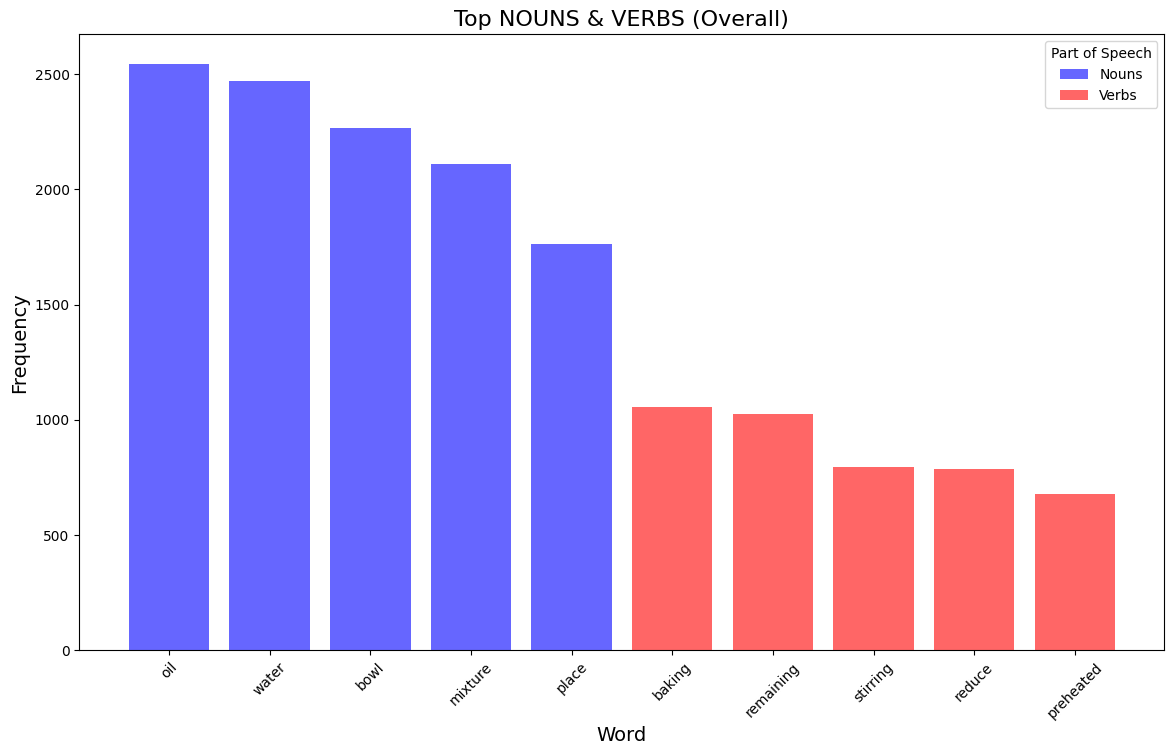

In [ ]:
# Trying an alternative approach for plotting to ensure it works smoothly
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of nouns and verbs
noun_counts = pos_df[pos_df['PoS'] == 'NOUN']['Word'].value_counts().head(5)
verb_counts = pos_df[pos_df['PoS'] == 'VERB']['Word'].value_counts().head(5)

# Combine the top words into a single DataFrame
top_words_combined = pd.concat([
    noun_counts.rename('Frequency').reset_index().assign(PoS='Noun'),
    verb_counts.rename('Frequency').reset_index().assign(PoS='Verb')
])

# Plot
plt.figure(figsize=(14, 8))
plt.bar(top_words_combined[top_words_combined['PoS'] == 'Noun']['Word'],
        top_words_combined[top_words_combined['PoS'] == 'Noun']['Frequency'], label='Nouns', color='b', alpha=0.6)
plt.bar(top_words_combined[top_words_combined['PoS'] == 'Verb']['Word'],
        top_words_combined[top_words_combined['PoS'] == 'Verb']['Frequency'], label='Verbs', color='r', alpha=0.6)
plt.title('Top NOUNS & VERBS (Overall)', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Part of Speech')
plt.show()

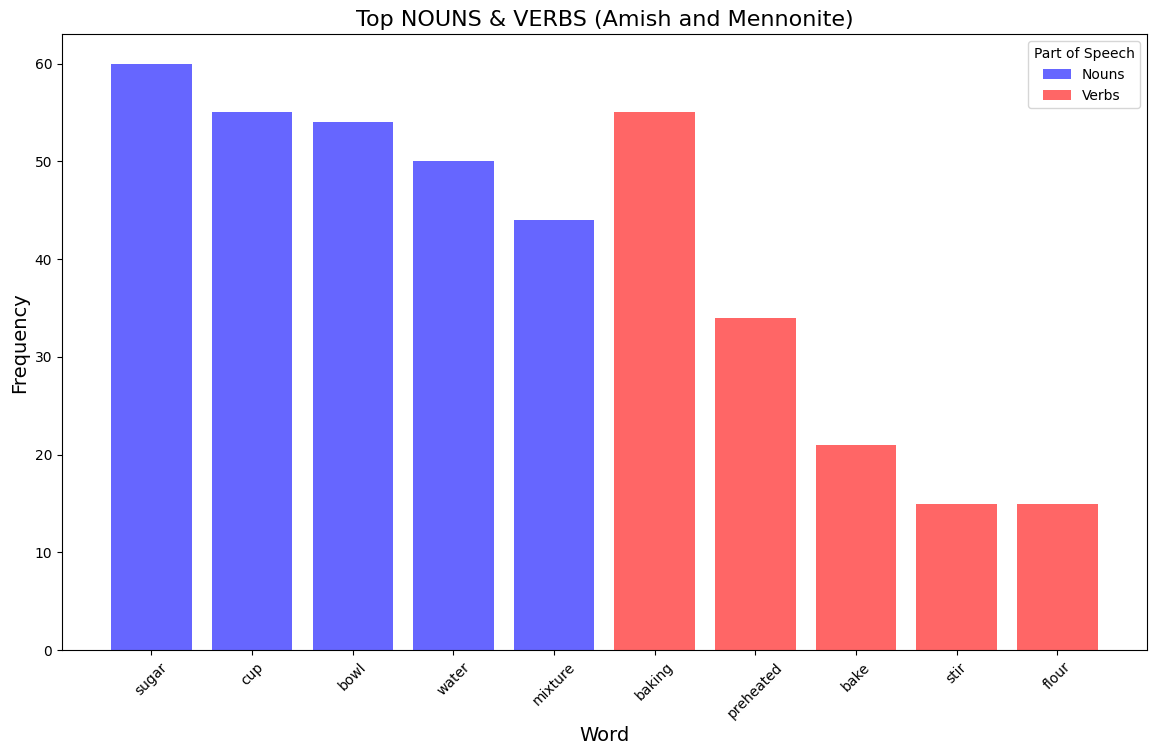

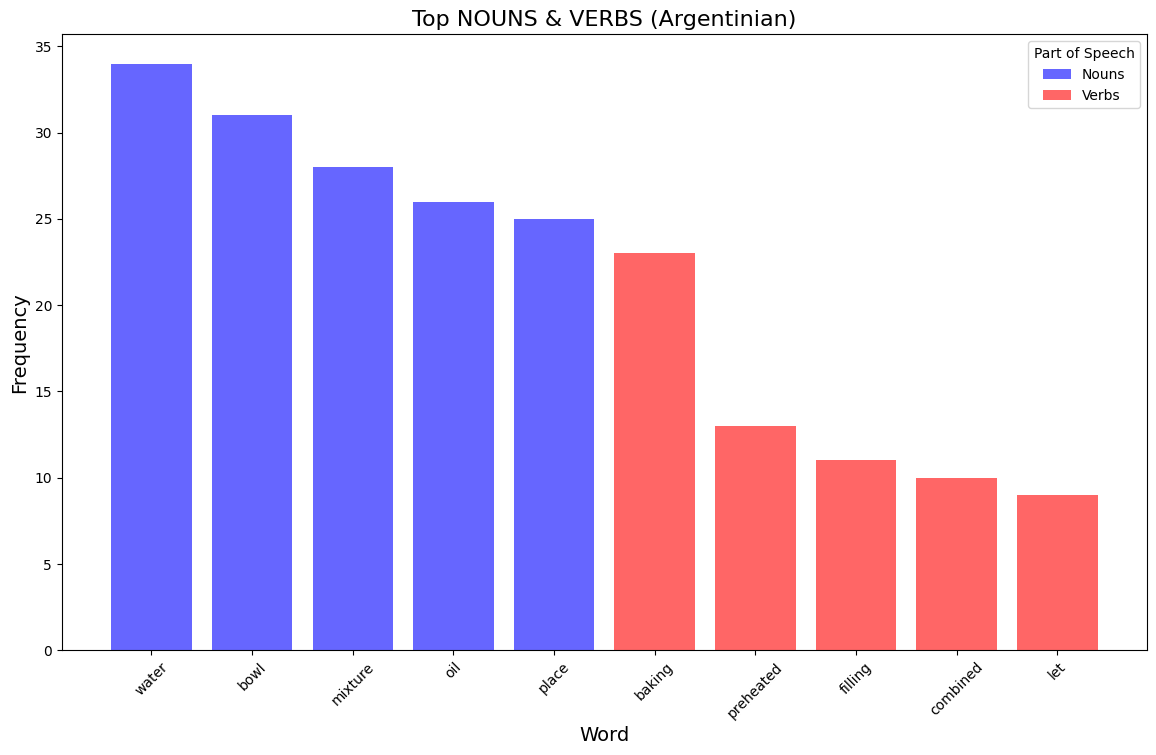

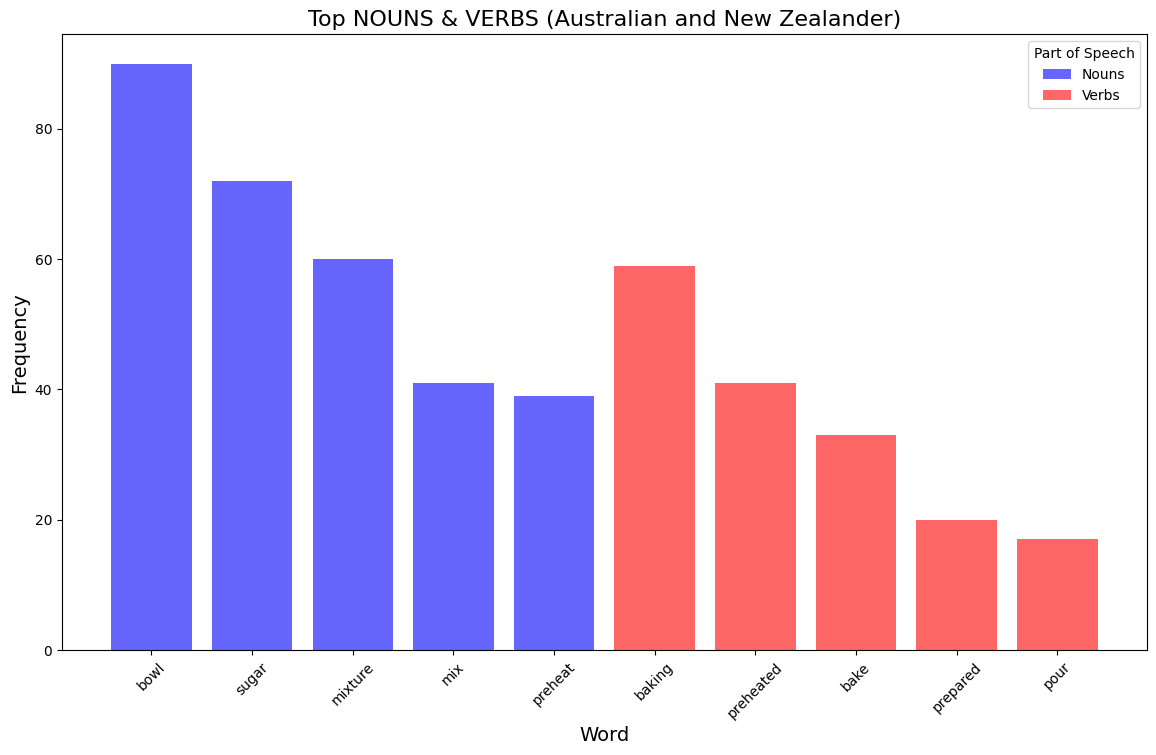

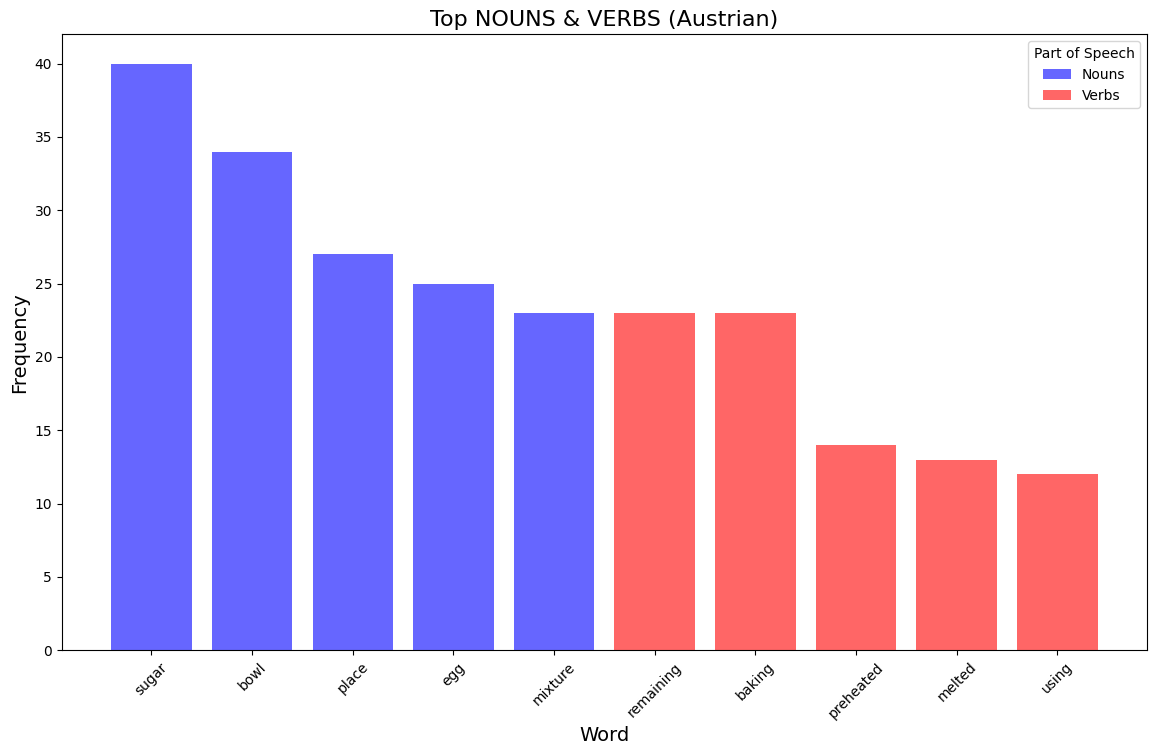

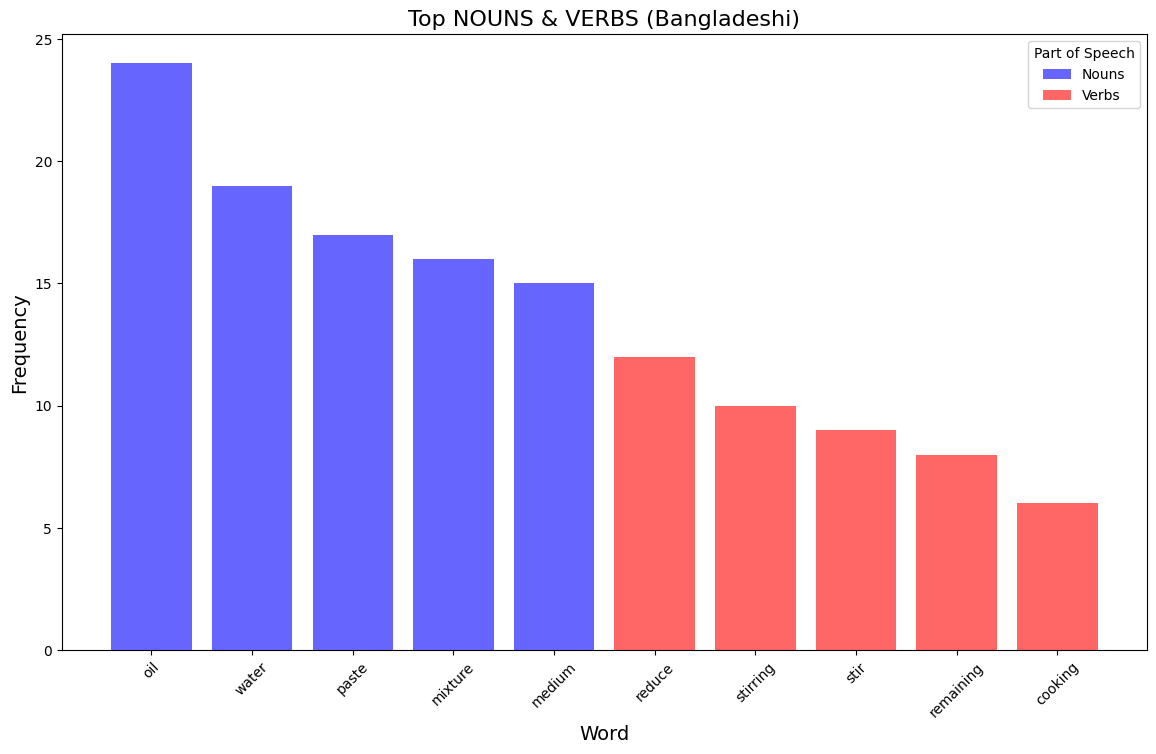

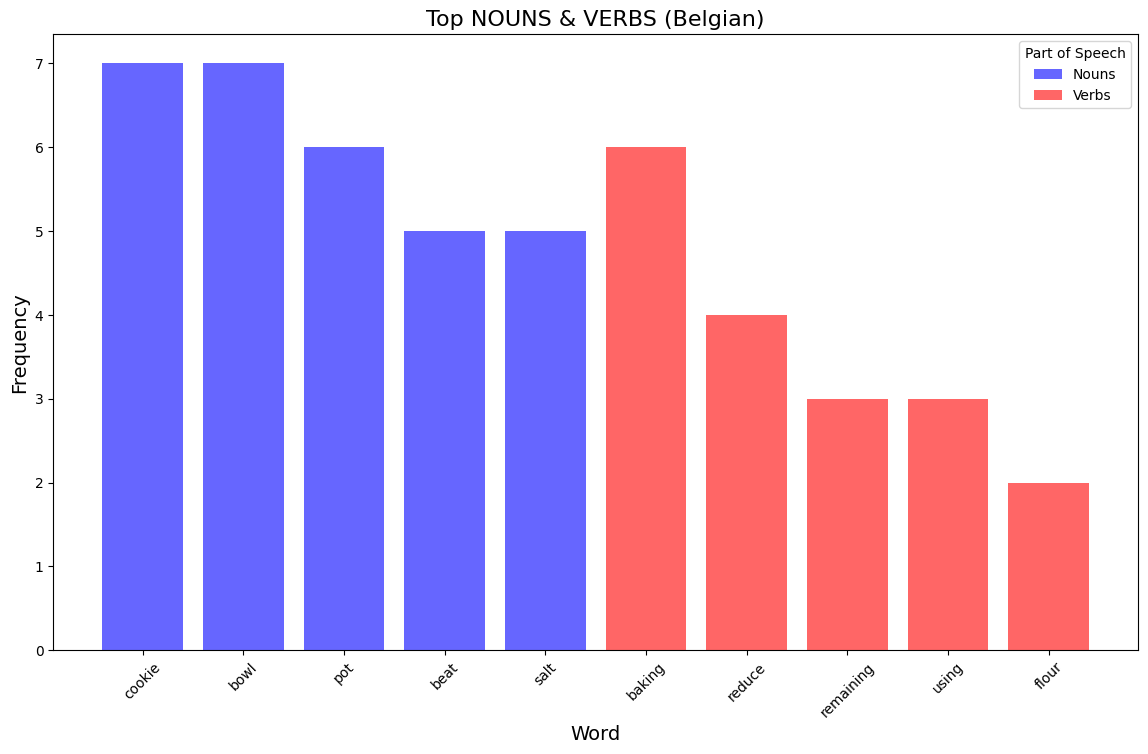

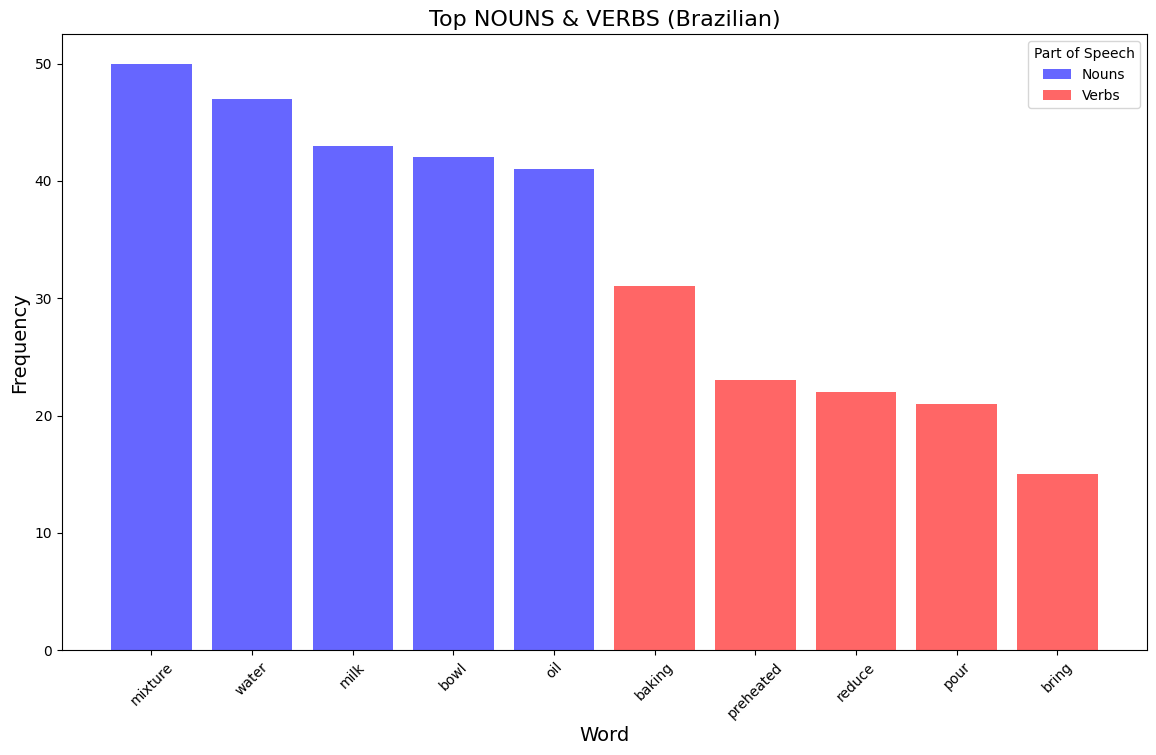

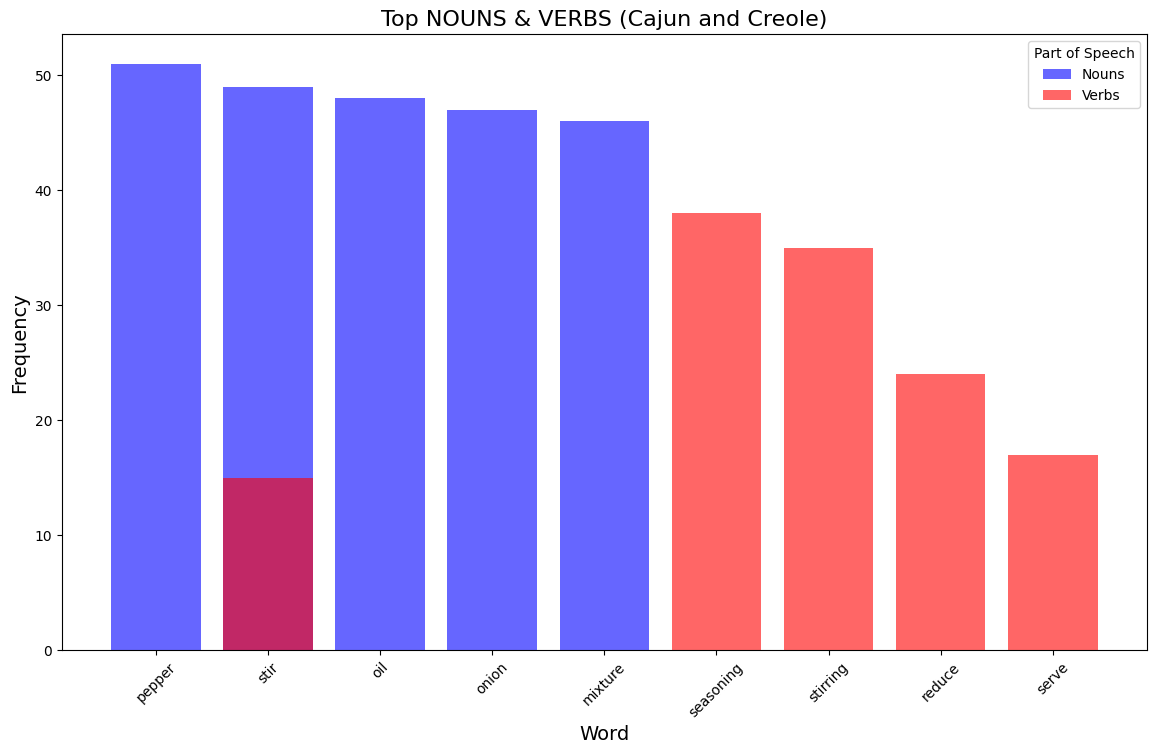

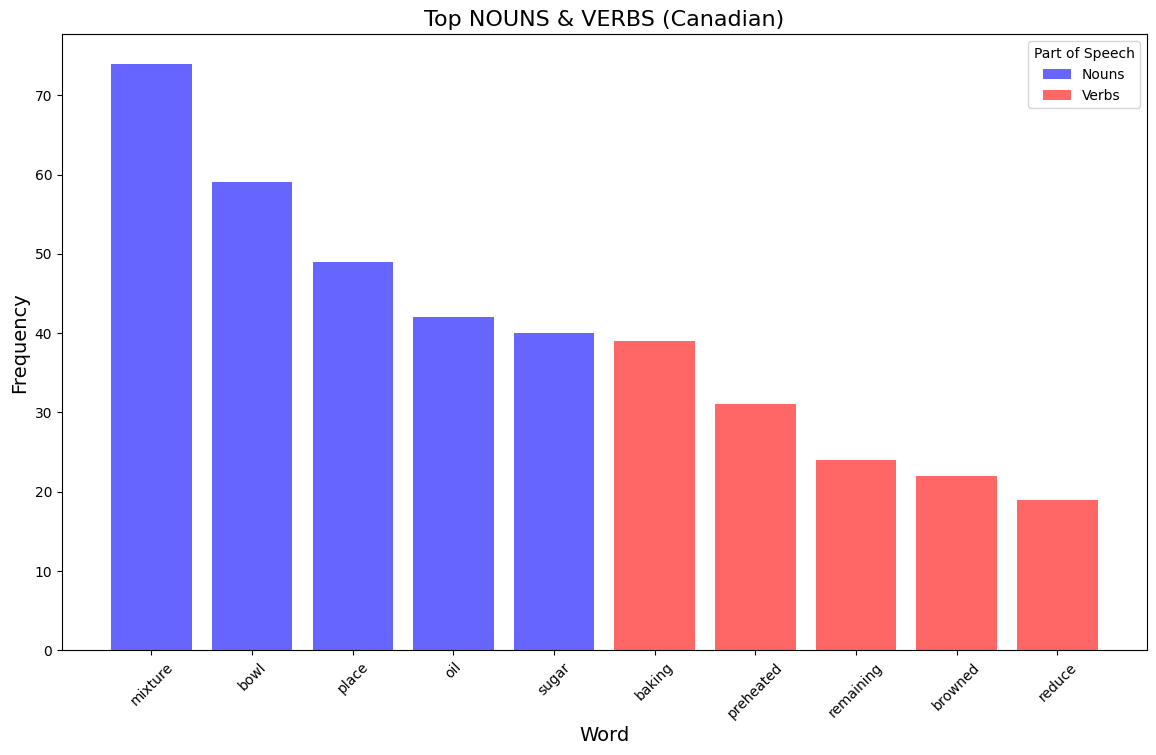

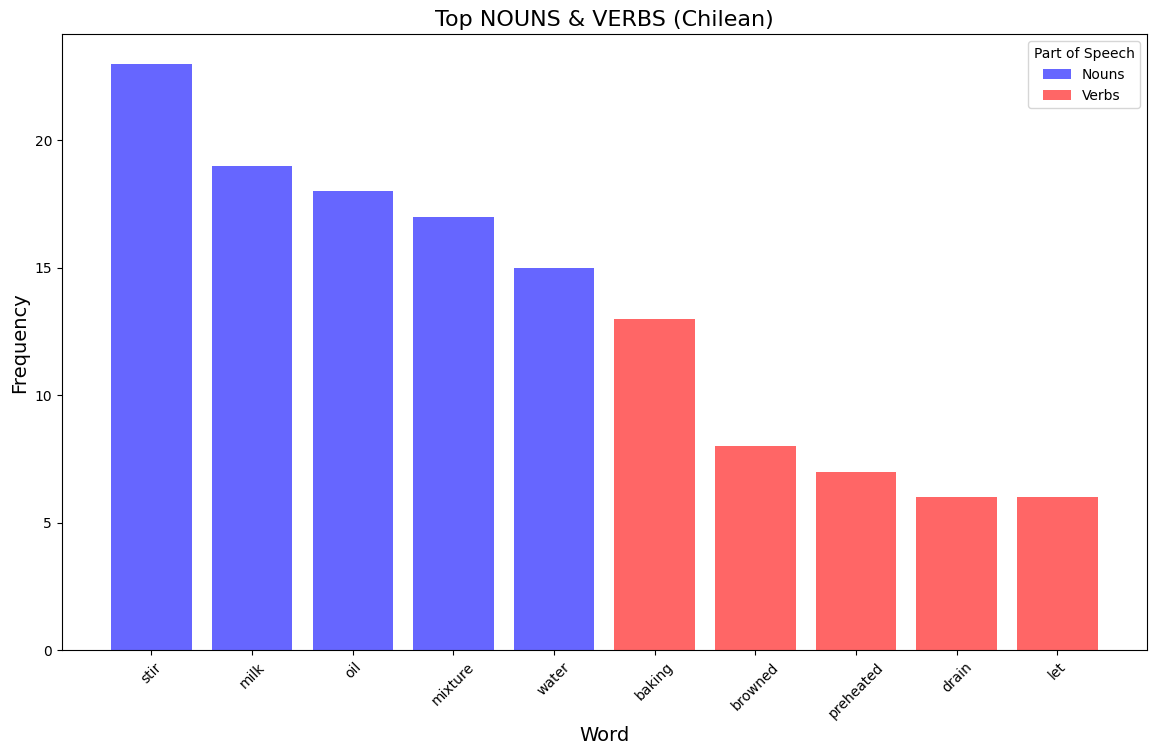

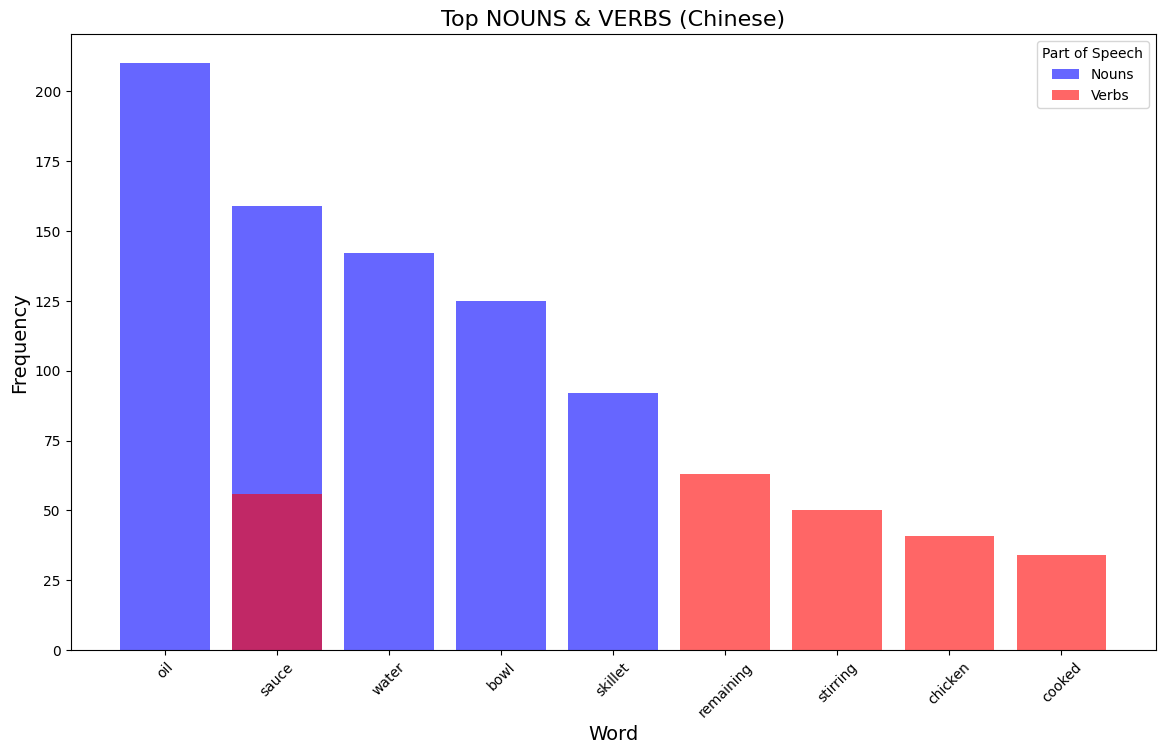

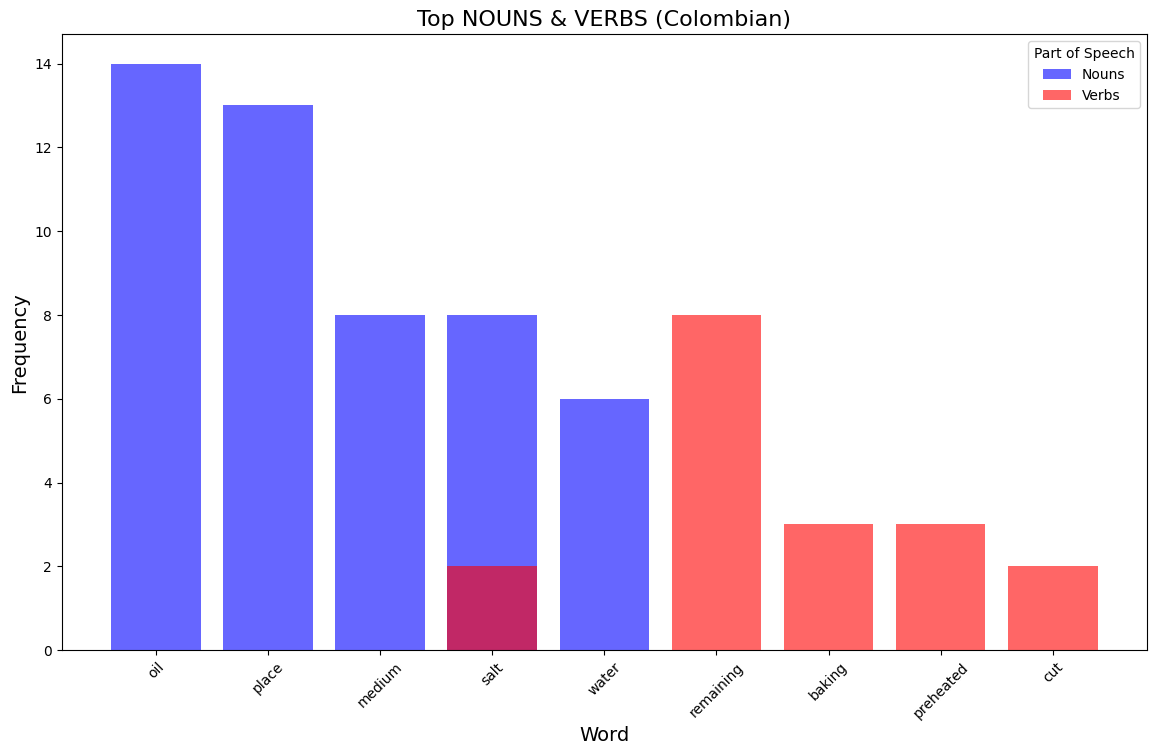

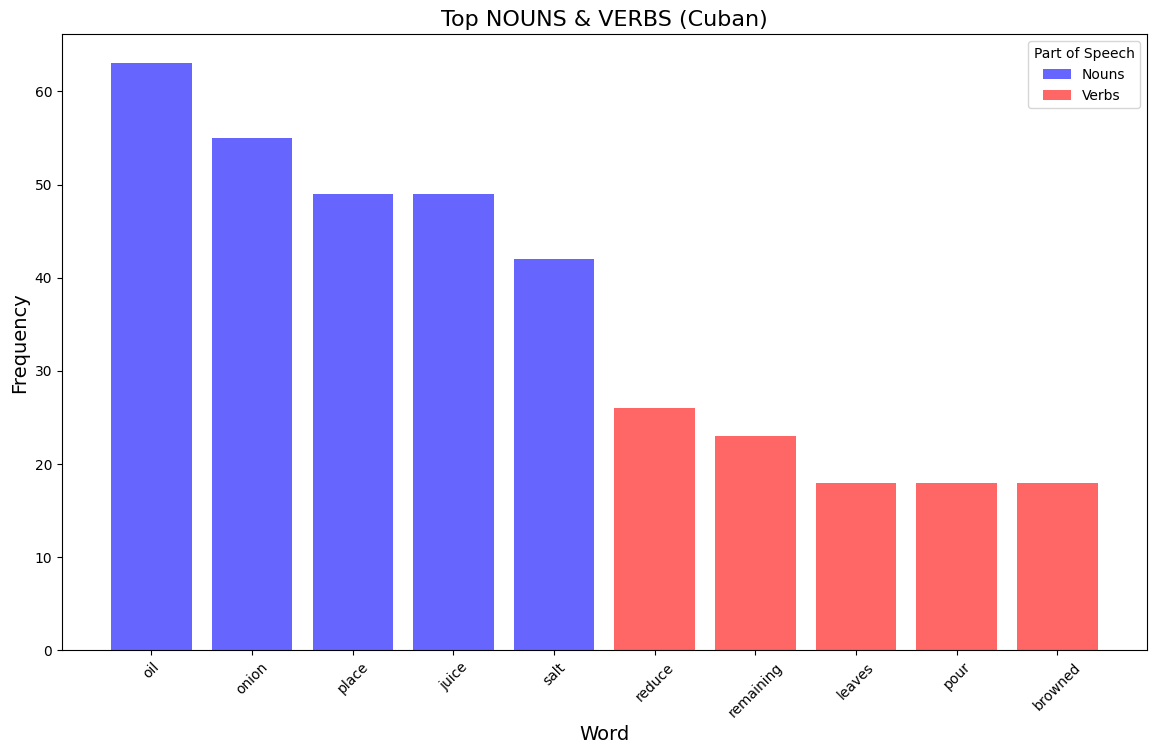

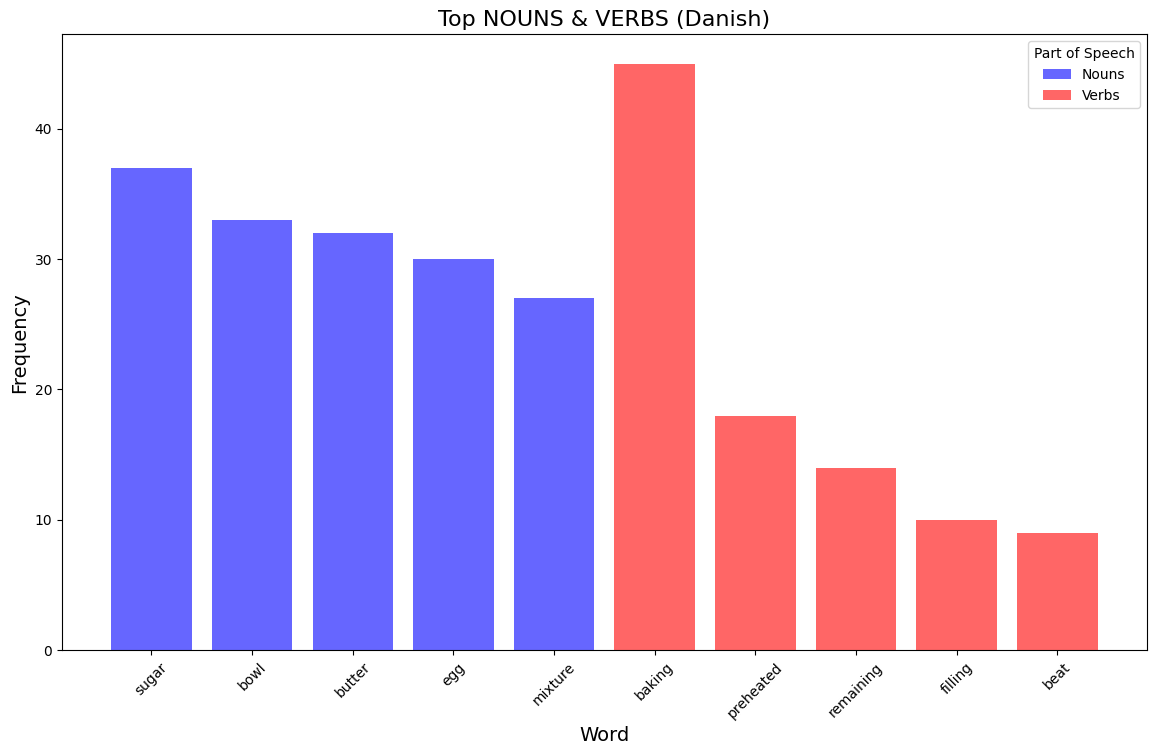

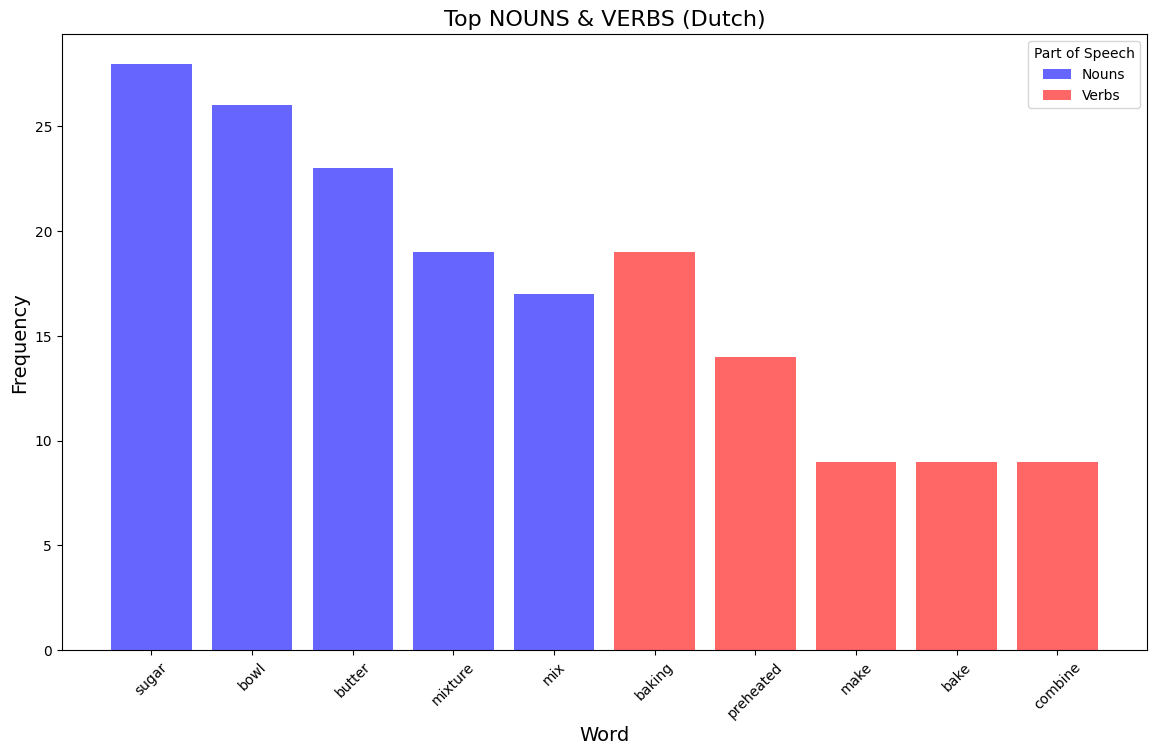

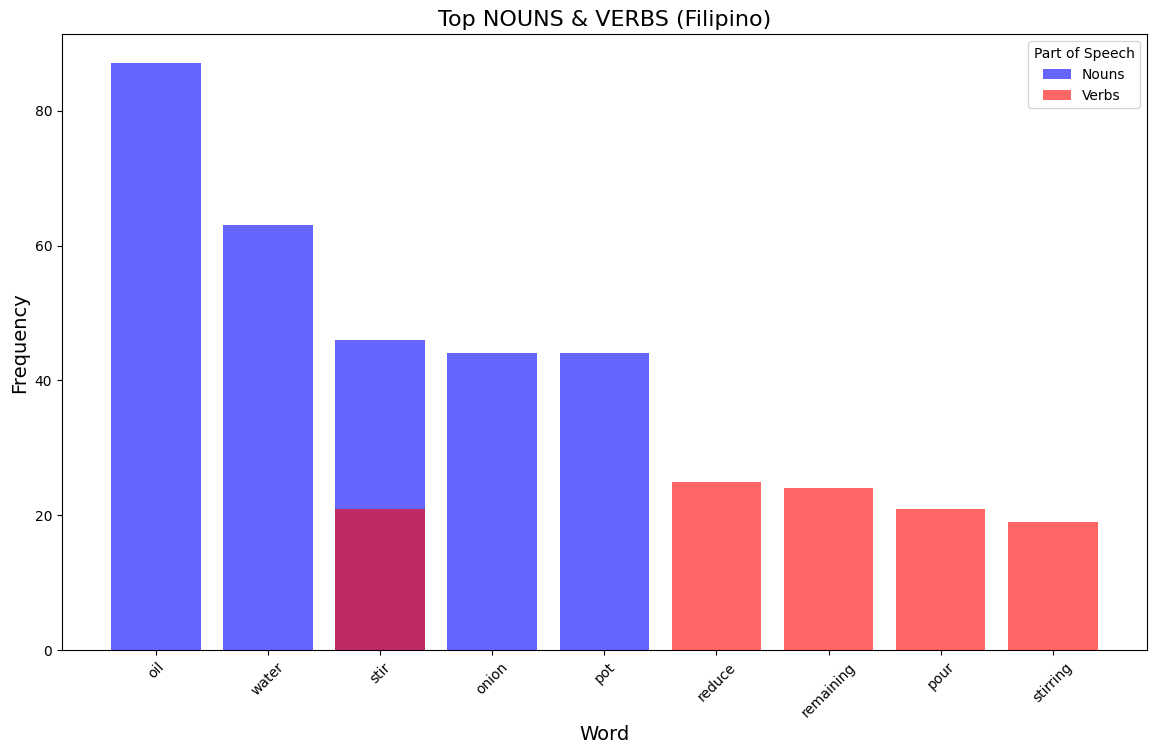

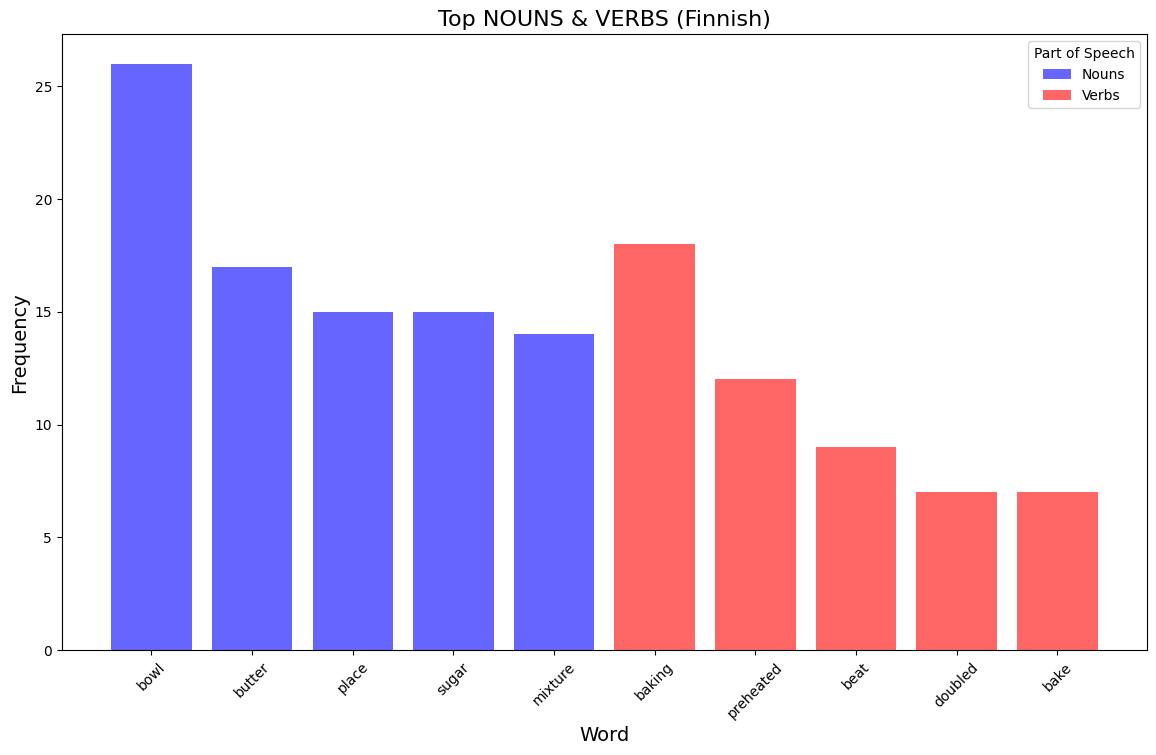

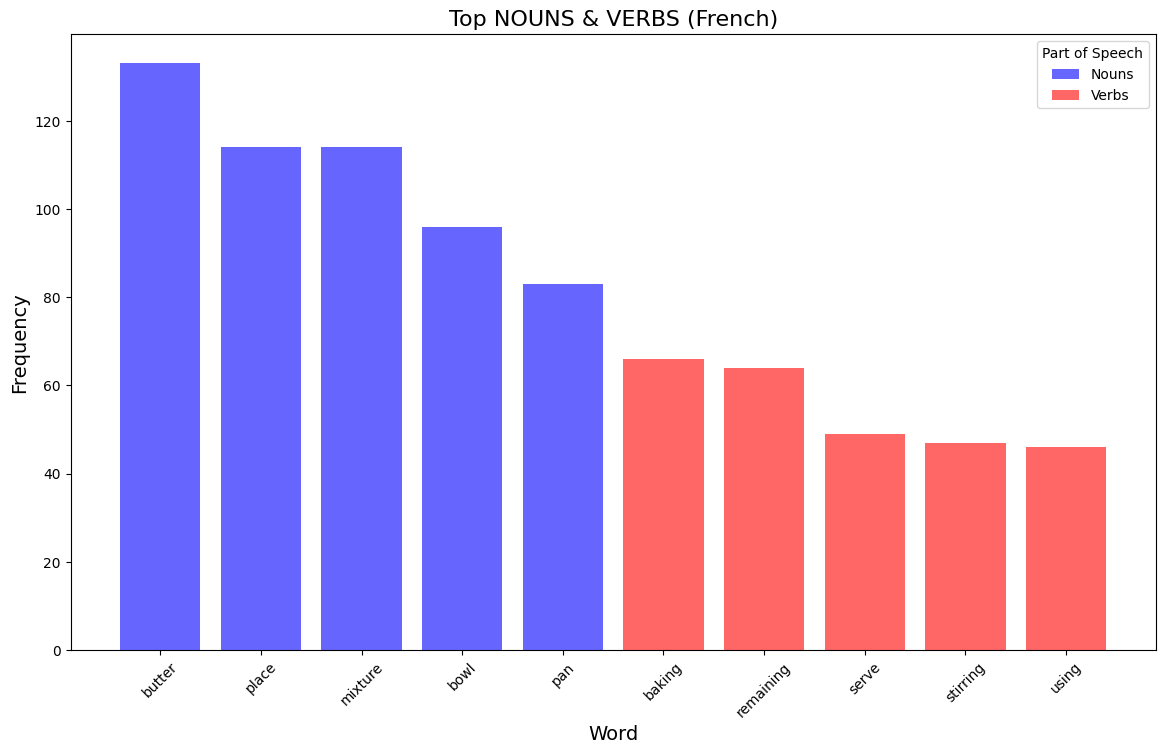

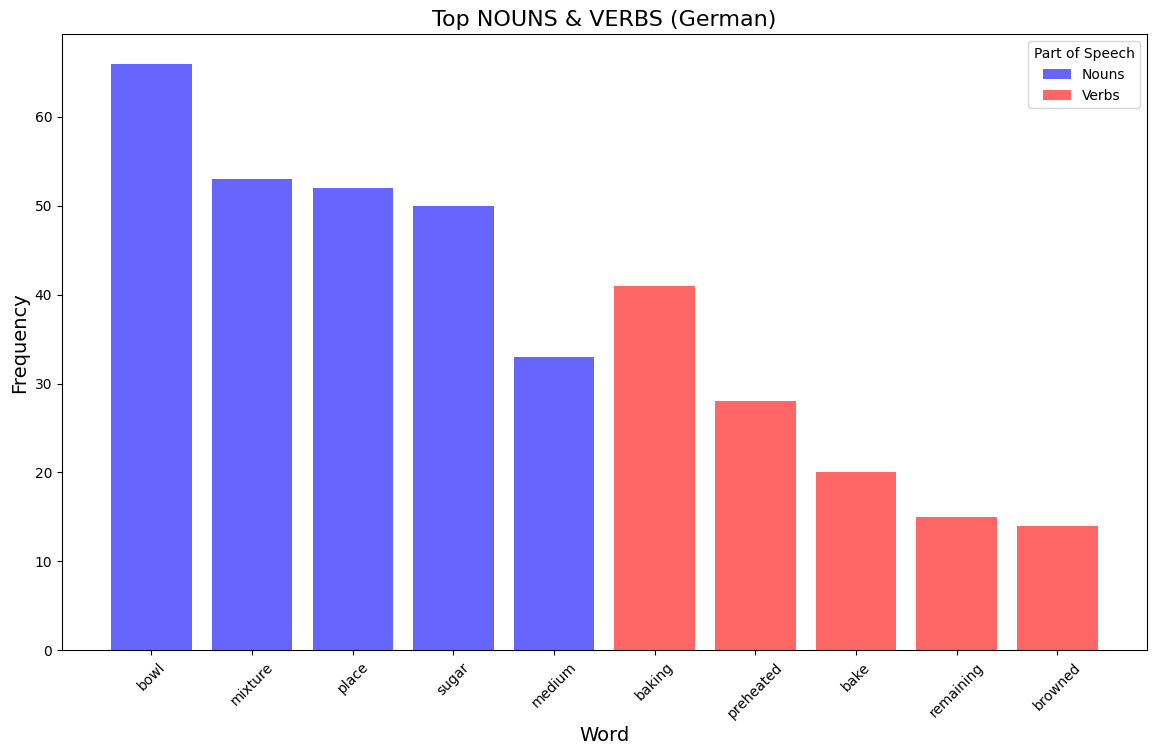

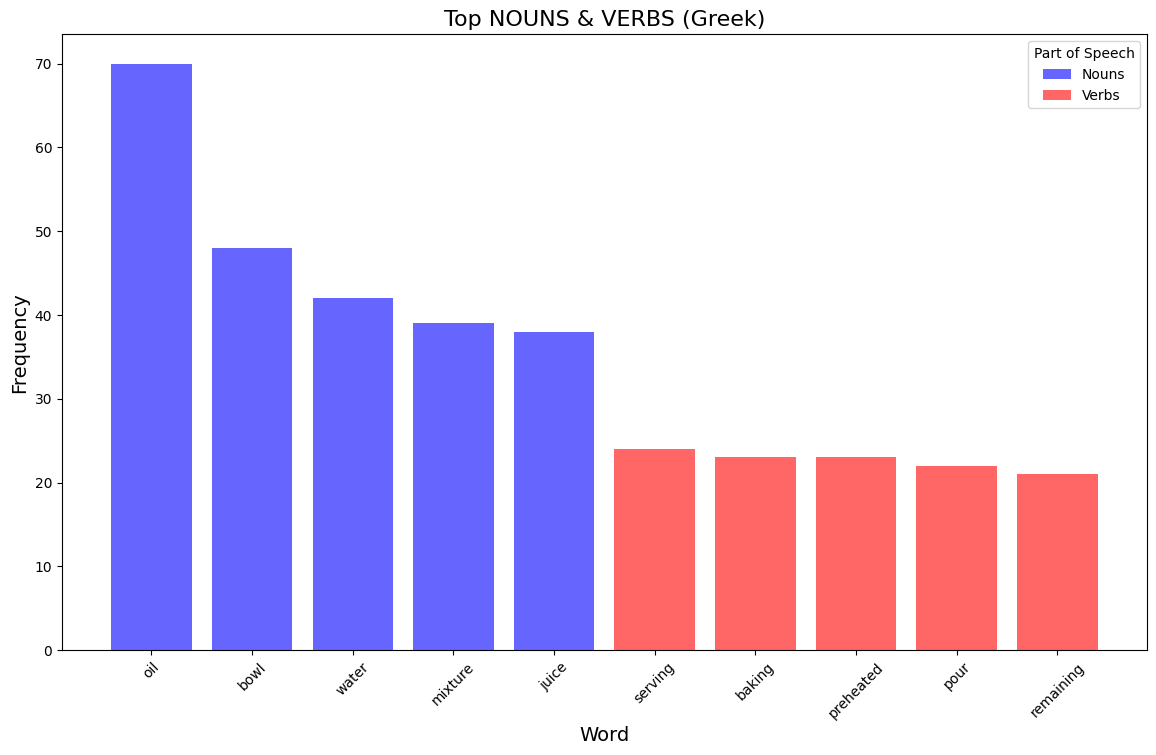

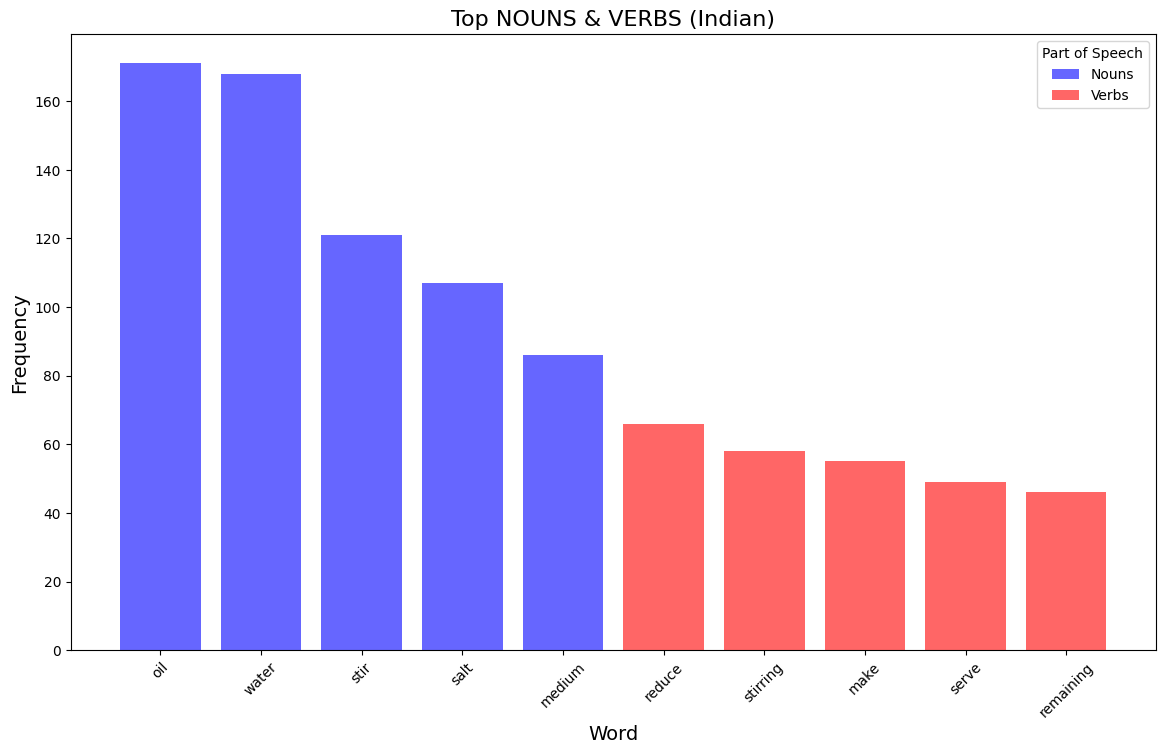

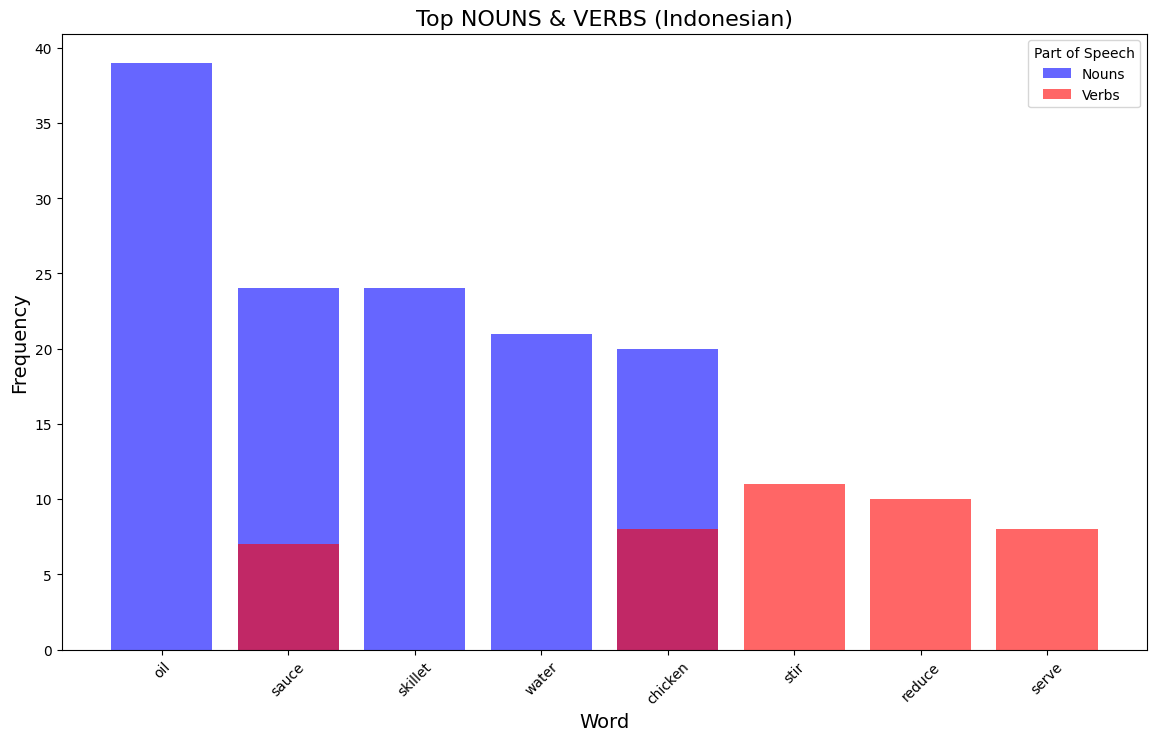

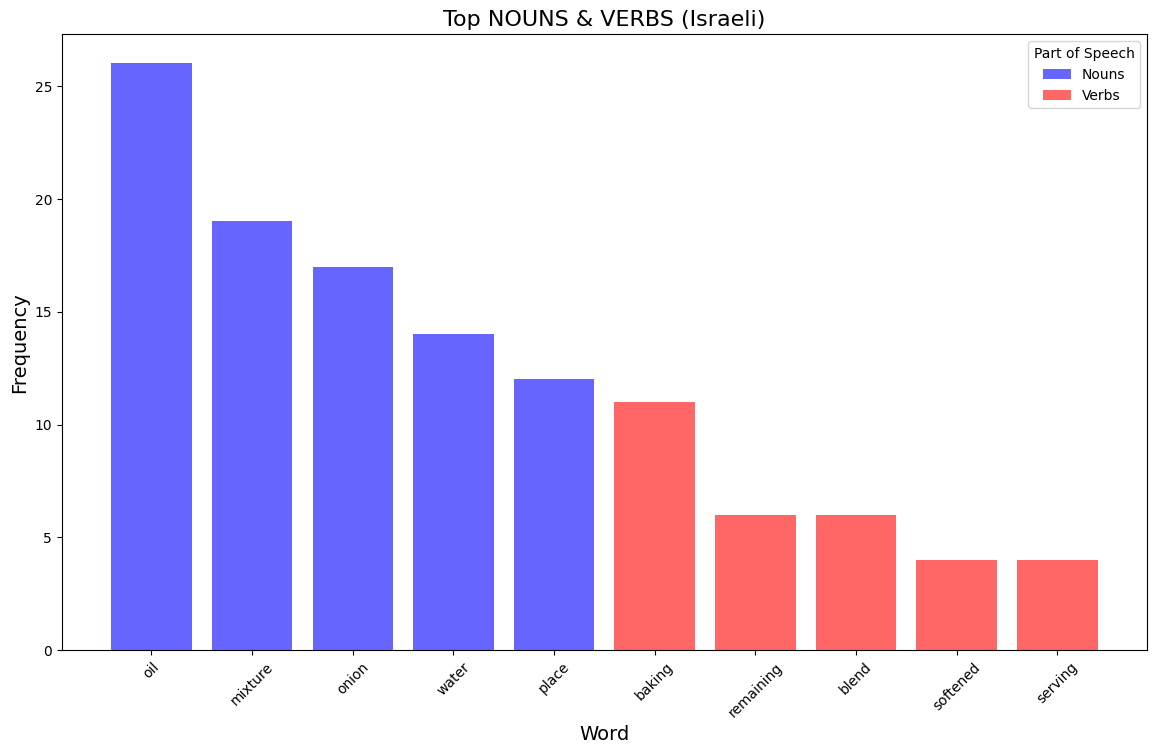

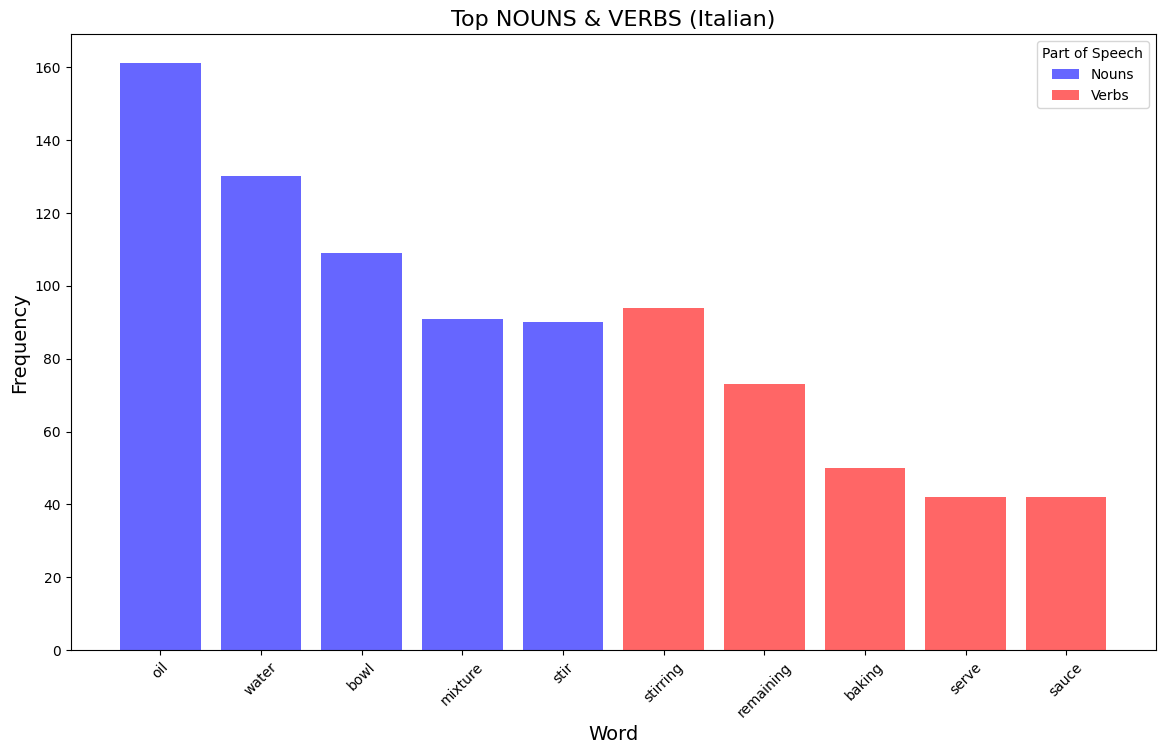

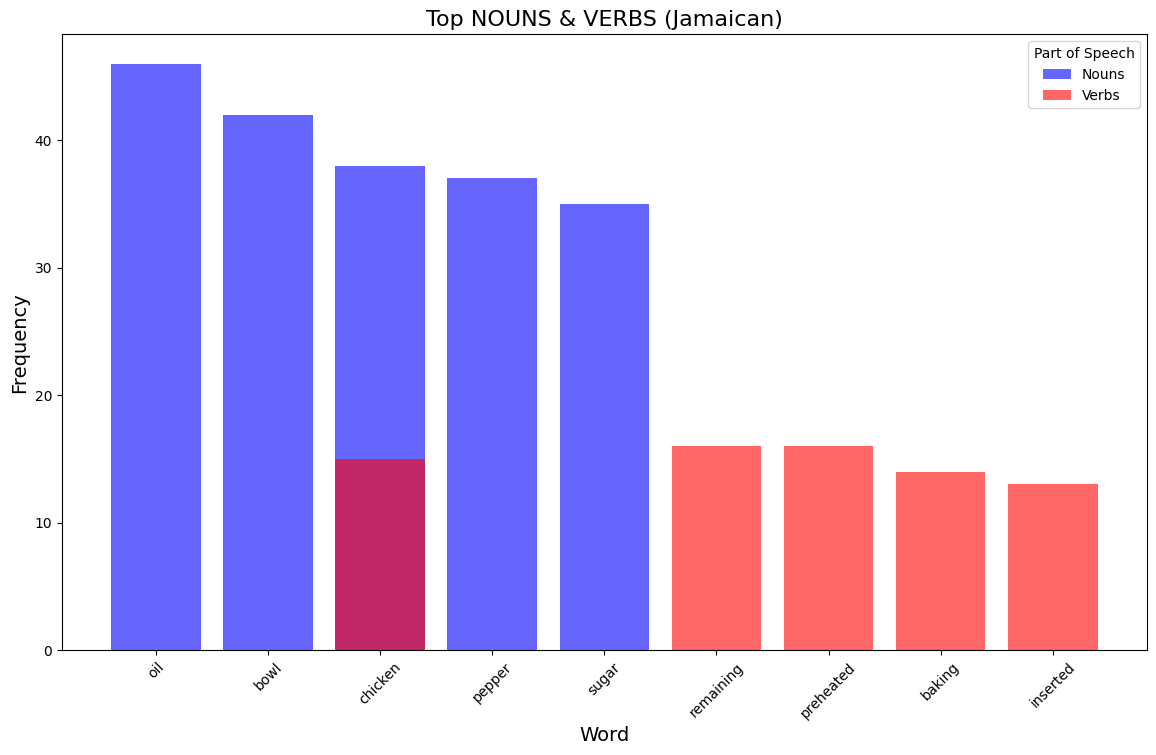

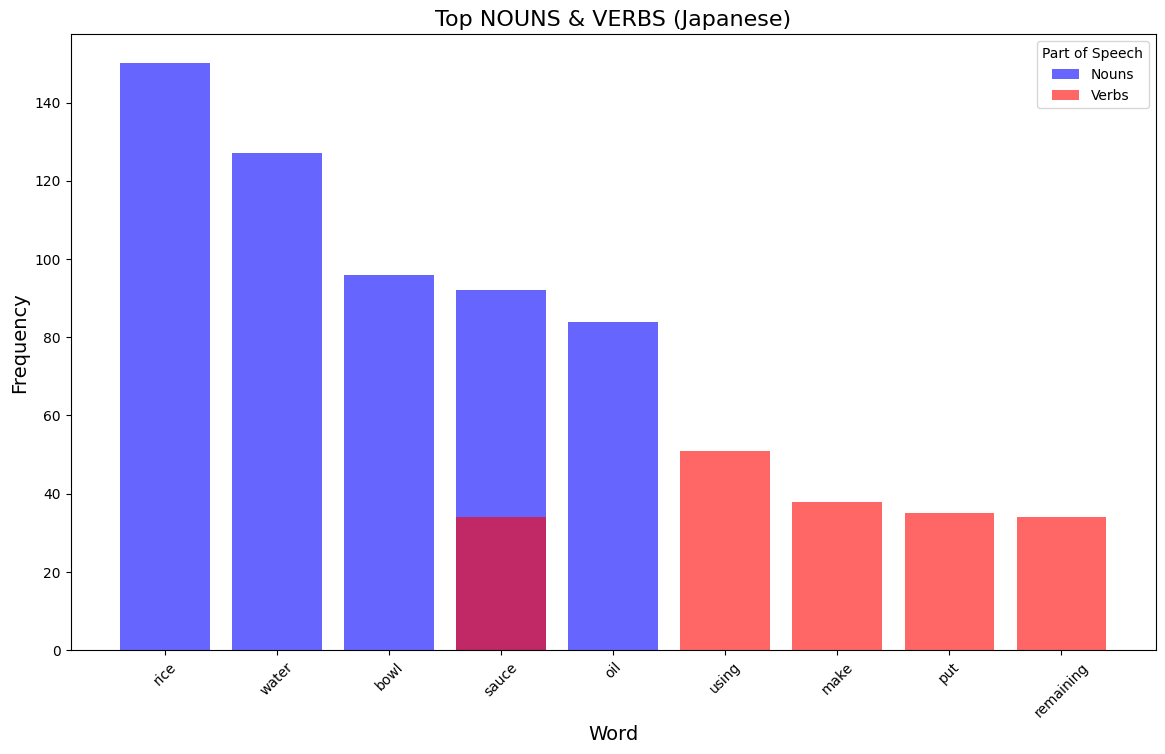

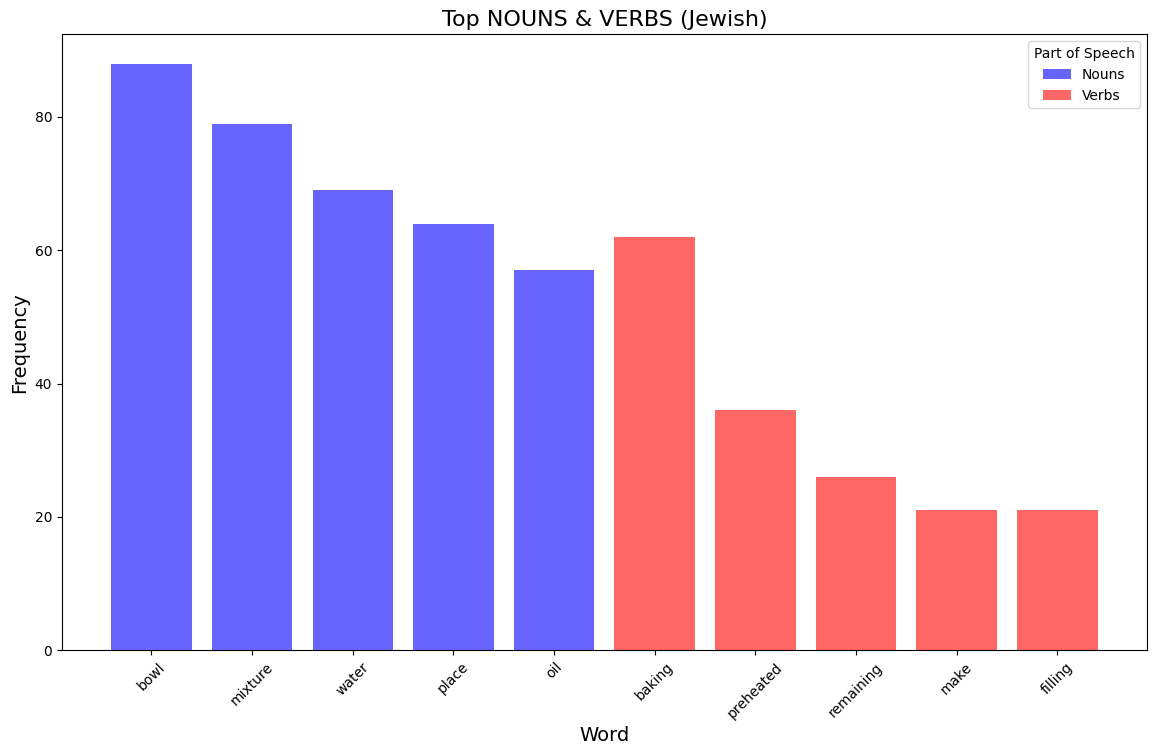

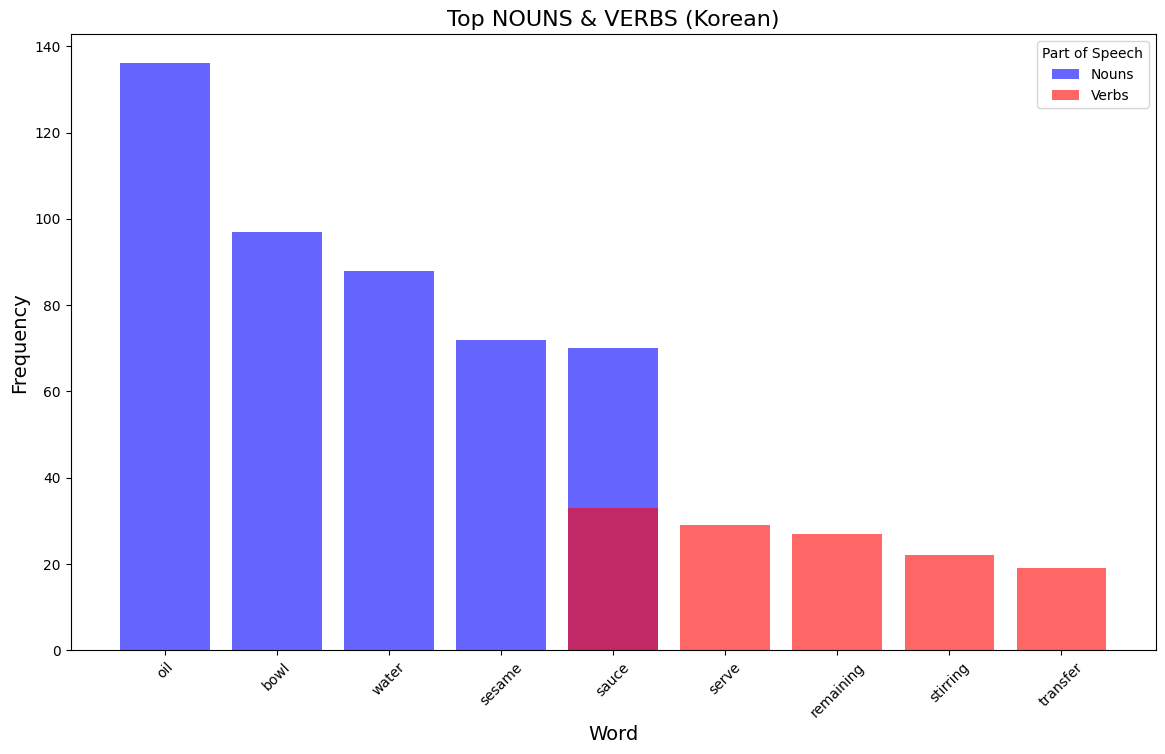

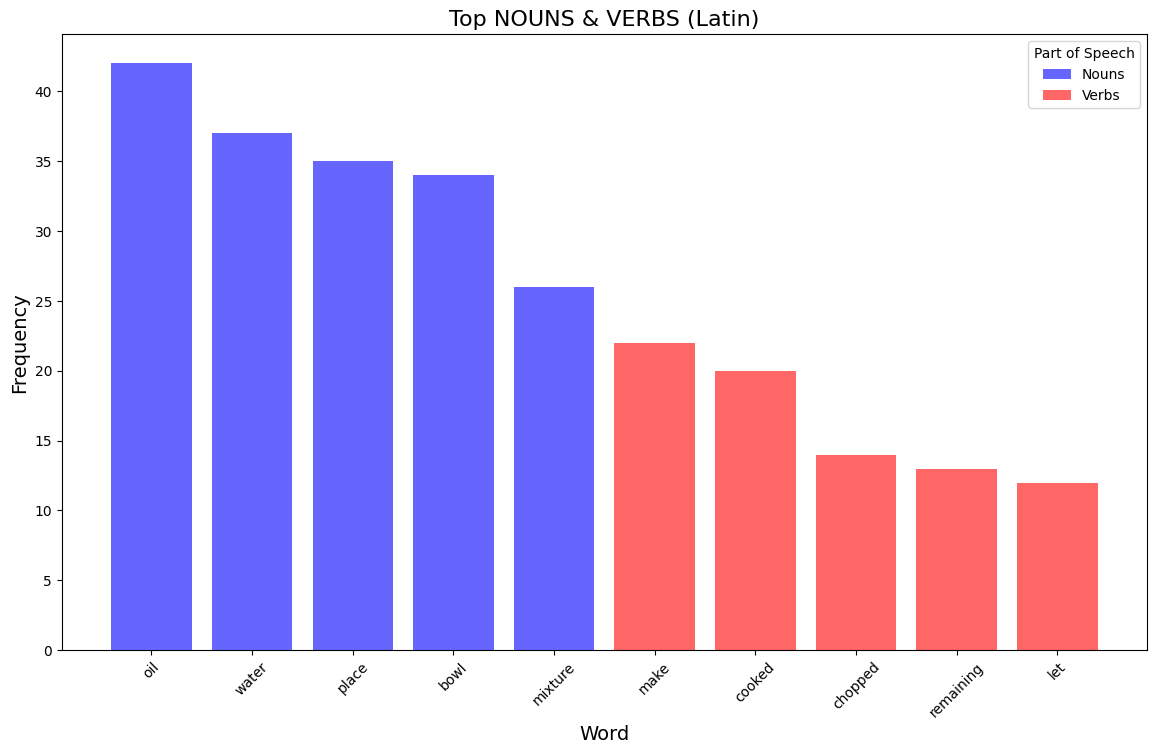

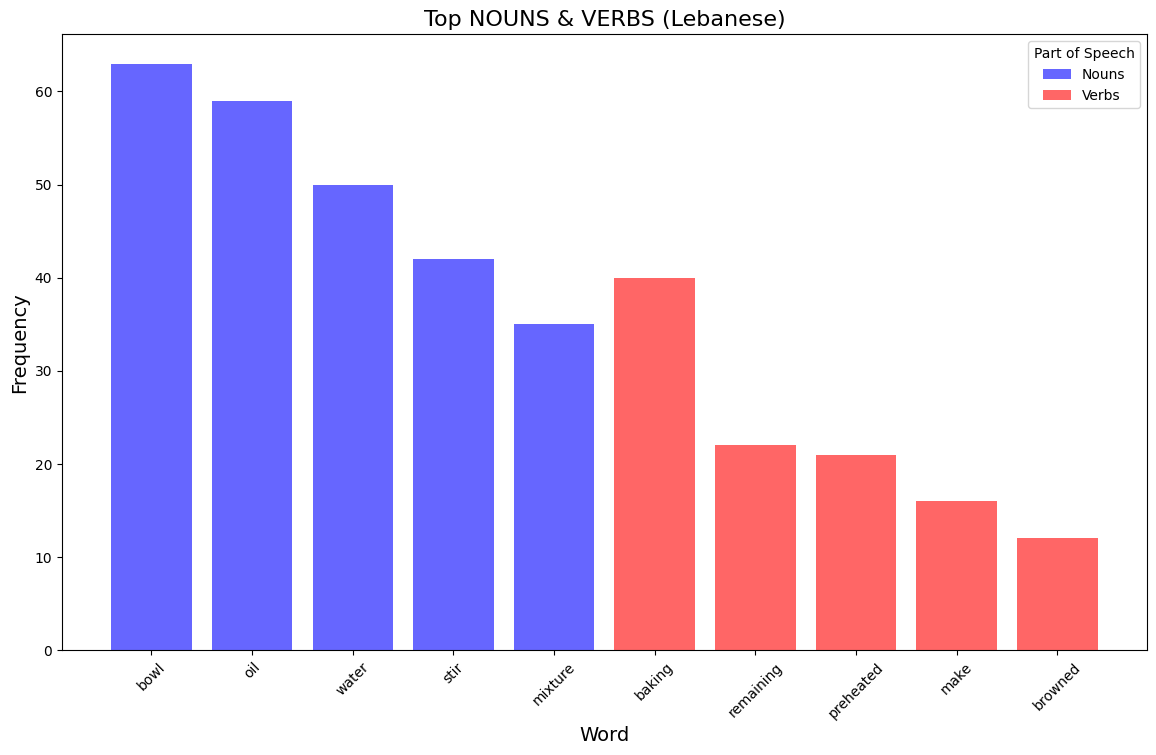

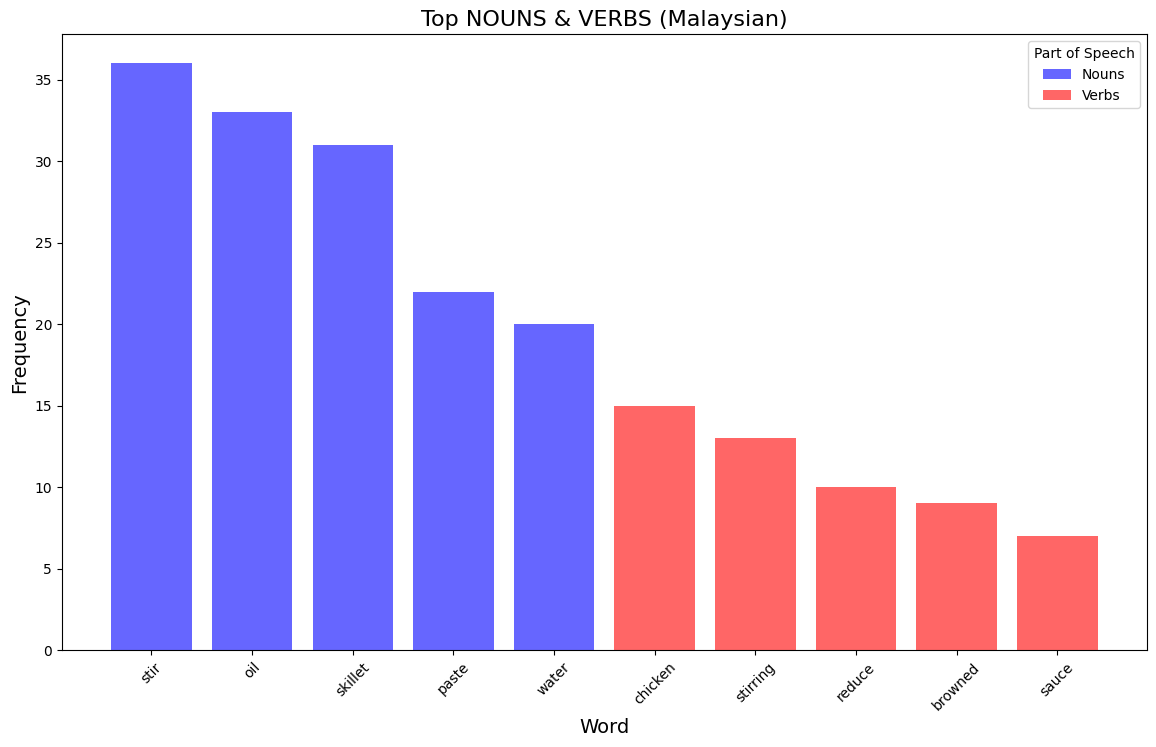

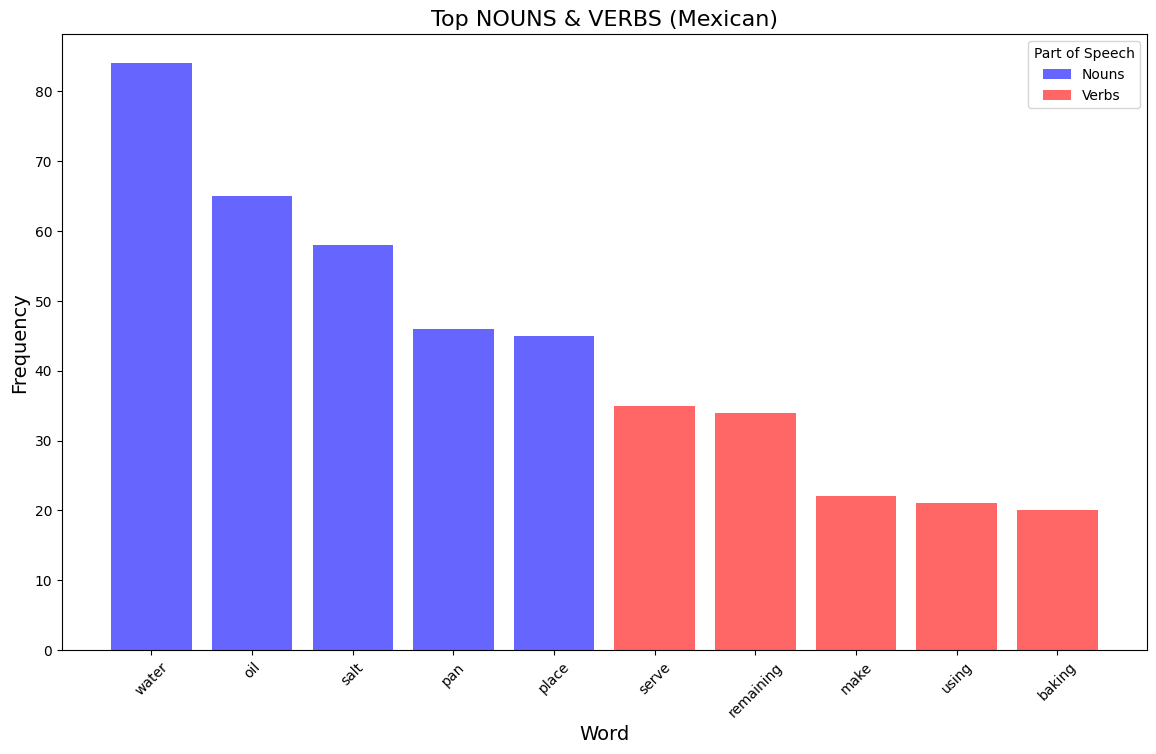

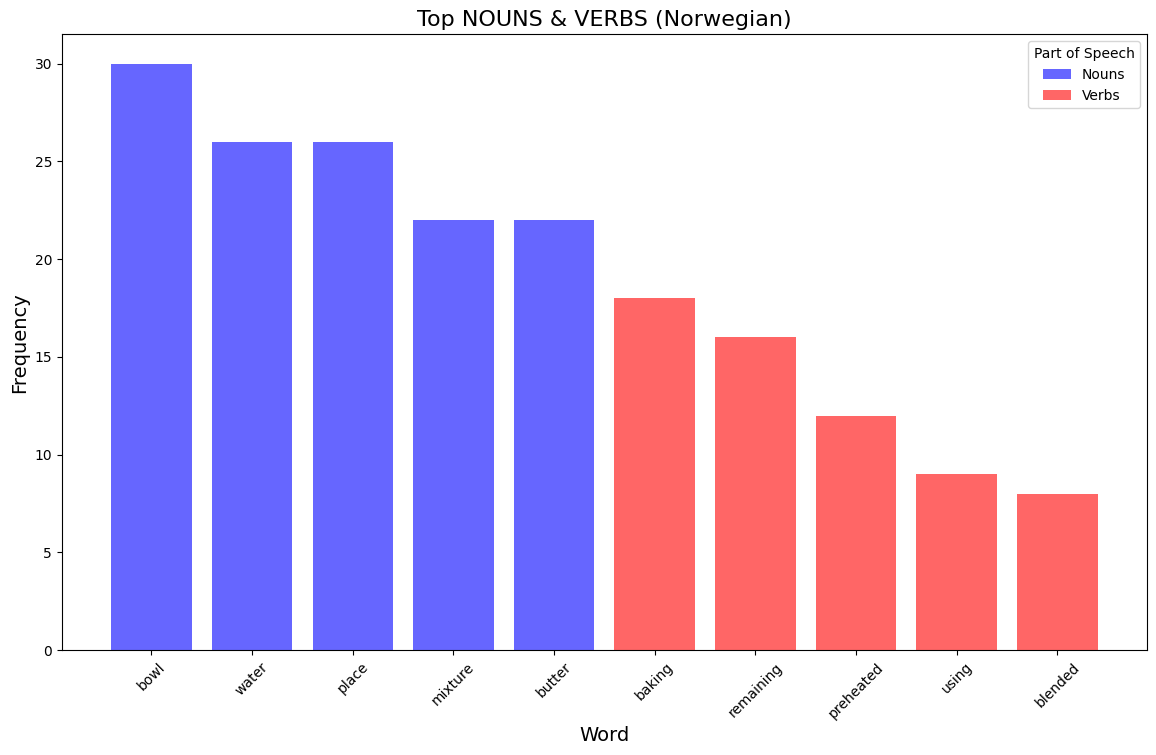

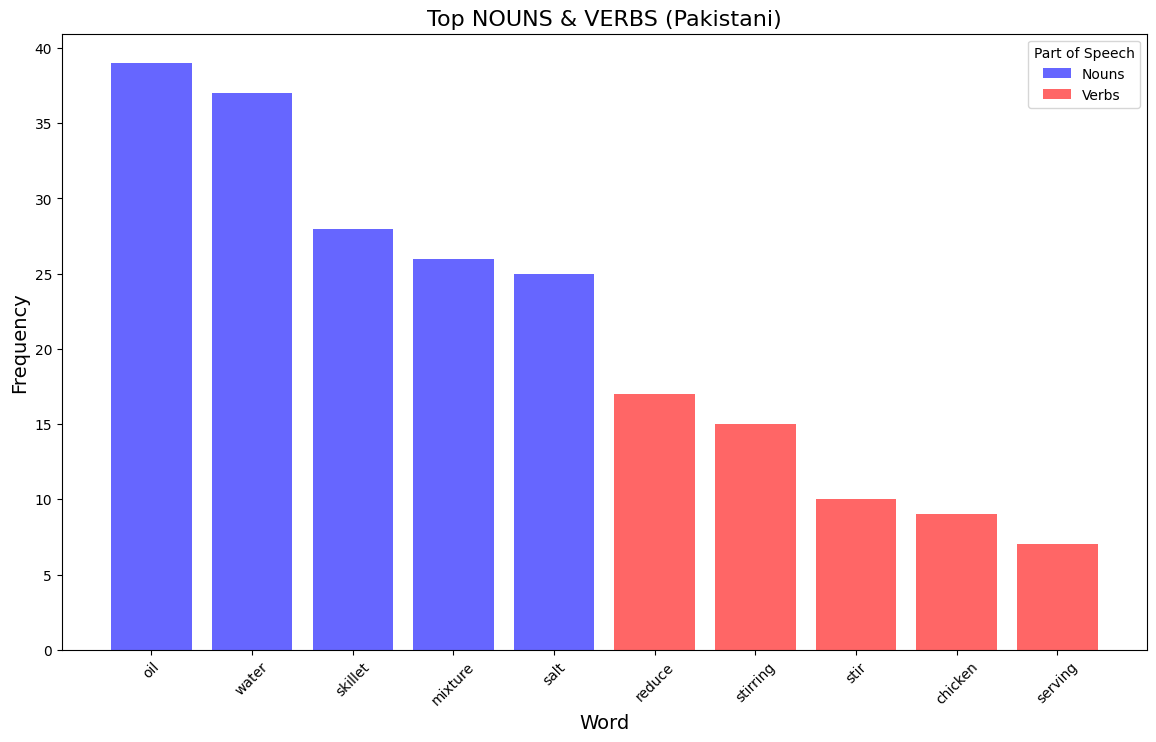

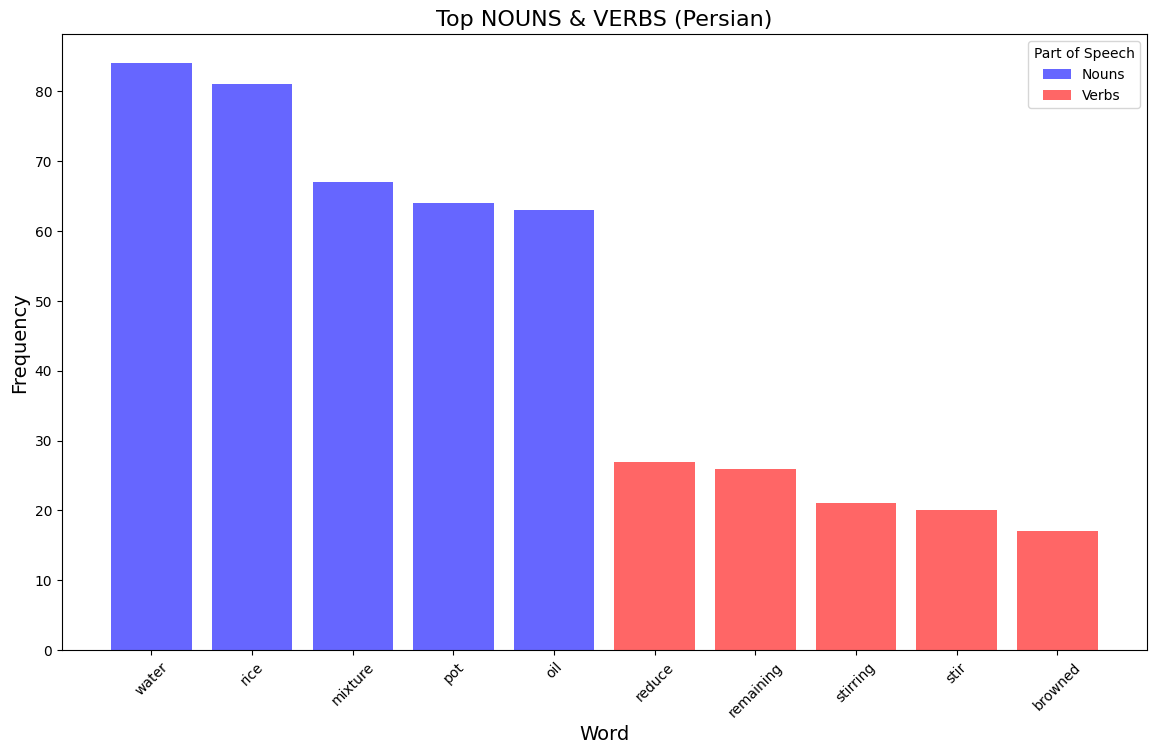

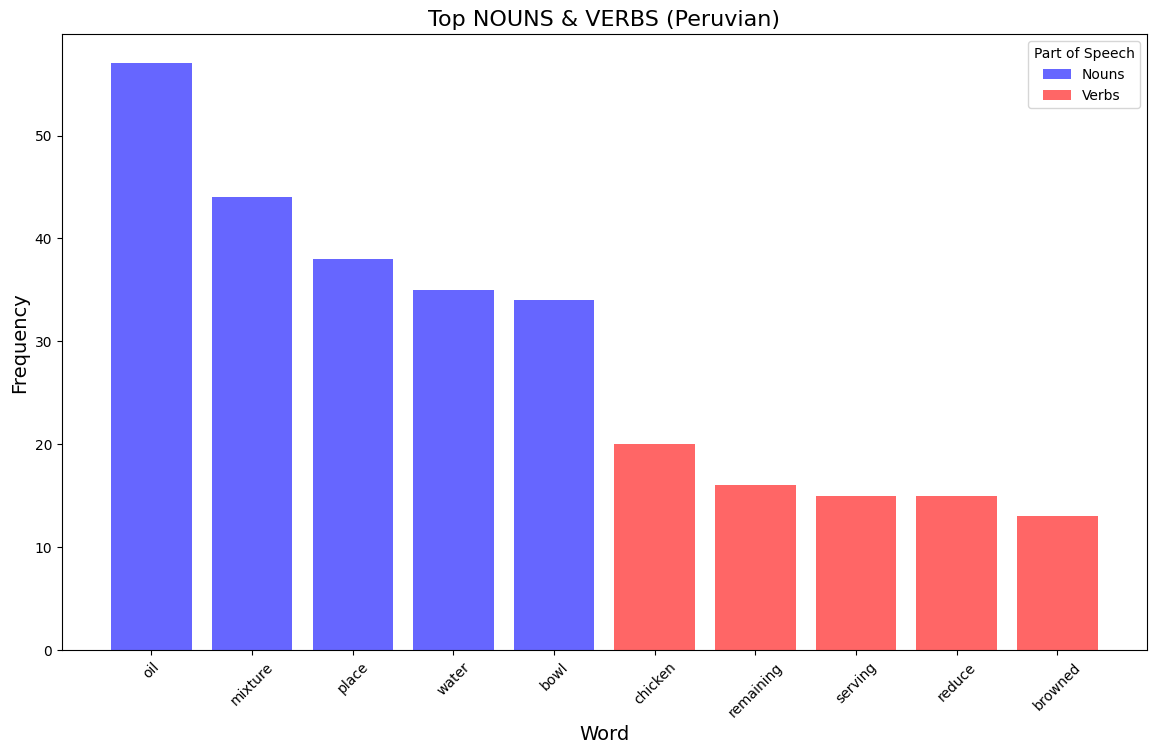

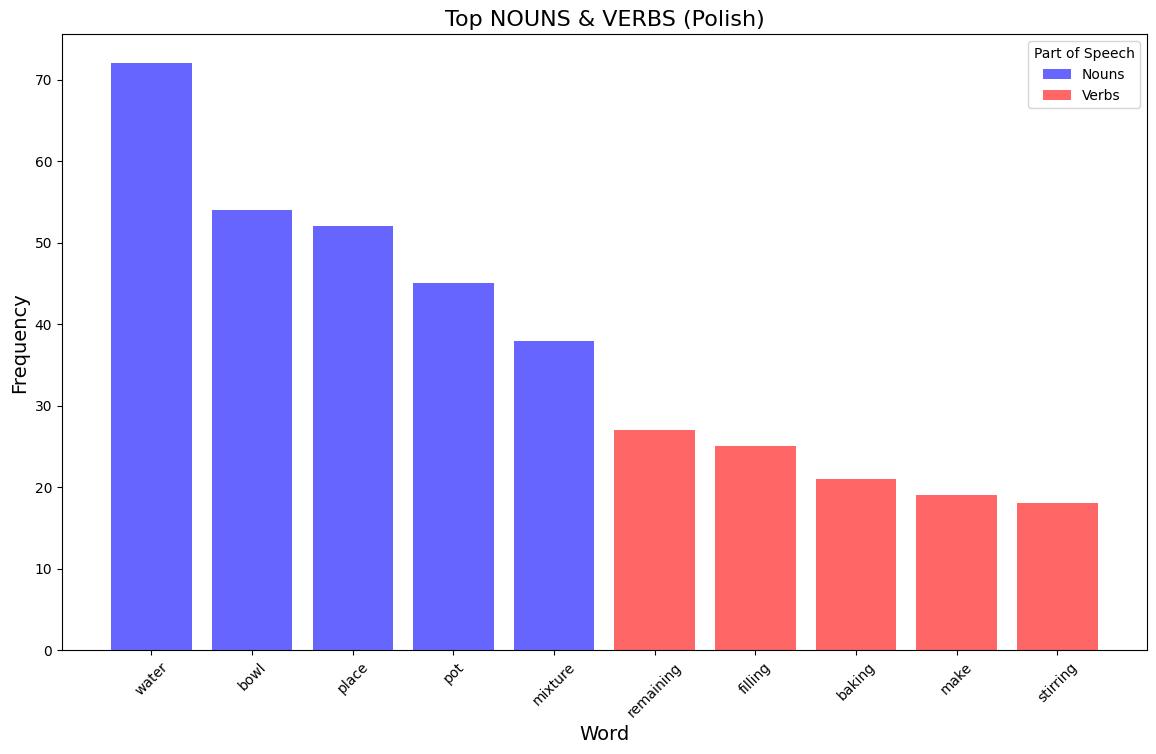

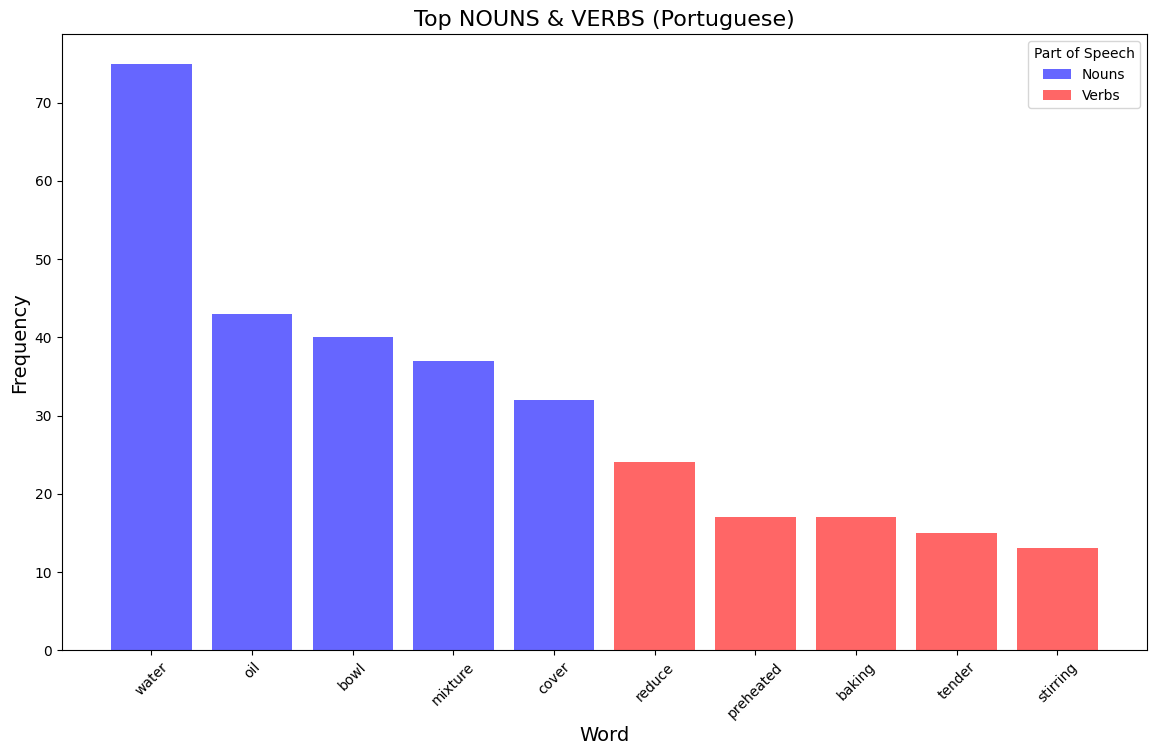

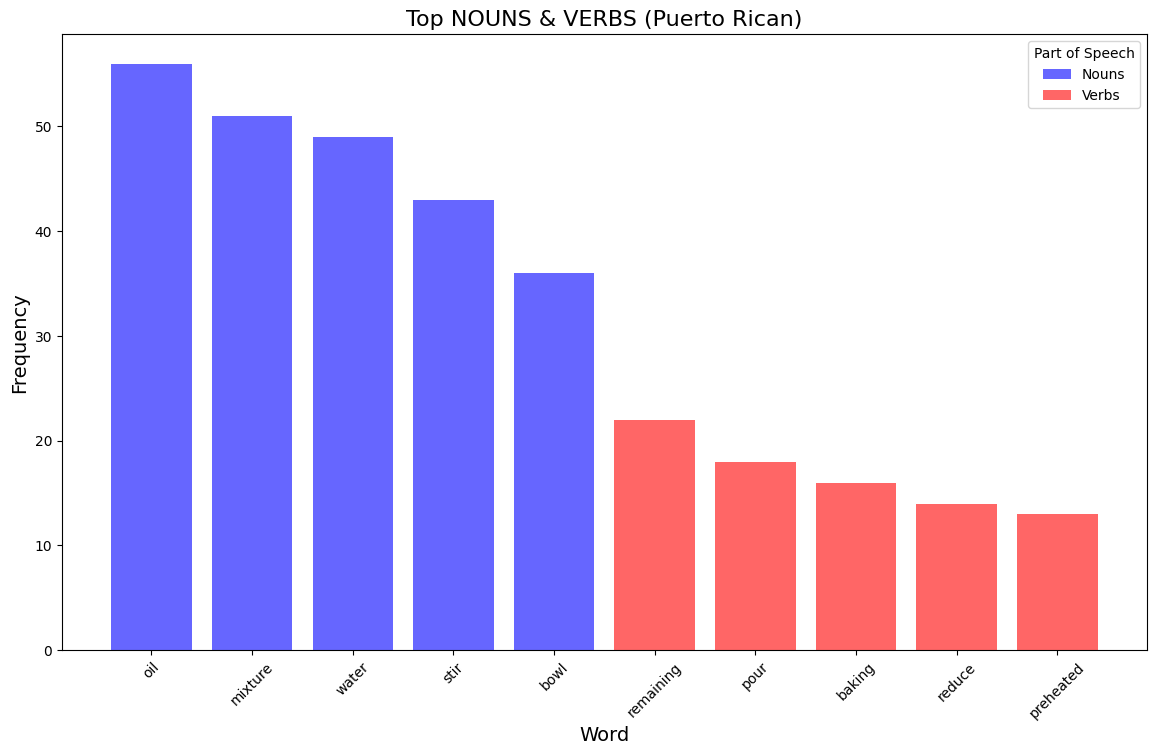

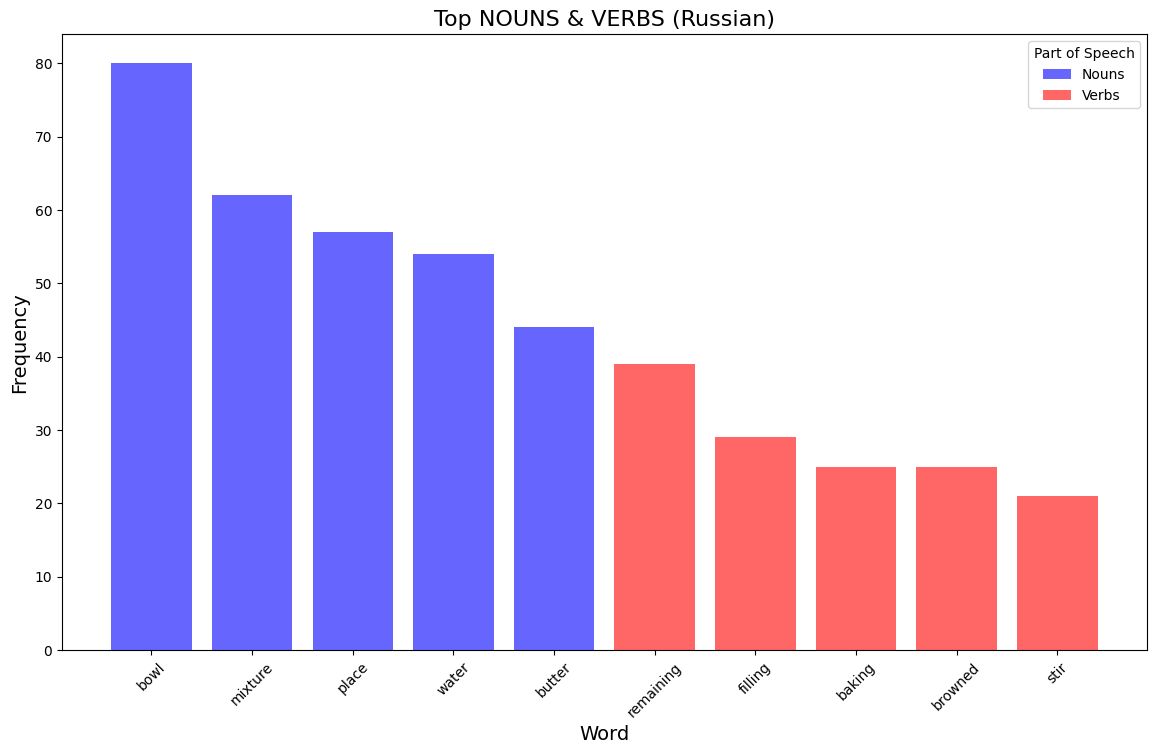

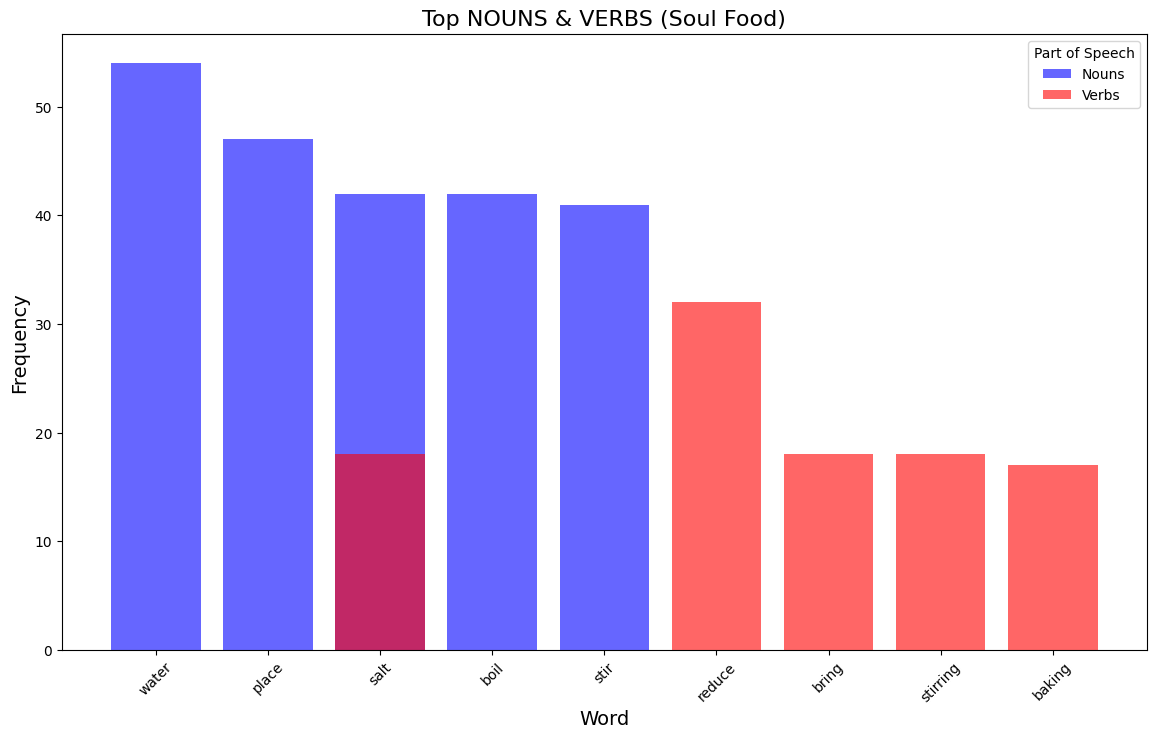

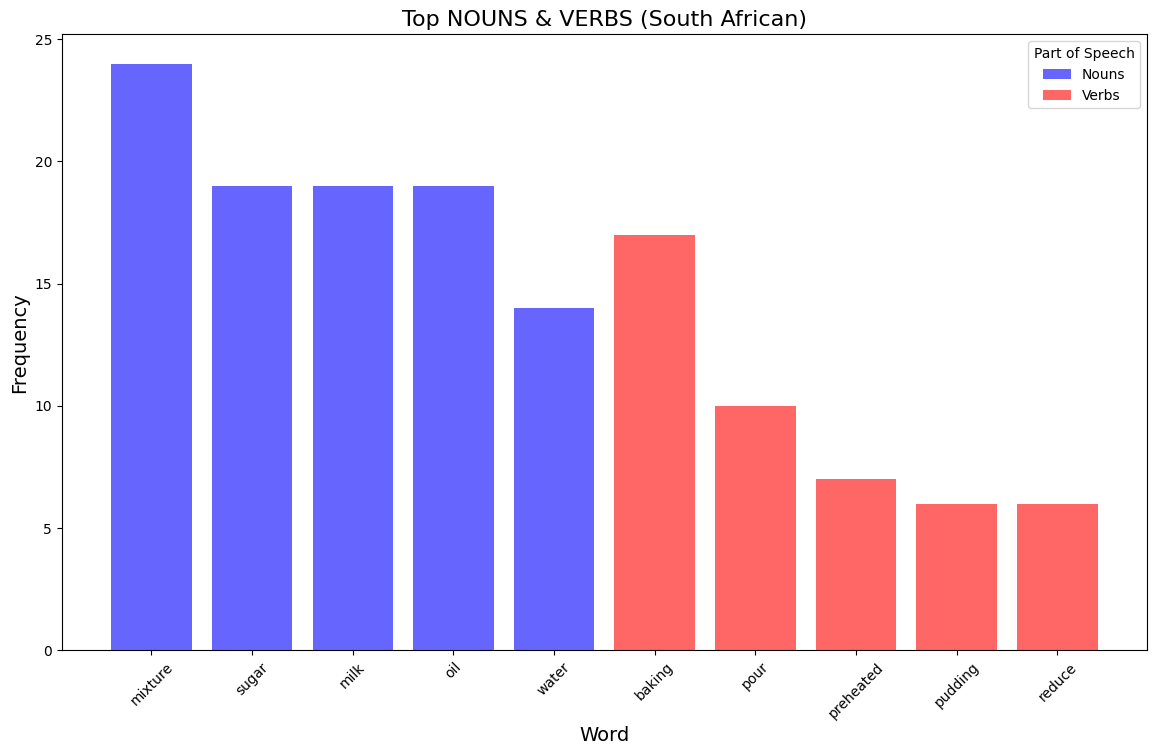

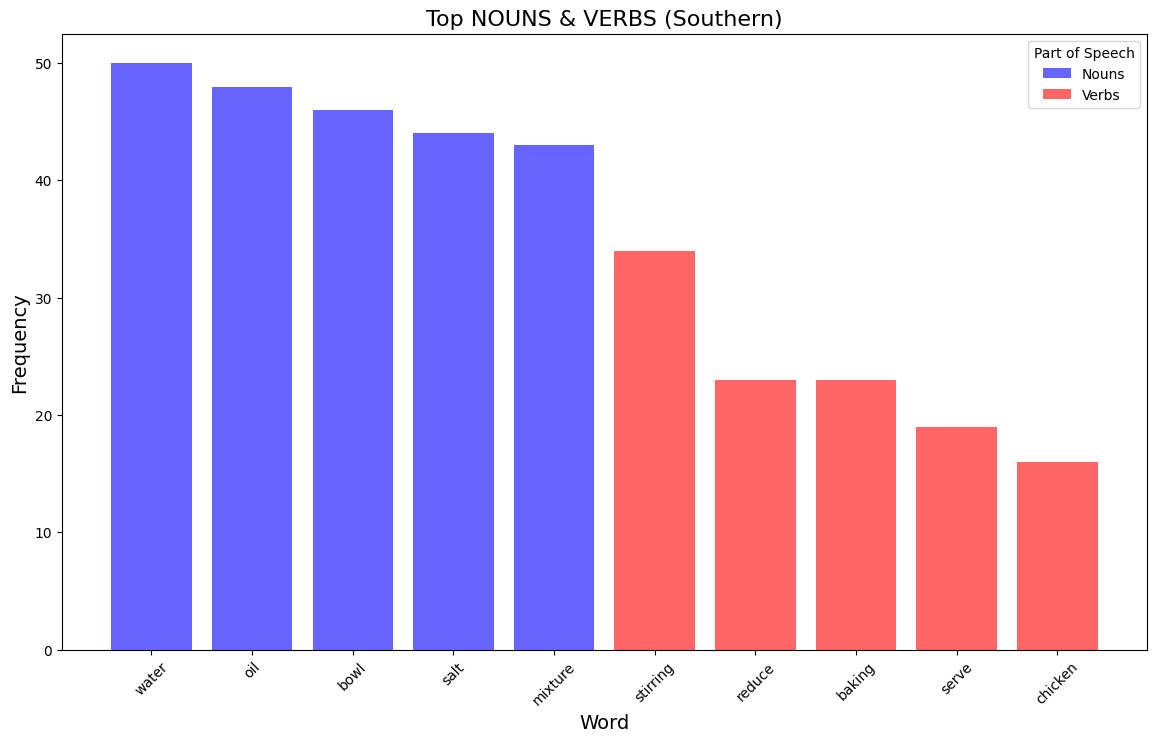

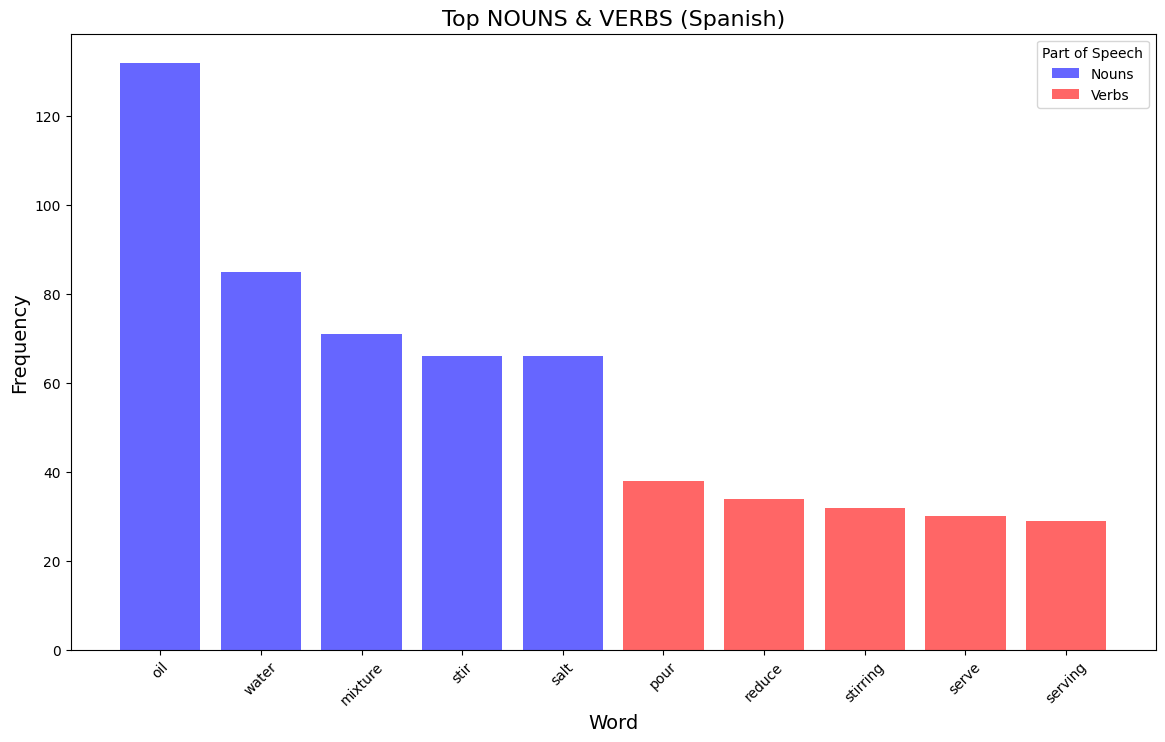

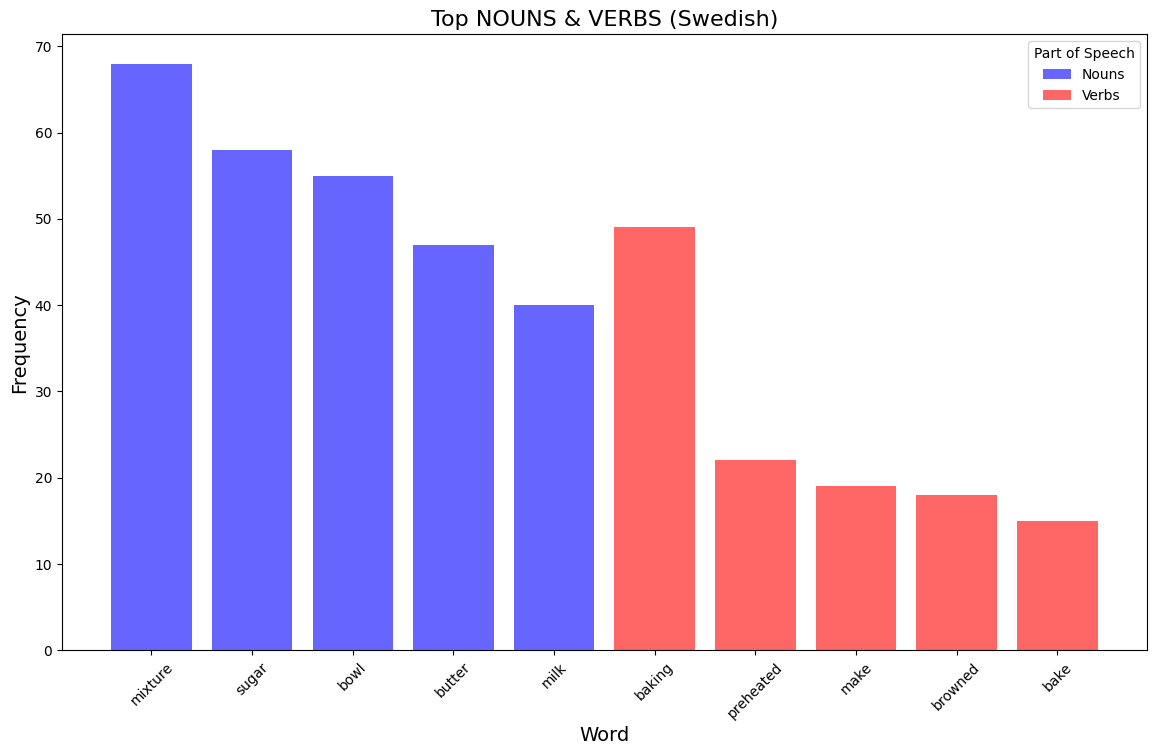

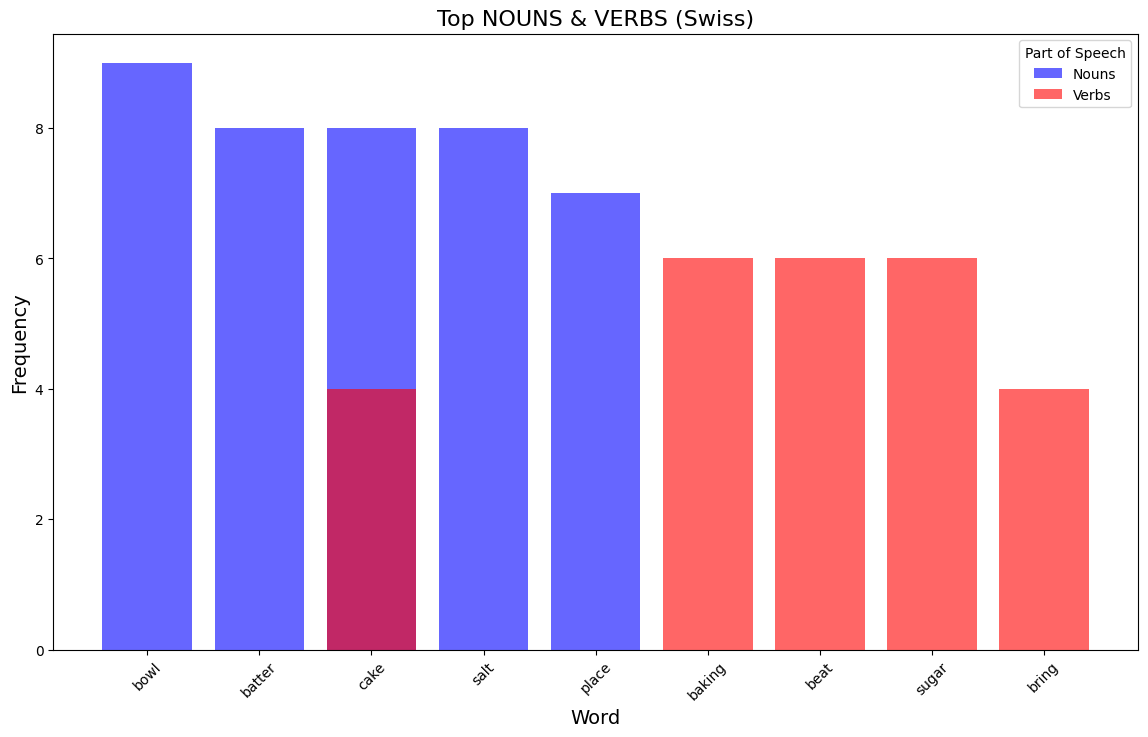

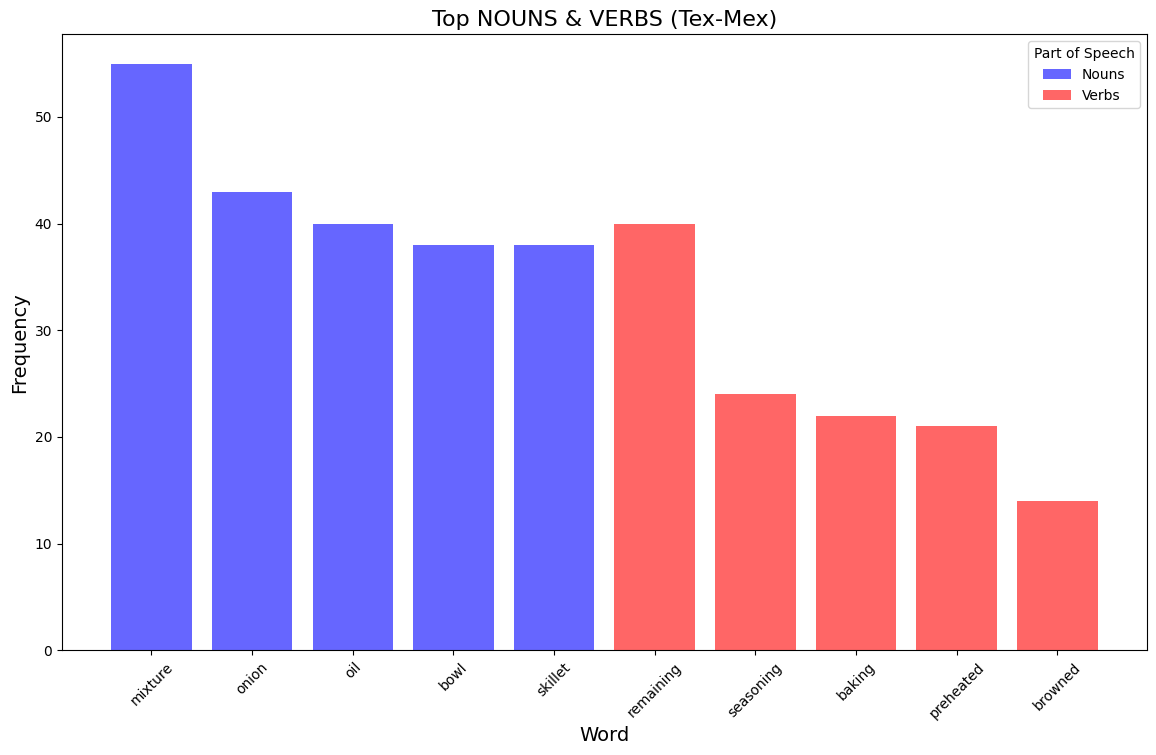

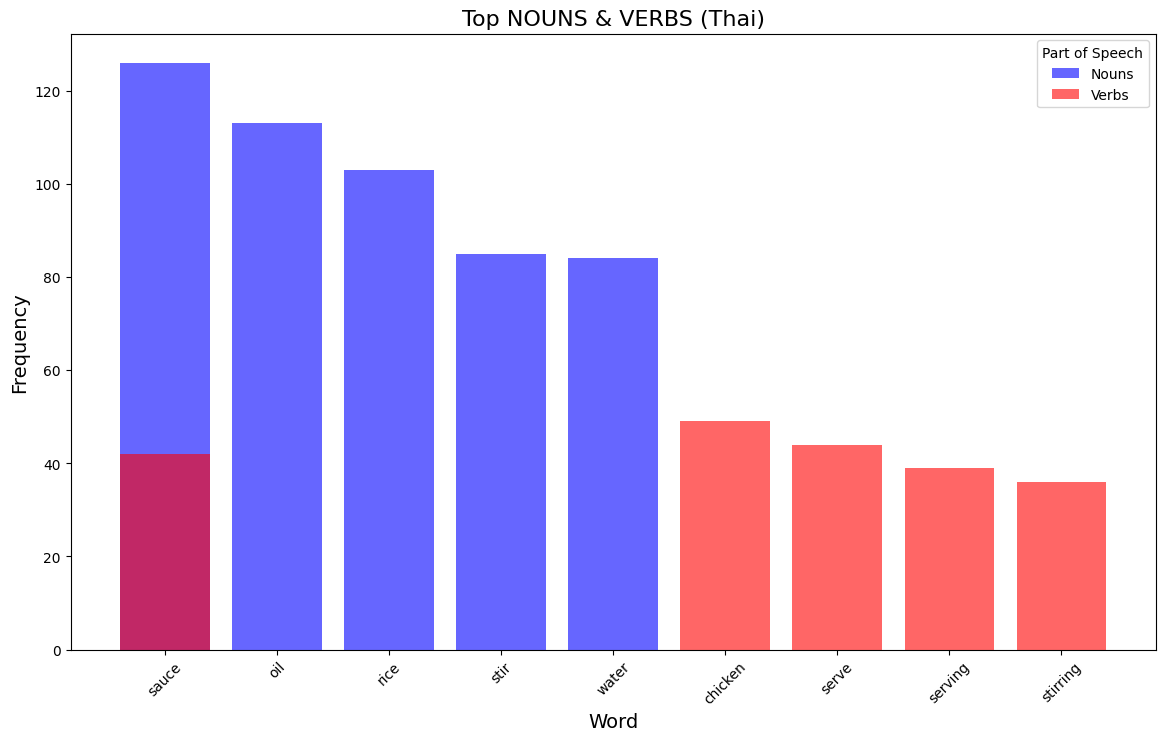

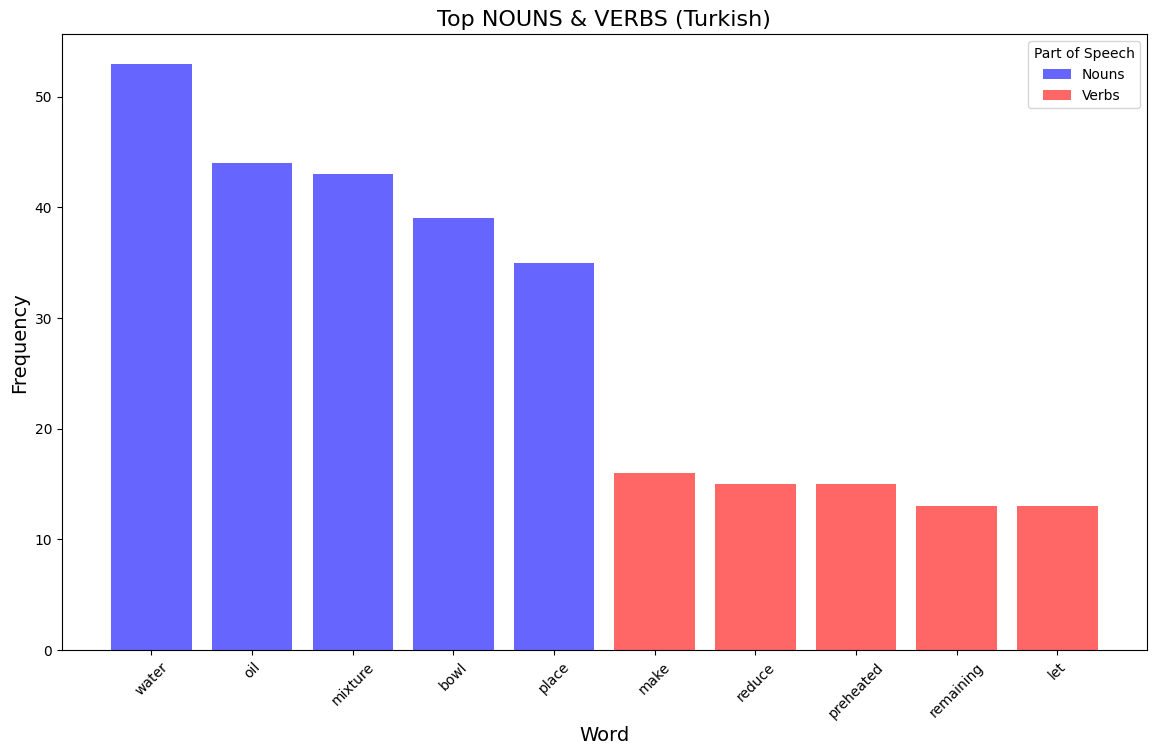

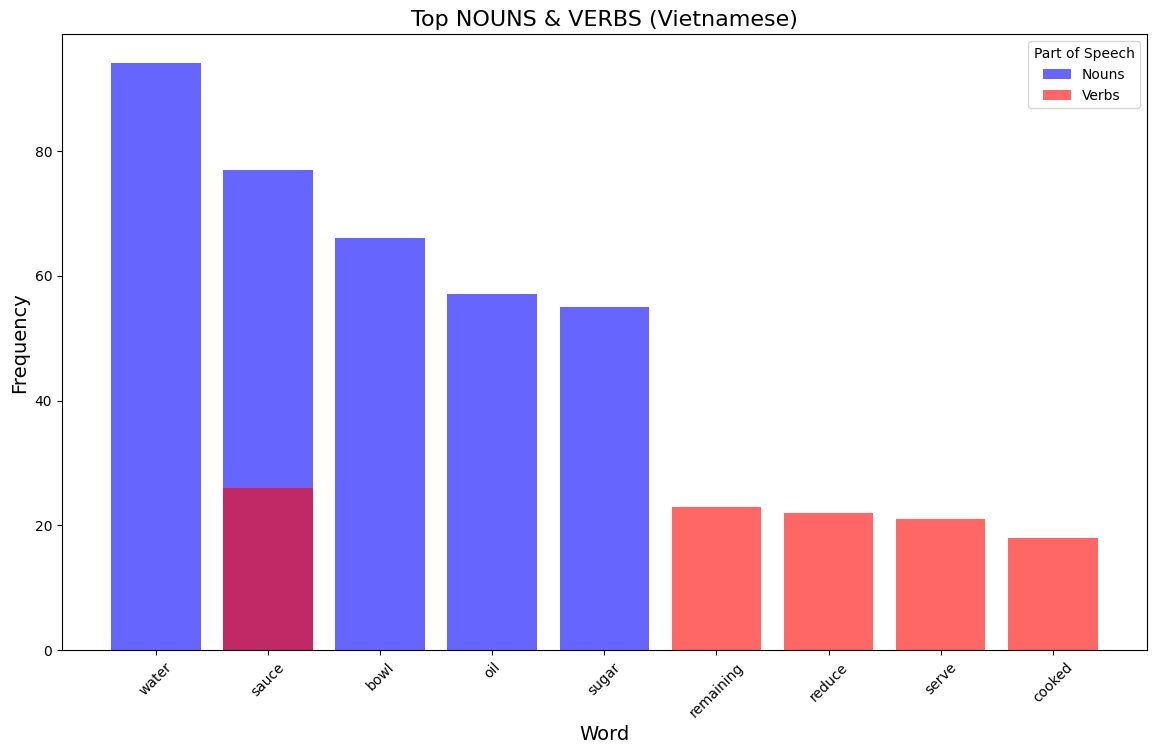

In [ ]:
for origin_name, temp_df in pos_df.groupby('Origin'):
  # Count the frequency of nouns and verbs
  noun_counts = temp_df[temp_df['PoS'] == 'NOUN']['Word'].value_counts().head(5)
  verb_counts = temp_df[temp_df['PoS'] == 'VERB']['Word'].value_counts().head(5)

  # Combine the top words into a single DataFrame
  top_words_combined = pd.concat([
  #    noun_counts.rename('Frequency').reset_index().rename(columns={'index': 'Word'}).assign(PoS='Noun'),
  #    verb_counts.rename('Frequency').reset_index().rename(columns={'index': 'Word'}).assign(PoS='Verb')
      noun_counts.rename('Frequency').reset_index().assign(PoS='Noun'),
      verb_counts.rename('Frequency').reset_index().assign(PoS='Verb')
  ])

  # Plot
  plt.figure(figsize=(14, 8))
  plt.bar(top_words_combined[top_words_combined['PoS'] == 'Noun']['Word'],
          top_words_combined[top_words_combined['PoS'] == 'Noun']['Frequency'], label='Nouns', color='b', alpha=0.6)
  plt.bar(top_words_combined[top_words_combined['PoS'] == 'Verb']['Word'],
          top_words_combined[top_words_combined['PoS'] == 'Verb']['Frequency'], label='Verbs', color='r', alpha=0.6)
  plt.title('Top NOUNS & VERBS ({})'.format(origin_name), fontsize=16)
  plt.xlabel('Word', fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.xticks(rotation=45)
  plt.legend(title='Part of Speech')
  plt.show()

# Sentiment analysis on reviews - How do people like the food?

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
reviews_sentiment_df = all_recipes_df[['Origin', 'Title', 'Reviews']]

In [ ]:
reviews_sentiment_df

,Origin,Title,Reviews
0,Amish and Mennonite,Baked Oatmeal,"[very yummy, i used half the brown sugar, soy ..."
1,Amish and Mennonite,Amish White Bread,"[I love this bread! It's a bit dense, sweet an..."
2,Amish and Mennonite,Cheesy Amish Breakfast Casserole,[This has been my go-to recipe for a long time...
3,Amish and Mennonite,Best Vinegar Coleslaw,[I have made this twice now. First time exactl...
4,Amish and Mennonite,Pennsylvania-Dutch Pickled Beets and Eggs,"[Excellent recipe! As a child growing up, my m..."
...,...,...,...
2734,Spanish,Merluza a la Vasca (Hake in White Wine),"[I used skinless flounder, so skipped the fryi..."
2735,Spanish,Horchata de Almendra,"[This is really good, creamy, with a nice ligh..."
2736,Spanish,Stuffed Piquillo Peppers,[Fresh exotic flavor! Just lightly spicey. Had...
2737,Spanish,Ensalada Valenciana,[I used loose leaf lettuce and a Walla Walla o...


In [ ]:
# place each review on its own row

reviews_sentiment_df = reviews_sentiment_df.explode('Reviews')

In [ ]:
reviews_sentiment_df

,Origin,Title,Reviews
0,Amish and Mennonite,Baked Oatmeal,"very yummy, i used half the brown sugar, soy m..."
0,Amish and Mennonite,Baked Oatmeal,I bake this once a week and enjoy snacking on it.
0,Amish and Mennonite,Baked Oatmeal,"I loved this recipe, but did change it up a bi..."
0,Amish and Mennonite,Baked Oatmeal,used dried cherries instead. Super yummy!
0,Amish and Mennonite,Baked Oatmeal,"This is a great recipe, I’ve made it many time..."
...,...,...,...
2737,Spanish,Ensalada Valenciana,Very refreshing!
2737,Spanish,Ensalada Valenciana,"Wonderful flavors, and so easy! Thank's for po..."
2737,Spanish,Ensalada Valenciana,"So simple, but delivers big flavors. Marinatin..."
2737,Spanish,Ensalada Valenciana,Sometimes the simplest things are the best and...


In [ ]:
# function to determine the predominant senitiment based of the compound result

def get_overall_sentiment(text):
  if pd.isna(text):
    return '_no_reviews'
  else:
    sentiment = sia.polarity_scores(text)
    compound_result = sentiment['compound']

    if compound_result > 0.05:
      return 'positive'
    elif compound_result < -0.05:
      return 'negative'
    return 'neutral'

In [ ]:
reviews_sentiment_df['Sentiment'] = reviews_sentiment_df['Reviews'].apply(get_overall_sentiment)

In [ ]:
reviews_sentiment_df

,Origin,Title,Reviews,Sentiment
0,Amish and Mennonite,Baked Oatmeal,"very yummy, i used half the brown sugar, soy m...",positive
0,Amish and Mennonite,Baked Oatmeal,I bake this once a week and enjoy snacking on it.,positive
0,Amish and Mennonite,Baked Oatmeal,"I loved this recipe, but did change it up a bi...",positive
0,Amish and Mennonite,Baked Oatmeal,used dried cherries instead. Super yummy!,positive
0,Amish and Mennonite,Baked Oatmeal,"This is a great recipe, I’ve made it many time...",positive
...,...,...,...,...
2737,Spanish,Ensalada Valenciana,Very refreshing!,neutral
2737,Spanish,Ensalada Valenciana,"Wonderful flavors, and so easy! Thank's for po...",positive
2737,Spanish,Ensalada Valenciana,"So simple, but delivers big flavors. Marinatin...",positive
2737,Spanish,Ensalada Valenciana,Sometimes the simplest things are the best and...,positive


In [ ]:
sentiment_counts = reviews_sentiment_df.groupby(['Origin', 'Sentiment']).size().unstack(fill_value=0)

print(sentiment_counts)

Sentiment                     _no_reviews  negative  neutral  positive
Origin                                                                
Amish and Mennonite                     2        27       38       393
Argentinian                             1        10       12       149
Australian and New Zealander            2        30       22       438
Austrian                                1        13        5       162
Bangladeshi                             1         5        7        77
Belgian                                 0         2        2        47
Brazilian                               3        32       21       368
Cajun and Creole                        1        25       51       449
Canadian                                0        50       45       498
Chilean                                 2         8       12       131
Chinese                                 7        39       38       664
Colombian                               2         1        4        48
Cuban 

In [ ]:
total_reviews = sentiment_counts[['negative', 'neutral', 'positive']].sum(axis=1)    # for each country, find how many reviews we gatehered

sentiment_percentage = pd.DataFrame(columns=['negative_percent', 'neutral_percent', 'positive_percent'])   # create a new dataframe that will store the percentages for each type of sentiment

# compute the percentages and round to 2 decimals
sentiment_percentage['negative_percent'] = (sentiment_counts['negative'] / total_reviews) * 100
sentiment_percentage['neutral_percent'] = (sentiment_counts['neutral'] / total_reviews) * 100
sentiment_percentage['positive_percent'] = (sentiment_counts['positive'] / total_reviews) * 100

sentiment_percentage['negative_percent'] = sentiment_percentage['negative_percent'].round(2)
sentiment_percentage['neutral_percent'] = sentiment_percentage['neutral_percent'].round(2)
sentiment_percentage['positive_percent'] = sentiment_percentage['positive_percent'].round(2)

print(sentiment_percentage)

                              negative_percent  neutral_percent  \
Origin                                                            
Amish and Mennonite                       5.90             8.30   
Argentinian                               5.85             7.02   
Australian and New Zealander              6.12             4.49   
Austrian                                  7.22             2.78   
Bangladeshi                               5.62             7.87   
Belgian                                   3.92             3.92   
Brazilian                                 7.60             4.99   
Cajun and Creole                          4.76             9.71   
Canadian                                  8.43             7.59   
Chilean                                   5.30             7.95   
Chinese                                   5.26             5.13   
Colombian                                 1.89             7.55   
Cuban                                     5.86             5.0

In [ ]:
flat_data = sentiment_percentage.reset_index().melt(id_vars='Origin', var_name='sentiment', value_name='percentage')

def histogram(data, x, color, title, xaxis, yaxis, color_map):
    fig = px.histogram(data, x=x, y='percentage', color=color, barmode='stack', color_discrete_map=color_map)
    fig.update_layout(
        title_text=title,
        xaxis_title_text=xaxis,
        yaxis_title_text=yaxis,
        bargap=0.2,
        bargroupgap=0.1
    )
    fig.show()

color_map = {
    'positive_percent': 'green',
    'neutral_percent': 'grey',
    'negative_percent': 'red'
}

histogram(flat_data, "Origin", "sentiment", 'Sentiment Percentage per Origin', 'Review', 'Percentage', color_map)

# Recommendation Systems

## Recommend similar recipes based on the ingredients used



In [ ]:
copy_df = all_recipes_df

In [ ]:
texts = copy_df['Ingredients'].astype(str).tolist()

# Setup the vectorizer with necessary preprocessing settings
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    max_df=0.95,
    min_df=2,
    max_features=10000
)

# Apply vectorization to the text data
tfidf_matrix = vectorizer.fit_transform(texts)

# Output the shape of the TF-IDF matrix
print(tfidf_matrix.shape)

(2739, 1680)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming tfidf_matrix is the TF-IDF representation of the recipes
similarity_matrix = cosine_similarity(tfidf_matrix)

# Should be (n_recipes, n_recipes)
print(similarity_matrix.shape)

(2739, 2739)


In [ ]:
# Function to perform the query and retrieve recipes
def recommend_recipes_cs(doc_index, similarity_matrix, top_k=5):
    similarity_scores = list(enumerate(similarity_matrix[doc_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_k+1]  # Exclude self

    print(f"Recommendations for: Recipe {doc_index}\nRecipe: {texts[doc_index][:11100]}...\n")

    for i, score in similarity_scores:
        print(f"Recipe Index: {i}\nScore: {score}\nRecipe: {texts[i][:11100]}...\n")

# Example: Recommend recipes similar to recipe at index 1
recommend_recipes_cs(1, similarity_matrix)

Recommendations for: Recipe 1
Recipe: ['2 cups warm water 110 degrees f45 degrees c ', 'cup white sugar ', '1 tablespoons active dry yeast ', 'cup vegetable oil ', '1 teaspoons salt ', '6 cups bread flour ']...

Recipe Index: 647
Score: 0.9504768150385731
Recipe: ['2 cups warm water 110 degrees f45 degrees c ', '2 teaspoons active dry yeast ', 'cup white sugar ', 'cup vegetable oil ', '1 teaspoons salt ', '6 cups allpurpose flour ']...

Recipe Index: 2092
Score: 0.8857310856513466
Recipe: ['1 cups bread flour divided ', 'cup water divided ', '5 teaspoons active dry yeast ', '1 teaspoon white sugar ', '2 cups warm water 110 degrees f45 degrees c ', '6 cups bread flour ', '2 teaspoons salt ']...

Recipe Index: 129
Score: 0.8795545717148587
Recipe: ['1 teaspoons active dry yeast ', '1 teaspoon white sugar ', '1 cup warm water 110 degrees f45 degrees c ', '3 cups unbleached flour ', '2 teaspoons salt ', 'cup milk 110 degrees f45 degrees c ', '2 tablespoons vegetable oil ', 'cup cornmeal ']

## Recommend recipes that a user would like or not based on his preferences

In [ ]:
# get the users dataframe

user_ratings_df = pd.read_csv('users.csv')
user_ratings_df = user_ratings_df.drop(columns=['Unnamed: 0'])
user_ratings_df
user_ratings_df.head()

,UserID,RecipeID,Rating
0,1,1,5
1,1,647,5
2,1,2092,5
3,1,15,2
4,1,1917,2


In [ ]:
recommend_df = all_recipes_df

In [ ]:
# Create a user-item matrix
user_item_matrix = user_ratings_df.pivot_table(index='UserID', columns='RecipeID', values='Rating').fillna(0)

# Replace NaN values with 0 (assuming non-rating implies a neutral sentiment)
user_item_matrix = user_item_matrix.fillna(0)

# Compute the cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

print(user_similarity.shape)
user_similarity_df

(5, 5)


UserID,1,2,3,4,5
UserID,,,,,
1,1.00000,0.31272,0.0,0.00000,0.0
2,0.31272,1.00000,0.0,0.12987,0.0
3,0.00000,0.00000,1.0,0.00000,0.0
4,0.00000,0.12987,0.0,1.00000,0.0
5,0.00000,0.00000,0.0,0.00000,1.0


In [ ]:
def recommend_recipes(user_id, user_similarity_df, user_item_matrix, recommend_df, top_n=3):
    # Get similarity scores for the user in question with all other users
    sim_scores = user_similarity_df[user_id]

    # Predict scores (weighted sum of ratings)
    weighted_sum = np.dot(sim_scores, user_item_matrix)
    sim_sum = np.abs(sim_scores).sum()
    predicted_ratings = weighted_sum / sim_sum

    # Create a DataFrame of predicted ratings
    predicted_ratings = pd.Series(predicted_ratings, index=user_item_matrix.columns)

    # Filter out recipes already rated by the user
    already_rated = user_item_matrix.loc[user_id]
    predicted_ratings = predicted_ratings[already_rated[already_rated == 0].index]

    # Get the top N recipe IDs
    recommended_recipe_ids = predicted_ratings.nlargest(top_n).index

    # Map recipe IDs to titles
    recommended_recipes = recommend_df.loc[recommended_recipe_ids, 'Title']
    return recommended_recipes

In [ ]:
def counter_recommend_recipes(user_id, user_similarity_df, user_item_matrix, recommend_df, recommended_recipe_ids, top_n=3):
    # Get similarity scores for the user in question with all other users
    sim_scores = user_similarity_df[user_id]

    # Predict scores (weighted sum of ratings), but invert the similarity scores by subtracting from 1
    weighted_sum = np.dot(1 - sim_scores, user_item_matrix)
    sim_sum = np.abs(1 - sim_scores).sum()
    predicted_ratings = weighted_sum / sim_sum

    # Create a DataFrame of predicted ratings
    predicted_ratings = pd.Series(predicted_ratings, index=user_item_matrix.columns)

    # Filter out recipes already rated by the user and recommended recipes
    already_rated = user_item_matrix.loc[user_id]
    predicted_ratings = predicted_ratings[already_rated[already_rated == 0].index]
    predicted_ratings = predicted_ratings.drop(recommended_recipe_ids, errors='ignore')

    # Get the top N recipe IDs based on the lowest predicted ratings
    counter_recommended_recipe_ids = predicted_ratings.nsmallest(top_n).index

    # Map recipe IDs to titles
    counter_recommended_recipes = recommend_df.loc[counter_recommended_recipe_ids, 'Title']
    return counter_recommended_recipes

In [ ]:
# Example usage: Recommend and counter-recommend recipes for user #1
user_id = 1
recommended_recipes_res = recommend_recipes(user_id, user_similarity_df, user_item_matrix, recommend_df)
print(f'Recommendations for user #{user_id}:')
print(recommended_recipes_res)
print()

counter_recommended_recipes_res = counter_recommend_recipes(user_id, user_similarity_df, user_item_matrix, recommend_df, recommended_recipes_res.index)
print(f'Counter-recommendations for user #{user_id}:')
print(counter_recommended_recipes_res)

Recommendations for user #1:
RecipeID
6     Amish Friendship Bread Starter
16          Herman Sourdough Starter
7     My Amish Friend's Caramel Corn
Name: Title, dtype: object

Counter-recommendations for user #1:
RecipeID
1344                Lefse II
14         Amish Sugar Cakes
17      Ground Cherry Pie II
Name: Title, dtype: object
